# Cluster Analysis Obesity Level

### Strategy of the following work is
![](<Captura de ecrã 2025-10-22 001755.png>)


### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np
import seaborn as sns

In [ ]:

# ==========================
# DADOS SIMULADOS MANUAIS
# ==========================

sexo = [
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino"
]

idade = [
    22, 25, 28, 31, 35,
    40, 45, 50, 55, 60,
    23, 27, 32, 37, 42,
    47, 52, 57, 62, 30,
    34, 38, 43, 48, 53,
    58, 24, 29, 33, 36
]

# ============================================================
# PESO E ALTURA AJUSTADOS PARA SIMULAR GRUPOS DISTINTOS
# ============================================================

peso = [
    # Grupo 1 (saudáveis)
    62, 55, 68, 59, 66,
    61, 63, 58, 67, 60,
    # Grupo 2 (sobrepeso)
    78, 72, 83, 76, 81,
    79, 85, 74, 88, 80,
    # Grupo 3 (obesos)
    98, 105, 95, 110, 102,
    115, 131, 108, 108, 112
]

altura = [
    # Grupo 1 (saudáveis)
    1.72, 1.65, 1.75, 1.63, 1.70,
    1.68, 1.74, 1.64, 1.73, 1.66,
    # Grupo 2 (sobrepeso)
    1.74, 1.69, 1.80, 1.70, 1.75,
    1.78, 1.76, 1.71, 1.79, 1.74,
    # Grupo 3 (obesos)
    1.70, 1.68, 1.72, 1.65, 1.74,
    1.73, 1.75, 1.69, 1.70, 1.72
]

# ============================================================
# HISTORIAL DE OBESIDADE (1=Sim, 0=Não)
# ============================================================

historial_obesidade = [
    # Saudáveis
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    # Sobrepeso
    0, 1, 1, 0, 1,
    1, 1, 1, 0, 1,
    # Obesos
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
]

# ============================================================
# FREQUÊNCIAS (escala 1–4: 1=baixo, 4=alto)
# ============================================================

freq_agua = [
    # Saudáveis (bebem muita água)
    4, 4, 3, 4, 4,
    3, 4, 4, 3, 4,
    # Sobrepeso (moderado)
    3, 3, 2, 3, 2,
    3, 2, 3, 2, 2,
    # Obesos (pouca água)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_vegetais = [
    # Saudáveis (alto consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 3, 4,
    # Sobrepeso (médio)
    3, 2, 2, 3, 2,
    2, 3, 2, 3, 2,
    # Obesos (baixo)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_calorica = [
    # Saudáveis (baixo consumo)
    1, 1, 2, 1, 2,
    1, 2, 1, 1, 2,
    # Sobrepeso (moderado)
    3, 3, 3, 2, 3,
    3, 2, 3, 3, 2,
    # Obesos (elevado consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 4, 3
]

# ============================================================
# CRIAÇÃO DO DATAFRAME
# ============================================================

dados_simulados = pd.DataFrame({
    "Sexo": sexo,
    "Idade": idade,
    "Peso": peso,
    "Altura": altura,
    "Historial_Obesidade": historial_obesidade,
    "Freq_Consumo_Agua": freq_agua,
    "Freq_Consumo_Vegetais": freq_vegetais,
    "Freq_Consumo_Comida_Calorica": freq_calorica
})

dados_simulados.head(15)


Sexo  Idade  Peso  Altura  Historial_Obesidade  Freq_Consumo_Agua  \
0   Masculino     22    62    1.72                    0                  4   
1    Feminino     25    55    1.65                    0                  4   
2   Masculino     28    68    1.75                    0                  3   
3    Feminino     31    59    1.63                    0                  4   
4   Masculino     35    66    1.70                    0                  4   
5    Feminino     40    61    1.68                    0                  3   
6   Masculino     45    63    1.74                    0                  4   
7    Feminino     50    58    1.64                    0                  4   
8   Masculino     55    67    1.73                    0                  3   
9    Feminino     60    60    1.66                    0                  4   
10  Masculino     23    78    1.74                    0                  3   
11   Feminino     27    72    1.69                    1                  3   
12  Masculino     32    83    1.80                    1                  2   
13   Feminino     37    76    1.70                    0                  3   
14  Masculino     42    81    1.75                    1                  2   

    Freq_Consumo_Vegetais  Freq_Consumo_Comida_Calorica  
0                       4                             1  
1                       4                             1  
2                       3                             2  
3                       4                             1  
4                       4                             2  
5                       4                             1  
6                       4                             2  
7                       4                             1  
8                       3                             1  
9                       4                             2  
10                      3                             3  
11                      2                             3  
12                      2                             3  
13                      3                             2  
14                      2                             3

In [ ]:


# Selecionar apenas as variáveis numéricas
X = dados_simulados[[
    "Idade", "Peso", "Altura",
    "Historial_Obesidade",
    "Freq_Consumo_Agua",
    "Freq_Consumo_Vegetais",
    "Freq_Consumo_Comida_Calorica"
]]


In [ ]:


scaler = StandardScaler()      #Normalizar os dados para não enviesar
X_scaled = scaler.fit_transform(X)


### Tipo de Linkage e Métrica

In [45]:
Z = linkage(X_scaled, method='single', metric='euclidean')

In [14]:
Z

array([[27.        , 28.        ,  0.41128159,  2.        ],
       [20.        , 21.        ,  0.67307947,  2.        ],
       [ 1.        ,  3.        ,  0.71798787,  2.        ],
       [24.        , 25.        ,  0.80348934,  2.        ],
       [30.        , 31.        ,  0.8097318 ,  4.        ],
       [14.        , 22.        ,  0.98908406,  2.        ],
       [ 2.        , 10.        ,  1.15554916,  2.        ],
       [ 4.        ,  6.        ,  1.2702085 ,  2.        ],
       [ 7.        ,  9.        ,  1.34224531,  2.        ],
       [29.        , 34.        ,  1.37215312,  5.        ],
       [ 5.        , 13.        ,  1.56533988,  2.        ],
       [12.        , 15.        ,  1.63310535,  2.        ],
       [19.        , 35.        ,  1.68335994,  3.        ],
       [37.        , 40.        ,  1.95443803,  4.        ],
       [16.        , 17.        ,  2.0645821 ,  2.        ],
       [11.        , 42.        ,  2.13987651,  4.        ],
       [23.        , 39.

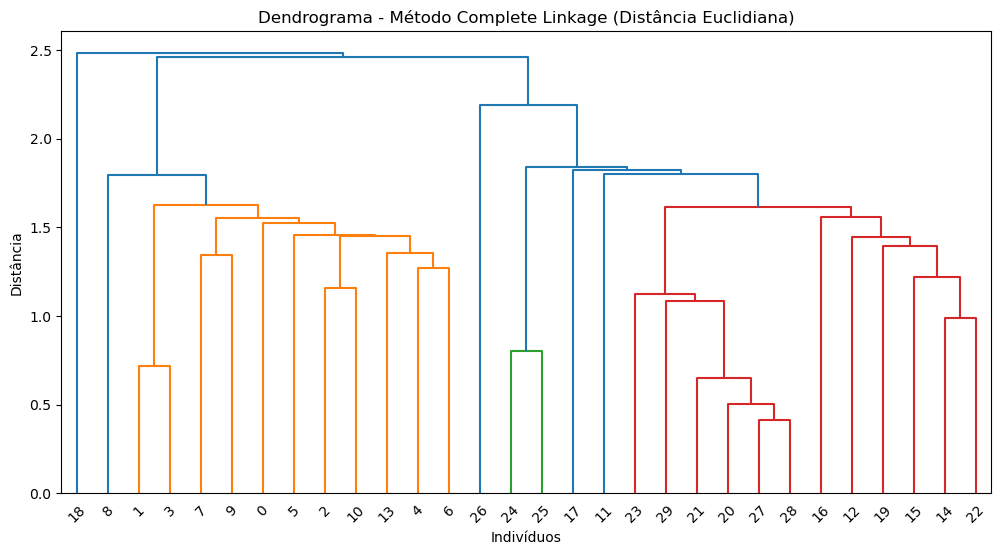

In [46]:
plt.figure(figsize=(12, 6))
plt.title("Dendrograma - Método Complete Linkage (Distância Euclidiana)")
plt.xlabel("Indivíduos")
plt.ylabel("Distância")

dendrogram(Z)
plt.show()


In [ ]:


clusters = fcluster(Z, t=3, criterion='maxclust')
dados_simulados["Cluster_Hierarquico"] = clusters

dados_simulados.head(10)


Sexo  Idade  Peso  Altura  Historial_Obesidade  Freq_Consumo_Agua  \
0  Masculino     22    62    1.72                    0                  4   
1   Feminino     25    55    1.65                    0                  4   
2  Masculino     28    68    1.75                    0                  3   
3   Feminino     31    59    1.63                    0                  4   
4  Masculino     35    66    1.70                    0                  4   
5   Feminino     40    61    1.68                    0                  3   
6  Masculino     45    63    1.74                    0                  4   
7   Feminino     50    58    1.64                    0                  4   
8  Masculino     55    67    1.73                    0                  3   
9   Feminino     60    60    1.66                    0                  4   

   Freq_Consumo_Vegetais  Freq_Consumo_Comida_Calorica  Cluster_Hierarquico  \
0                      4                             1                    1   
1                      4                             1                    1   
2                      3                             2                    1   
3                      4                             1                    1   
4                      4                             2                    1   
5                      4                             1                    1   
6                      4                             2                    1   
7                      4                             1                    1   
8                      3                             1                    1   
9                      4                             2                    1   

   Grupo_Real  
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0  
7           0  
8           0  
9           0

In [48]:
dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Freq_Consumo_Vegetais", "Freq_Consumo_Comida_Calorica"]].mean()


Peso  Freq_Consumo_Vegetais  \
Cluster_Hierarquico                                     
1                    64.416667               3.666667   
2                    96.352941               1.588235   
3                    88.000000               3.000000   

                     Freq_Consumo_Comida_Calorica  
Cluster_Hierarquico                                
1                                        1.583333  
2                                        3.352941  
3                                        3.000000

In [22]:
# Labels reais (baseados nos grupos simulados)
labels_reais = [0]*10 + [1]*10 + [2]*10


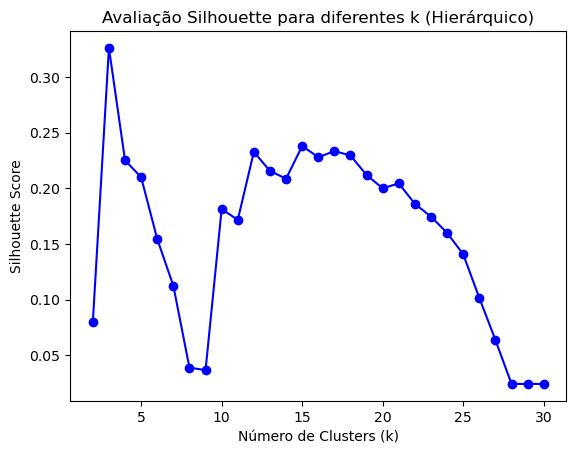

➡️ Número inicial de clusters sugerido: 3 (Silhouette = 0.326)


In [ ]:


# Distância e método de ligação
Z = linkage(X_scaled, method='single', metric='euclidean')

# Testar diferentes números de clusters
sil_scores = []
k_values = range(2, 31)

for k in k_values:
    clusters = fcluster(Z, t=k, criterion='maxclust')
    score = silhouette_score(X_scaled, clusters)
    sil_scores.append(score)

# Gráfico Silhouette vs Nº de Clusters
plt.plot(k_values, sil_scores, 'bo-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Avaliação Silhouette para diferentes k (Hierárquico)")
plt.show()

# Melhor valor
k_otimo = k_values[sil_scores.index(max(sil_scores))]
print(f"➡️ Número inicial de clusters sugerido: {k_otimo} (Silhouette = {max(sil_scores):.3f})")


In [ ]:


# Clusters obtidos com o número ótimo
clusters_hier = fcluster(Z, t=k_otimo, criterion='maxclust')

# Cálculo do ARI
ari = adjusted_rand_score(labels_reais, clusters_hier)
print(f"Adjusted Rand Index (ARI) = {ari:.3f}")


Adjusted Rand Index (ARI) = 0.466


### Tabela Contingência

In [75]:
dados_simulados["Cluster_Hierarquico"] = clusters_hier
dados_simulados["Grupo_Real"] = labels_reais

pd.crosstab(dados_simulados["Grupo_Real"], dados_simulados["Cluster_Hierarquico"])


Cluster_Hierarquico   1   2  3
Grupo_Real                    
0                    10   0  0
1                     2   7  1
2                     0  10  0

In [76]:
# Calcular centróides dos clusters calculados
centroides_calc = dados_simulados.groupby("Cluster_Hierarquico")[["Peso", "Altura"]].mean()

# Calcular centróides dos grupos reais
centroides_reais = dados_simulados.groupby("Grupo_Real")[["Peso", "Altura"]].mean()

print("Centroides dos clusters hierárquicos:\n", centroides_calc)
print("\nCentroides dos grupos reais:\n", centroides_reais)

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708

In [ ]:

# Converter clusters para inteiros sequenciais começando em 0
dados_simulados["Cluster_Hierarquico"] = pd.Categorical(dados_simulados["Cluster_Hierarquico"]).codes


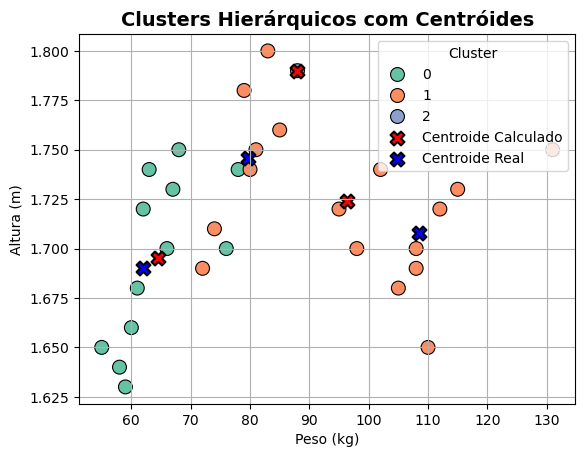

In [ ]:


# Define paleta com número de clusters únicos
num_clusters = len(dados_simulados["Cluster_Hierarquico"].unique())
palette = sns.color_palette("Set2", num_clusters)

# Plot com paleta manual
sns.scatterplot(
    x="Peso",
    y="Altura",
    hue="Cluster_Hierarquico",
    data=dados_simulados,
    palette=palette,
    s=100,
    edgecolor="k",
)

# Plot dos centróides (marcadores em forma de X)
plt.scatter(
    centroides_calc["Peso"],
    centroides_calc["Altura"],
    c="red",  # mesma cor de cada cluster
    s=100,
    marker="X",
    edgecolor="black",
    linewidth=1.5,
    label="Centroide Calculado"
)

# Plot dos centróides (marcadores em forma de X)
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="blue",  # mesma cor de cada cluster
    s=100,
    marker="X",
    edgecolor="black",
    linewidth=1.5,
    label="Centroide Real"
)



# Personalização do gráfico
plt.title("Clusters Hierárquicos com Centróides", fontsize=14, fontweight="bold")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.show()



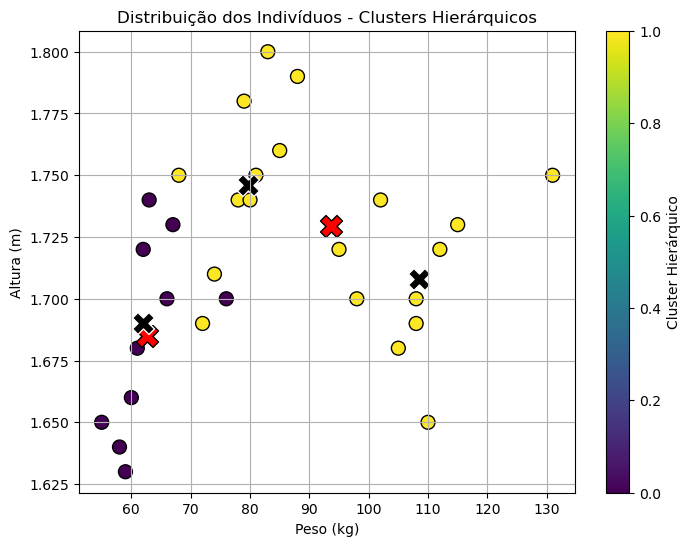

In [70]:
plt.figure(figsize=(8, 6))

# Gráfico de dispersão com cor baseada no cluster encontrado
plt.scatter(
    dados_simulados["Peso"],
    dados_simulados["Altura"],
    c=dados_simulados["Cluster_Hierarquico"],
    cmap="viridis",
    s=100,
    edgecolor="k"
)

# Centrões dos clusters
plt.scatter(
    centroides_calc["Peso"],
    centroides_calc["Altura"],
    c="red",
    s=250,
    marker="X",
    label="Centróide (Cluster Calculado)",
    edgecolor="k"
)

# Centrões dos grupos reais
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="black",
    s=250,
    marker="X",
    label="Centróide (Grupo Real)",
    edgecolor="white"
)

plt.title("Distribuição dos Indivíduos - Clusters Hierárquicos")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.colorbar(label="Cluster Hierárquico")
plt.grid(True)
plt.show()


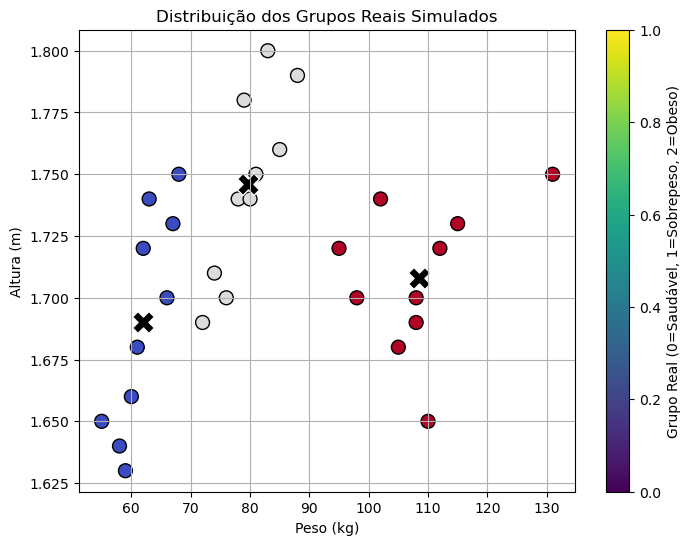

In [26]:
plt.figure(figsize=(8, 6))

plt.scatter(
    dados_simulados["Peso"],
    dados_simulados["Altura"],
    c=dados_simulados["Grupo_Real"],
    cmap="coolwarm",
    s=100,
    edgecolor="k"
)

# Centrões dos grupos reais
plt.scatter(
    centroides_reais["Peso"],
    centroides_reais["Altura"],
    c="black",
    s=250,
    marker="X",
    label="Centróide (Grupo Real)",
    edgecolor="white"
)

plt.title("Distribuição dos Grupos Reais Simulados")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.colorbar(label="Grupo Real (0=Saudável, 1=Sobrepeso, 2=Obeso)")
plt.grid(True)
plt.show()


# Fase de Iteração (Hierarquical Clustering)

In [26]:
listingMethods = ["single", "complete", "average"]
listingDistances = ["euclidean", "cityblock", "cosine"]
results = []
sexo = [
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino",
    "Masculino", "Feminino", "Masculino", "Feminino", "Masculino",
    "Feminino", "Masculino", "Feminino", "Masculino", "Feminino"
]

idade = [
    22, 25, 28, 31, 35,
    40, 45, 50, 55, 60,
    23, 27, 32, 37, 42,
    47, 52, 57, 62, 30,
    34, 38, 43, 48, 53,
    58, 24, 29, 33, 36
]

# ============================================================
# PESO E ALTURA AJUSTADOS PARA SIMULAR GRUPOS DISTINTOS
# ============================================================

peso = [
    # Grupo 1 (saudáveis)
    62, 55, 68, 59, 66,
    61, 63, 58, 67, 60,
    # Grupo 2 (sobrepeso)
    78, 72, 83, 76, 81,
    79, 85, 74, 88, 80,
    # Grupo 3 (obesos)
    98, 105, 95, 110, 102,
    115, 131, 108, 108, 112
]

altura = [
    # Grupo 1 (saudáveis)
    1.72, 1.65, 1.75, 1.63, 1.70,
    1.68, 1.74, 1.64, 1.73, 1.66,
    # Grupo 2 (sobrepeso)
    1.74, 1.69, 1.80, 1.70, 1.75,
    1.78, 1.76, 1.71, 1.79, 1.74,
    # Grupo 3 (obesos)
    1.70, 1.68, 1.72, 1.65, 1.74,
    1.73, 1.75, 1.69, 1.70, 1.72
]

# ============================================================
# HISTORIAL DE OBESIDADE (1=Sim, 0=Não)
# ============================================================

historial_obesidade = [
    # Saudáveis
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    # Sobrepeso
    0, 1, 1, 0, 1,
    1, 1, 1, 0, 1,
    # Obesos
    1, 1, 1, 1, 1,
    1, 1, 1, 1, 1
]

# ============================================================
# FREQUÊNCIAS (escala 1–4: 1=baixo, 4=alto)
# ============================================================

freq_agua = [
    # Saudáveis (bebem muita água)
    4, 4, 3, 4, 4,
    3, 4, 4, 3, 4,
    # Sobrepeso (moderado)
    3, 3, 2, 3, 2,
    3, 2, 3, 2, 2,
    # Obesos (pouca água)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_vegetais = [
    # Saudáveis (alto consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 3, 4,
    # Sobrepeso (médio)
    3, 2, 2, 3, 2,
    2, 3, 2, 3, 2,
    # Obesos (baixo)
    1, 1, 2, 1, 1,
    1, 2, 1, 1, 1
]

freq_calorica = [
    # Saudáveis (baixo consumo)
    1, 1, 2, 1, 2,
    1, 2, 1, 1, 2,
    # Sobrepeso (moderado)
    3, 3, 3, 2, 3,
    3, 2, 3, 3, 2,
    # Obesos (elevado consumo)
    4, 4, 3, 4, 4,
    4, 4, 4, 4, 3
]

# ============================================================
# CRIAÇÃO DO DATAFRAME
# ============================================================

dados_simulados = pd.DataFrame({
    "Sexo": sexo,
    "Idade": idade,
    "Peso": peso,
    "Altura": altura,
    "Historial_Obesidade": historial_obesidade,
    "Freq_Consumo_Agua": freq_agua,
    "Freq_Consumo_Vegetais": freq_vegetais,
    "Freq_Consumo_Comida_Calorica": freq_calorica
})


def numericDataToCluster(df):
    return df[[
        "Idade", "Peso", "Altura",
        "Historial_Obesidade",
        "Freq_Consumo_Agua",
        "Freq_Consumo_Vegetais",
        "Freq_Consumo_Comida_Calorica"
    ]]

def linkageAndDistance(X_scaled, method, distance):
    Z = linkage(X_scaled, method=method, metric=distance)
    plt.figure(figsize=(12, 6))
    plt.title(f"Dendrograma - Método {method.capitalize()} Linkage (Distância {distance.capitalize()})")
    plt.xlabel("Indivíduos")
    plt.ylabel("Distância")
    dendrogram(Z, leaf_rotation=90, leaf_font_size=10)
    plt.show()
    return Z

def clusterAndEvaluate(X_scaled, Z):
    # Testar diferentes números de clusters
    sil_scores = []
    k_values = range(2, 31)

    for k in k_values:
        clusters = fcluster(Z, t=k, criterion='maxclust')
        score = silhouette_score(X_scaled, clusters)
        sil_scores.append(score)

    # Gráfico Silhouette vs Nº de Clusters
    plt.plot(k_values, sil_scores, 'bo-')
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.title("Avaliação Silhouette para diferentes k (Hierárquico)")
    plt.show()

    # Melhor valor
    k_otimo = k_values[sil_scores.index(max(sil_scores))]
    print(f"➡️ Número inicial de clusters sugerido: {k_otimo} (Silhouette = {max(sil_scores):.3f})")
    return k_otimo, max(sil_scores)


def visualizeClusters(dados_simulados, var1, var2):
    var1 = str(var1)
    var2 = str(var2)
    # Calcular centróides dos clusters calculados
    centroides_calc = dados_simulados.groupby("Cluster_Hierarquico")[[var1, var2]].mean()

    # Calcular centróides dos grupos reais
    centroides_reais = dados_simulados.groupby("Grupo_Real")[[var1, var2]].mean()

    print("Centroides dos clusters hierárquicos:\n", centroides_calc)
    print("\nCentroides dos grupos reais:\n", centroides_reais)

    # Define paleta com número de clusters únicos
    num_clusters = len(dados_simulados["Cluster_Hierarquico"].unique())
    palette = sns.color_palette("Set2", num_clusters)

    # Plot com paleta manual
    sns.scatterplot(
        x=var1,
        y=var2,
        hue="Cluster_Hierarquico",
        data=dados_simulados,
        palette=palette,
        s=100,
        edgecolor="k",
    )

    # Plot dos centróides (marcadores em forma de X)
    plt.scatter(
        centroides_calc[var1],
        centroides_calc[var2],
        c="red",  # mesma cor de cada cluster
        s=100,
        marker="X",
        edgecolor="black",
        linewidth=1.5,
        label="Centroide Calculado"
    )

    # Plot dos centróides (marcadores em forma de X)
    plt.scatter(
        centroides_reais[var1],
        centroides_reais[var2],
        c="blue",  # mesma cor de cada cluster
        s=100,
        marker="X",
        edgecolor="black",
        linewidth=1.5,
        label="Centroide Real"
    )



    # Personalização do gráfico
    plt.title("Clusters Hierárquicos com Centróides", fontsize=14, fontweight="bold")
    plt.xlabel(f"{var1}")
    plt.ylabel(f"{var2}")
    plt.legend(title="Cluster", loc="best")
    plt.grid(True)
    plt.show()

--- Clustering with single linkage and euclidean distance ---
DENDOGRAMA


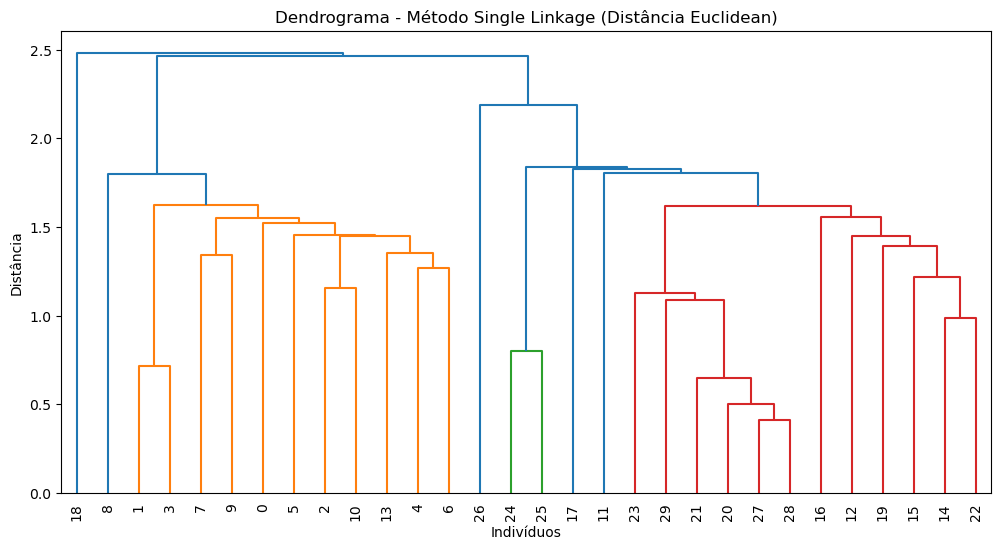

AVALIAÇÃO DO NÚMERO DE CLUSTERS


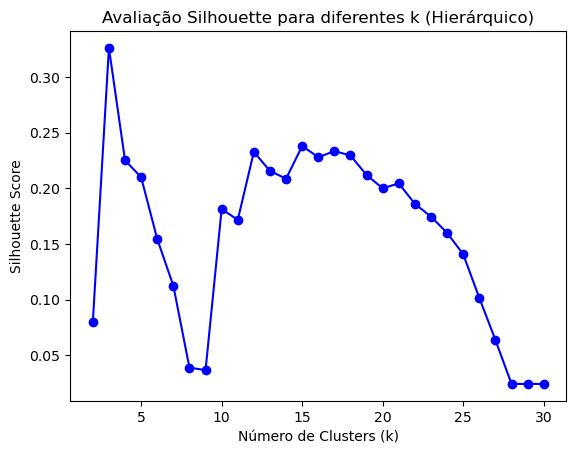

➡️ Número inicial de clusters sugerido: 3 (Silhouette = 0.326)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.466
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2  3
Grupo_Real                    
0                    10   0  0
1                     2   7  1
2                     0  10  0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


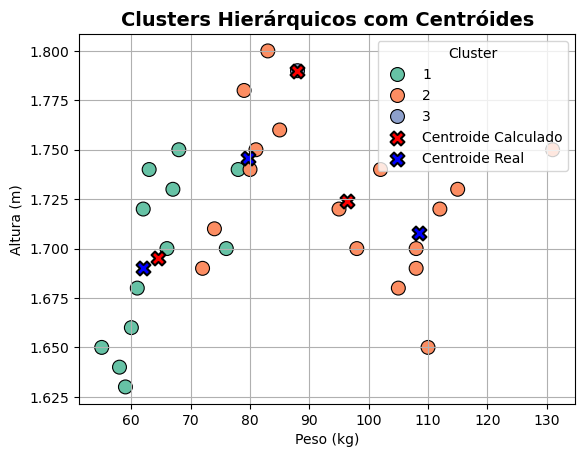

--- Clustering with single linkage and cityblock distance ---
DENDOGRAMA


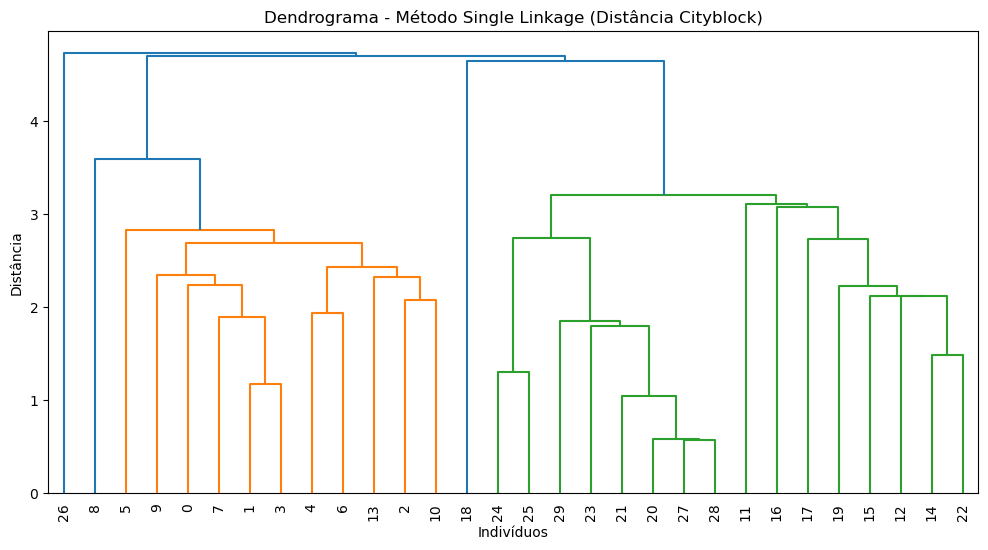

AVALIAÇÃO DO NÚMERO DE CLUSTERS


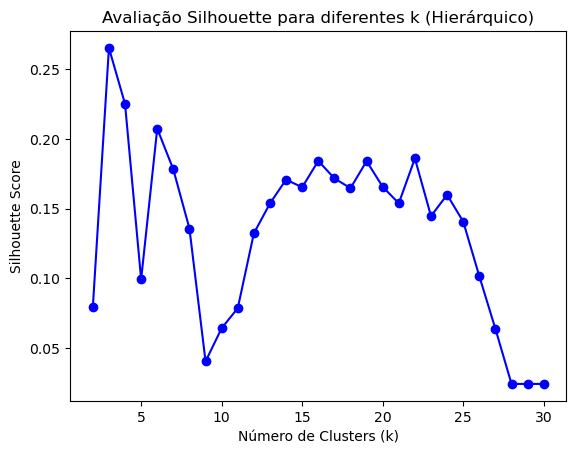

➡️ Número inicial de clusters sugerido: 3 (Silhouette = 0.265)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.447
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1  2  3
Grupo_Real                   
0                    10  0  0
1                     2  8  0
2                     0  9  1
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     64.416667  1.695000
2                     93.823529  1.726471
3                    131.000000  1.750000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


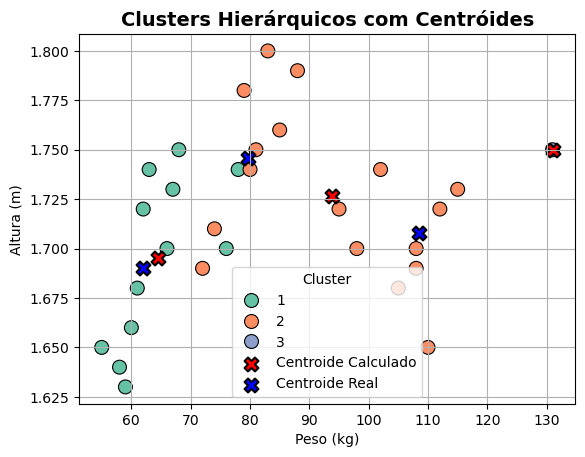

--- Clustering with single linkage and cosine distance ---
DENDOGRAMA


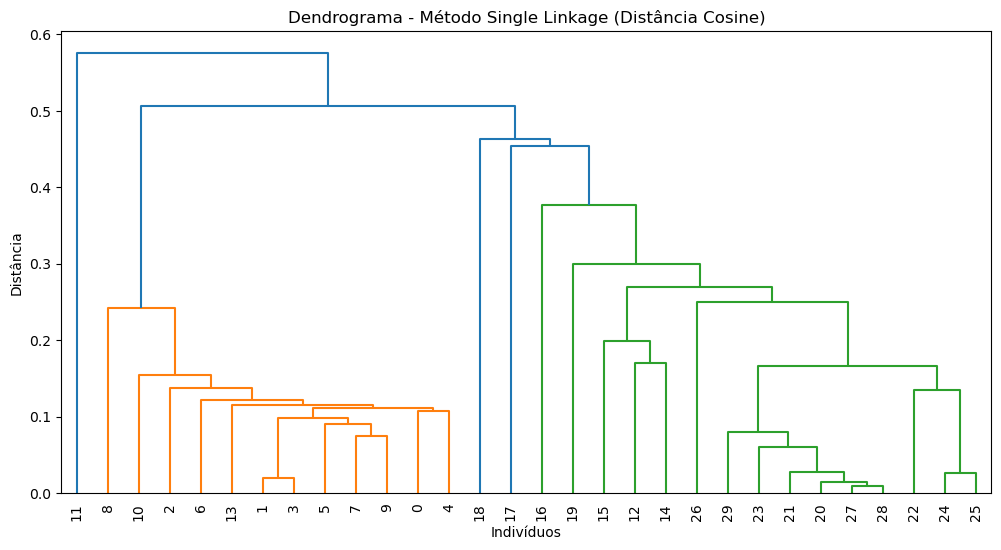

AVALIAÇÃO DO NÚMERO DE CLUSTERS


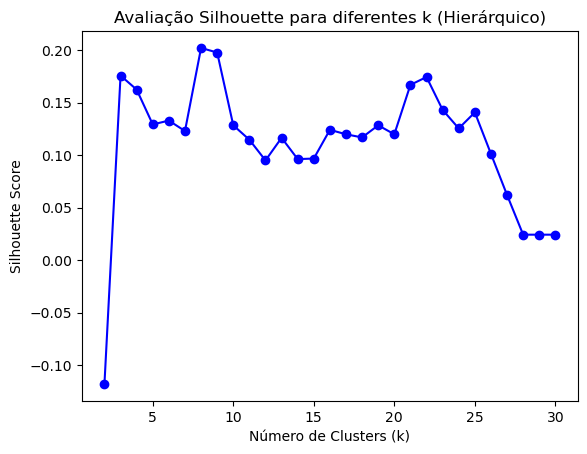

➡️ Número inicial de clusters sugerido: 8 (Silhouette = 0.202)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.658
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1  2   3  4  5  6  7  8
Grupo_Real                                   
0                    10  0   0  0  0  0  0  0
1                     2  3   0  1  1  1  1  1
2                     0  0  10  0  0  0  0  0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     64.416667  1.695000
2                     81.000000  1.776667
3                    108.400000  1.708000
4                     80.000000  1.740000
5                     85.000000  1.760000
6                     74.000000  1.710000
7                     88.000000  1.790000
8                     72.000000  1.690000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108

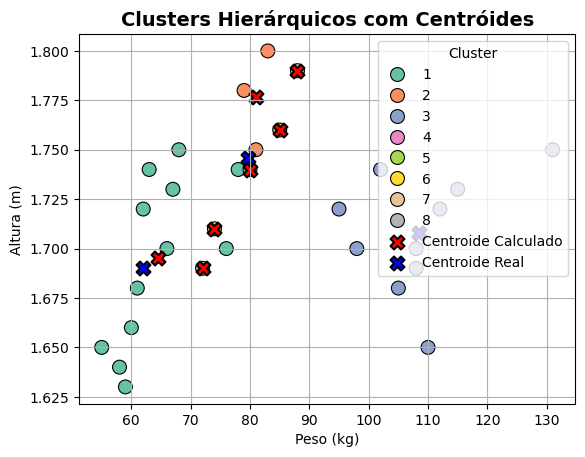

--- Clustering with complete linkage and euclidean distance ---
DENDOGRAMA


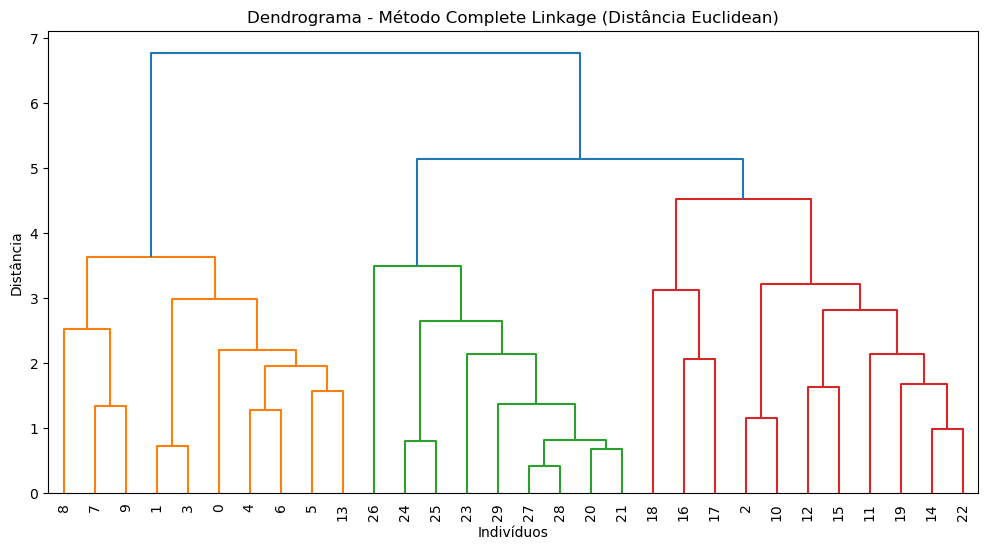

AVALIAÇÃO DO NÚMERO DE CLUSTERS


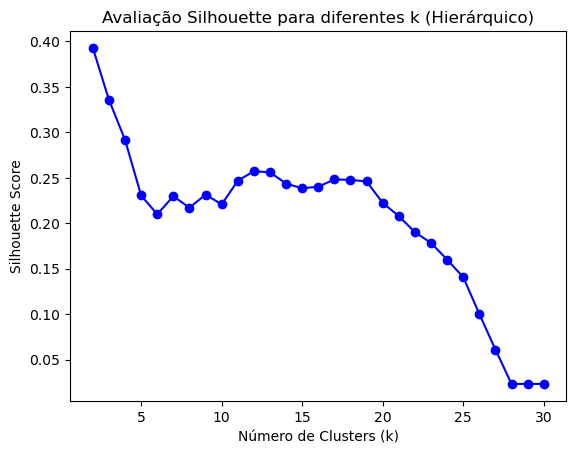

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.393)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.393
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico  1   2
Grupo_Real                
0                    9   1
1                    1   9
2                    0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                      Peso  Altura
Cluster_Hierarquico              
1                    62.7  1.6850
2                    93.6  1.7295

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


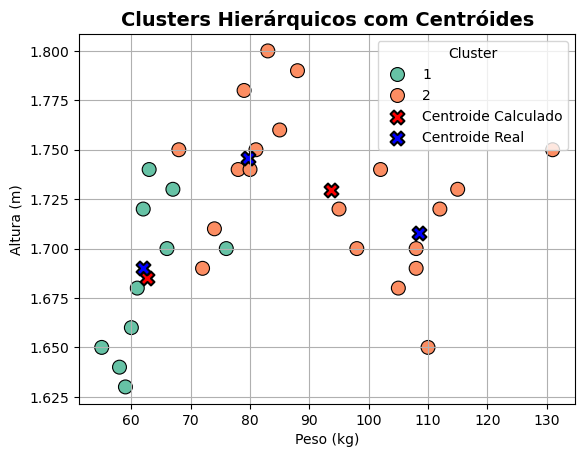

--- Clustering with complete linkage and cityblock distance ---
DENDOGRAMA


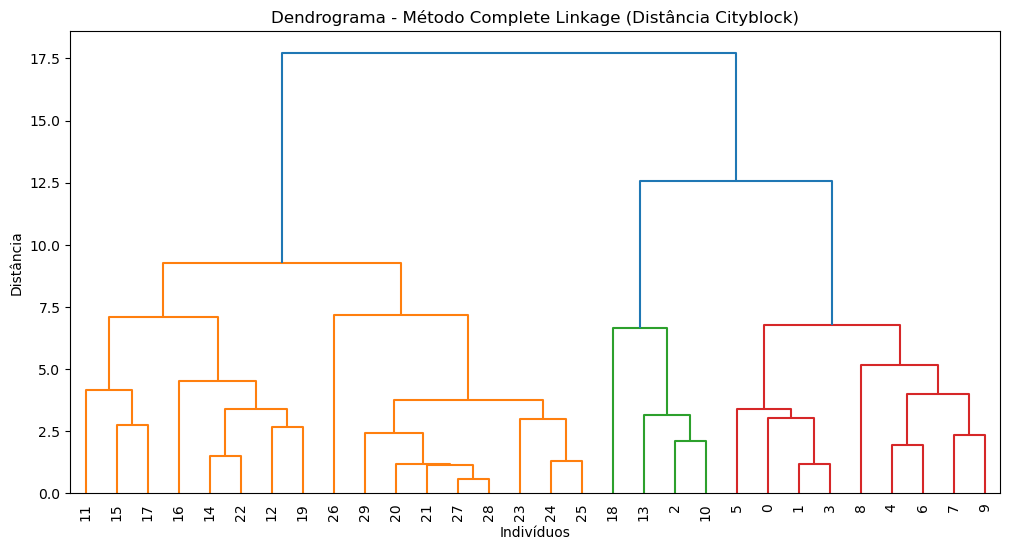

AVALIAÇÃO DO NÚMERO DE CLUSTERS


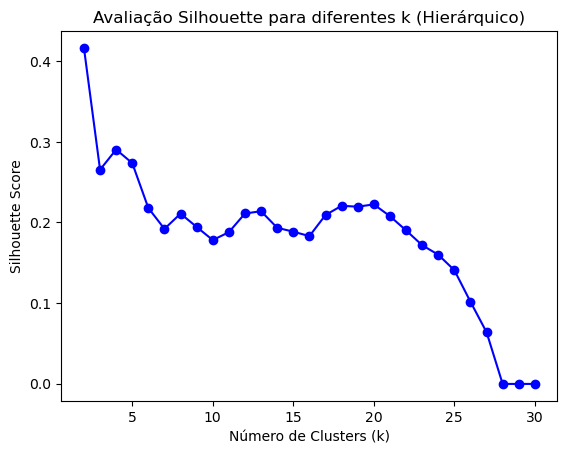

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.417)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.440
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                     0  10
1                     7   3
2                    10   0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    96.352941  1.724118
2                    66.230769  1.702308

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


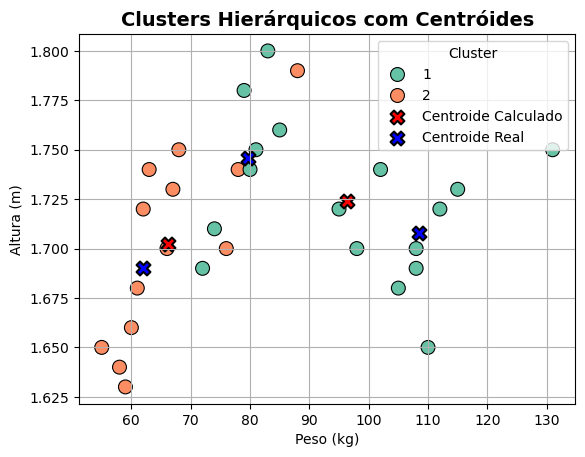

--- Clustering with complete linkage and cosine distance ---
DENDOGRAMA


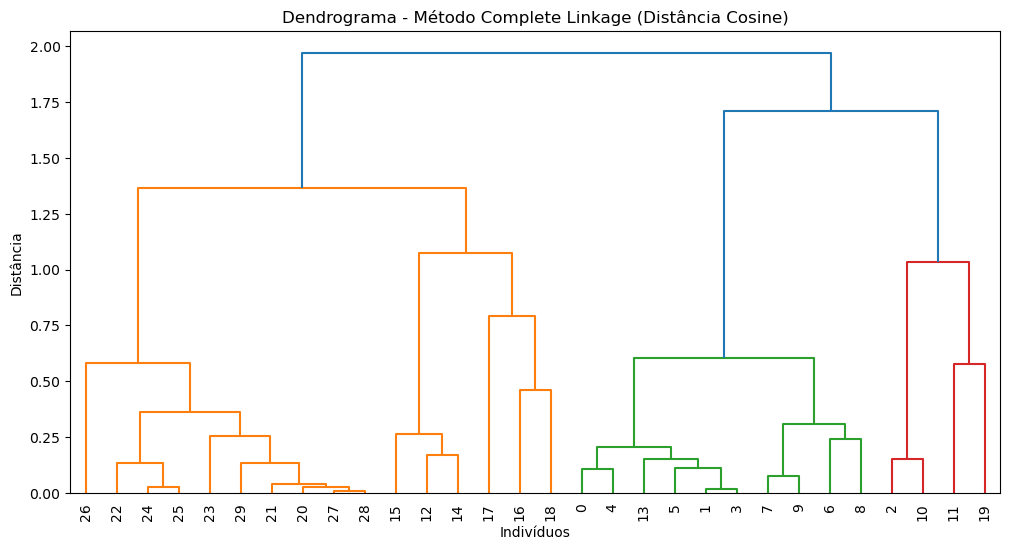

AVALIAÇÃO DO NÚMERO DE CLUSTERS


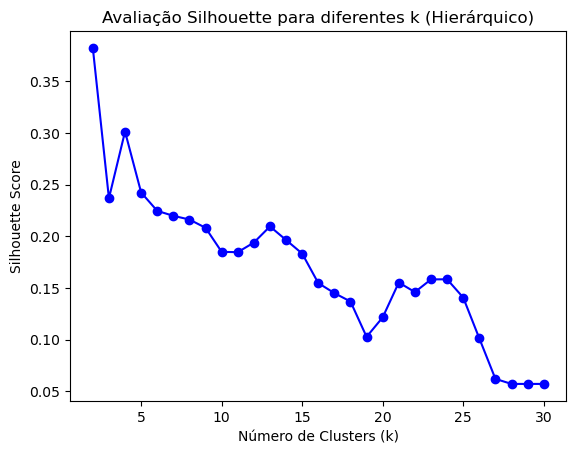

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.382)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.423
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                     0  10
1                     6   4
2                    10   0
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    98.375000  1.729375
2                    66.071429  1.697857

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


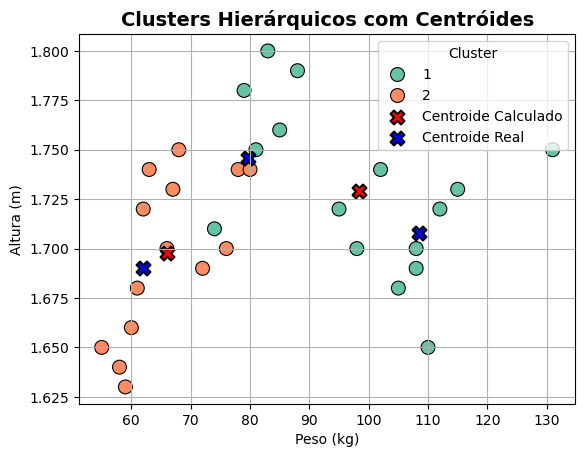

--- Clustering with average linkage and euclidean distance ---
DENDOGRAMA


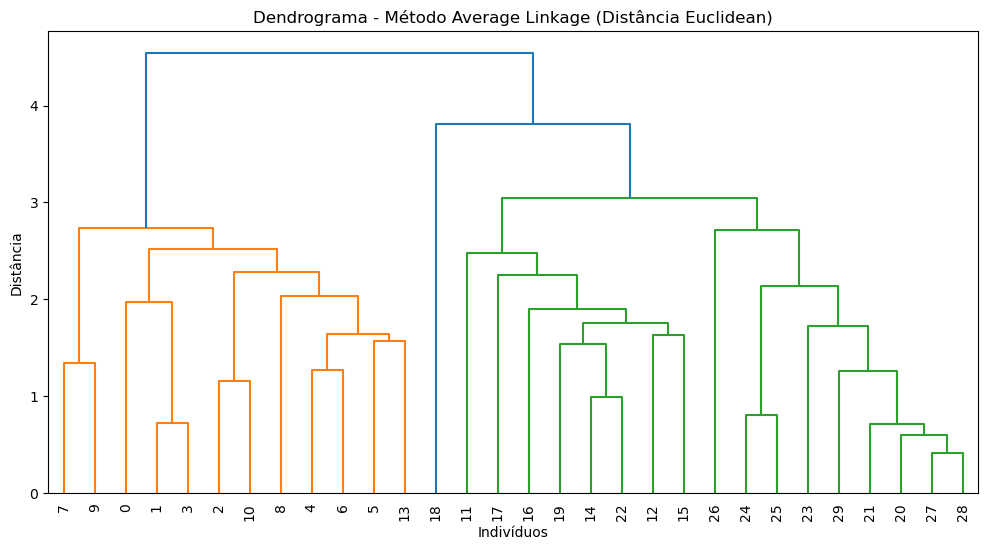

AVALIAÇÃO DO NÚMERO DE CLUSTERS


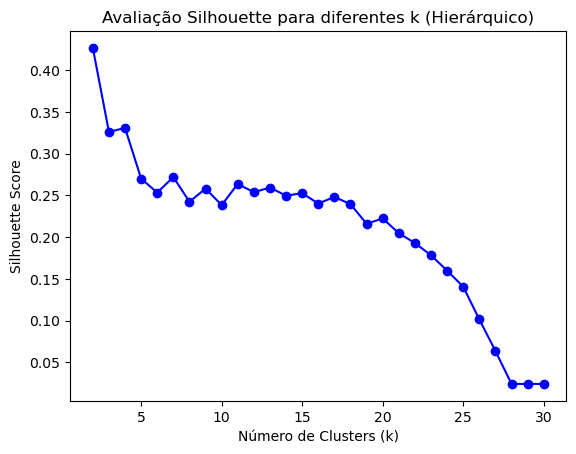

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.427)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.468
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                    10   0
1                     2   8
2                     0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


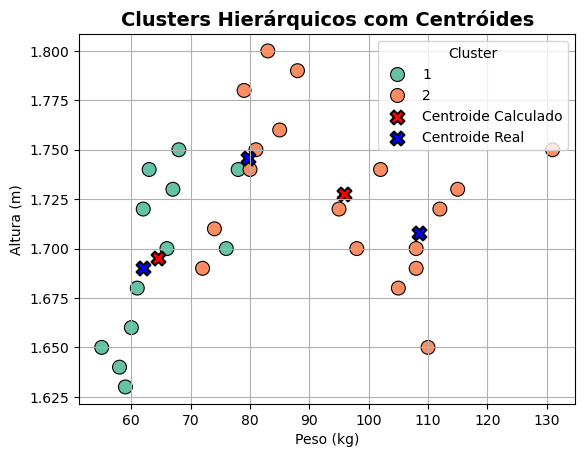

--- Clustering with average linkage and cityblock distance ---
DENDOGRAMA


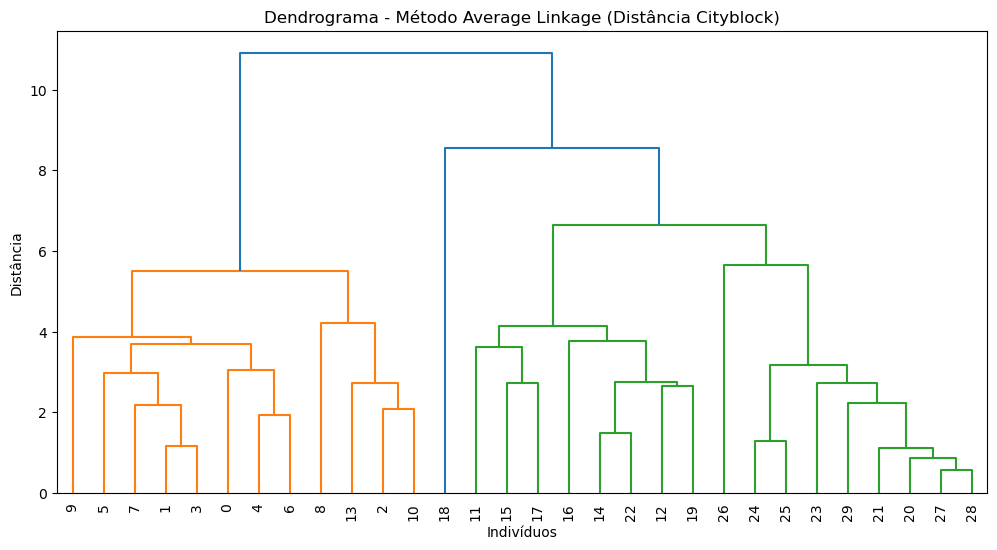

AVALIAÇÃO DO NÚMERO DE CLUSTERS


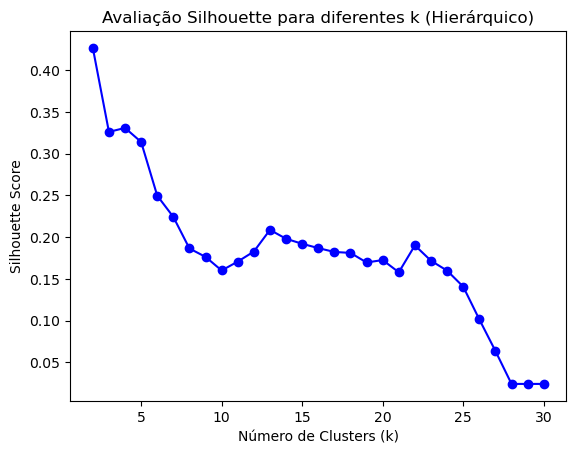

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.427)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.468
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                    10   0
1                     2   8
2                     0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


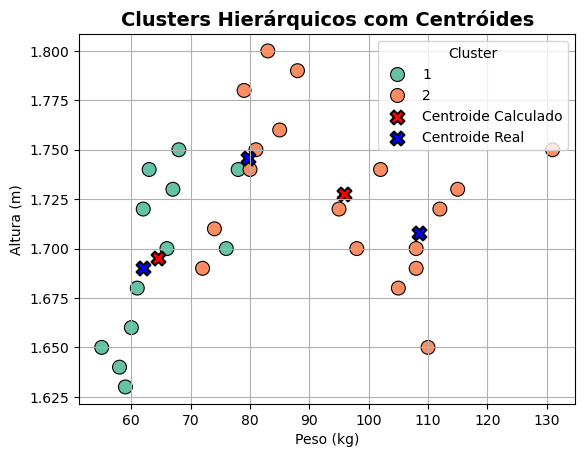

--- Clustering with average linkage and cosine distance ---
DENDOGRAMA


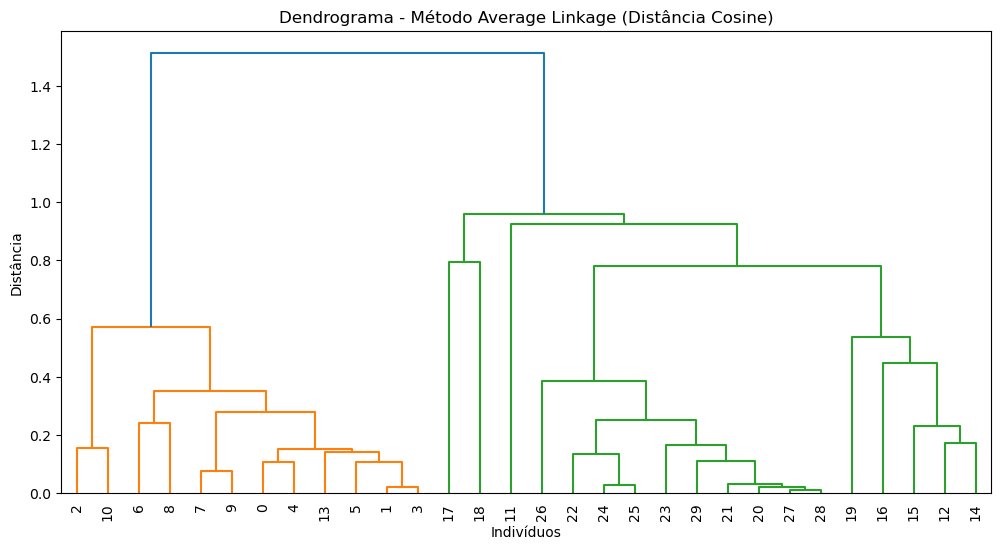

AVALIAÇÃO DO NÚMERO DE CLUSTERS


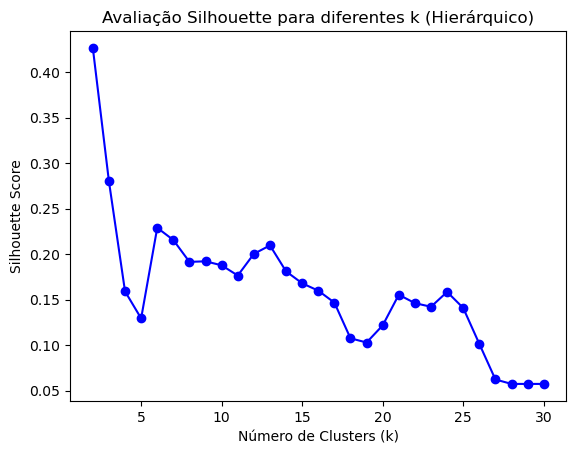

➡️ Número inicial de clusters sugerido: 2 (Silhouette = 0.427)
CÁLCULO DO ARI
Adjusted Rand Index (ARI) = 0.468
TABELA DE CONTINGÊNCIA
Cluster_Hierarquico   1   2
Grupo_Real                 
0                    10   0
1                     2   8
2                     0  10
VISUALIZAÇÃO DOS CLUSTERS
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


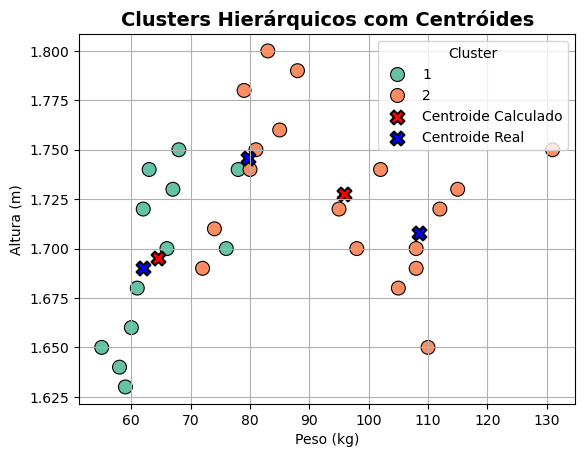

In [ ]:

if __name__ == "__main__":
    X = numericDataToCluster(dados_simulados) #Análise dos dados numéricos para clustering
    X_scaled = StandardScaler().fit_transform(X)  #Normalizar os dados para não enviesar
    labels_reais = [0]*10 + [1]*10 + [2]*10
    i = 0
    listIterations = []
    for method in listingMethods:
        for distance in listingDistances:
            print(f"--- Clustering with {method} linkage and {distance} distance ---")
            print("DENDOGRAMA")
            # Simulate clustering process
            Z = linkageAndDistance(X_scaled, method, distance)
            dados_simulados["Cluster_Hierarquico"] = fcluster(Z, t=3, criterion='maxclust')

            print("AVALIAÇÃO DO NÚMERO DE CLUSTERS")
            k_otimo, sil_score = clusterAndEvaluate(X_scaled,Z)
            
            print("CÁLCULO DO ARI")
            # Cálculo do ARI
            clusters_hier = fcluster(Z, t=k_otimo, criterion='maxclust')
            ari = adjusted_rand_score(labels_reais, clusters_hier)
            print(f"Adjusted Rand Index (ARI) = {ari:.3f}")


            dados_simulados["Cluster_Hierarquico"] = clusters_hier
            dados_simulados["Grupo_Real"] = labels_reais

            print("TABELA DE CONTINGÊNCIA")
            print(pd.crosstab(dados_simulados["Grupo_Real"], dados_simulados["Cluster_Hierarquico"]))
            
            print("VISUALIZAÇÃO DOS CLUSTERS")
            visualizeClusters(dados_simulados)
            listIterations.append((i, method, distance, k_otimo, ari, sil_score))
            Z = None
            i+=1
    

In [58]:
listIterations

[(0, 'single', 'euclidean', 3, 0.4660257454782467, 0.3260673944697844),
 (1, 'single', 'cityblock', 3, 0.4471240019553528, 0.2652760589438855),
 (2, 'single', 'cosine', 8, 0.6577674598568388, 0.20213803976239164),
 (3, 'complete', 'euclidean', 2, 0.3932307692307692, 0.3928723671995675),
 (4, 'complete', 'cityblock', 2, 0.4402616047216462, 0.4167114203669051),
 (5, 'complete', 'cosine', 2, 0.423348300192431, 0.38209261025591634),
 (6, 'average', 'euclidean', 2, 0.46805819101834284, 0.4265932868136867),
 (7, 'average', 'cityblock', 2, 0.46805819101834284, 0.4265932868136867),
 (8, 'average', 'cosine', 2, 0.46805819101834284, 0.4265932868136867)]


🔹 Clustering com SINGLE linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    96.352941  1.724118
3                    88.000000  1.790000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


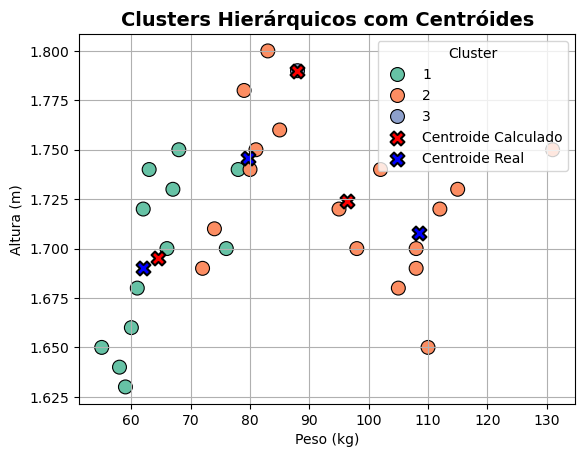


🔹 Clustering com SINGLE linkage e CITYBLOCK distance 🔹
Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     64.416667  1.695000
2                     93.823529  1.726471
3                    131.000000  1.750000

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


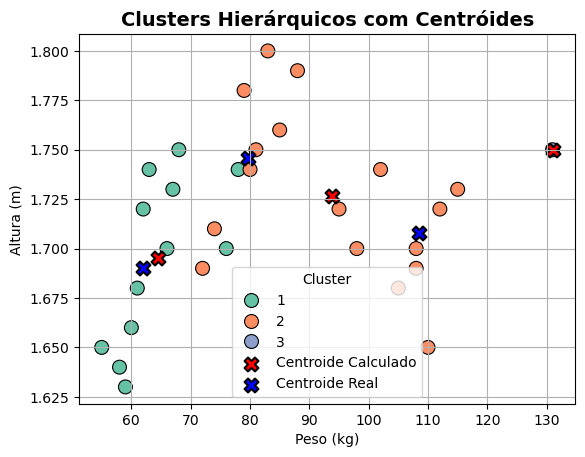


🔹 Clustering com COMPLETE linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                      Peso  Altura
Cluster_Hierarquico              
1                    62.7  1.6850
2                    93.6  1.7295

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


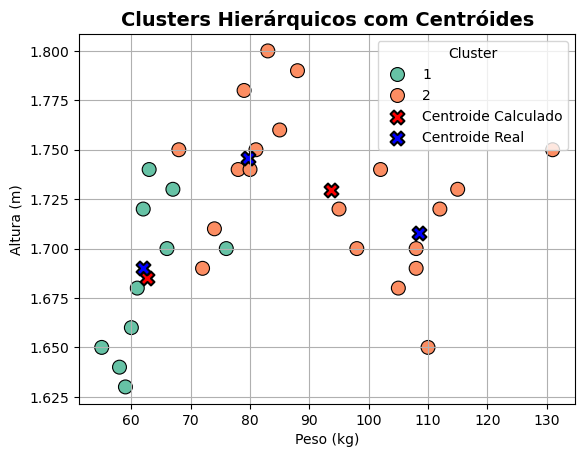


🔹 Clustering com COMPLETE linkage e CITYBLOCK distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    96.352941  1.724118
2                    66.230769  1.702308

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


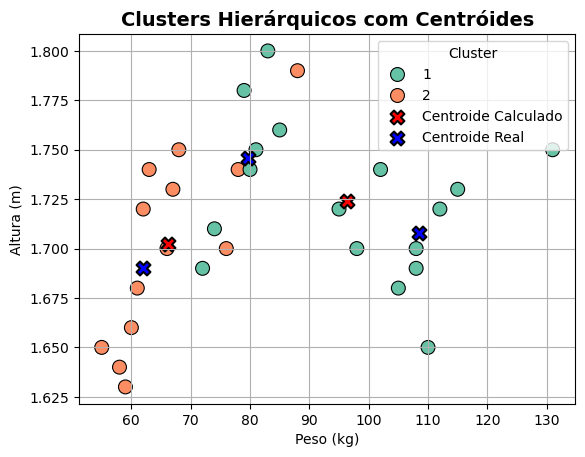


🔹 Clustering com AVERAGE linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


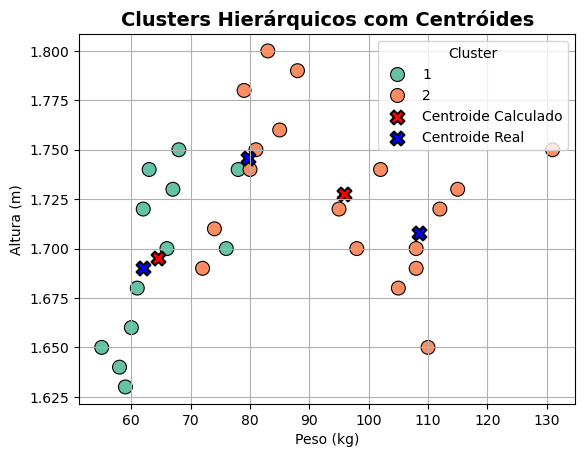


🔹 Clustering com AVERAGE linkage e CITYBLOCK distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


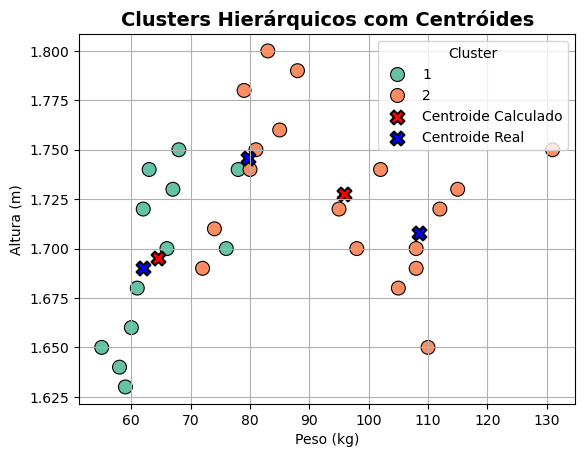


🔹 Clustering com CENTROID linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


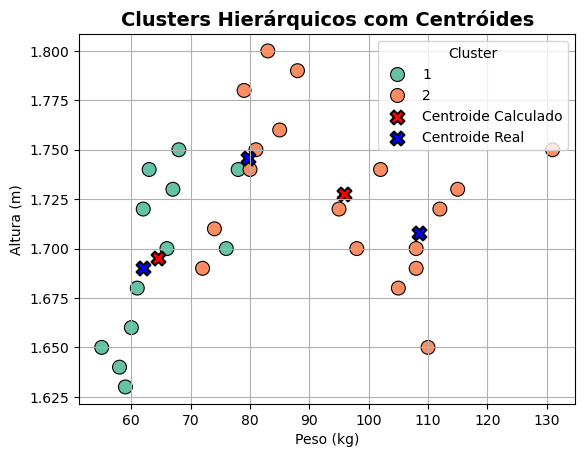


🔹 Clustering com WARD linkage e EUCLIDEAN distance 🔹
Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    64.416667  1.695000
2                    95.888889  1.727778

Centroides dos grupos reais:
              Peso  Altura
Grupo_Real               
0            61.9   1.690
1            79.6   1.746
2           108.4   1.708


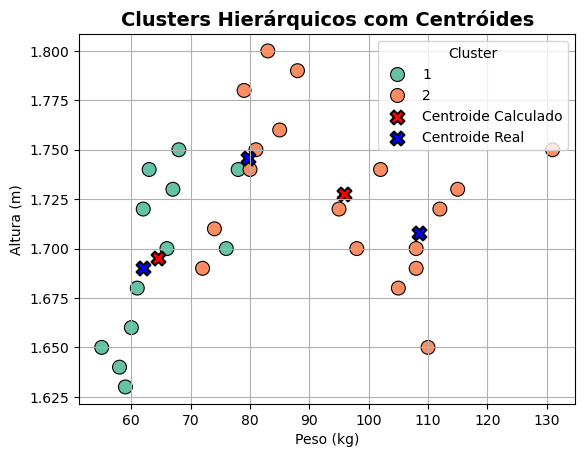

In [107]:
# ==========================================================
#  ANÁLISE HIERÁRQUICA COMPLETA (com Minkowski)
# ==========================================================
if __name__ == "__main__":

    listingMethods = ["single", "complete", "average", "centroid", "ward"]
    listingDistances = ["euclidean", "cityblock"]

    X = numericDataToCluster(dados_simulados)
    X_scaled = StandardScaler().fit_transform(X)
    labels_reais = [0]*10 + [1]*10 + [2]*10

    resultados_hierarquico = []
    i = 0

    for method in listingMethods:
        for distance in listingDistances:

            # ⚠️ Ward e Centroid apenas aceitam Euclidiana
            if method in ["ward", "centroid"] and distance != "euclidean":
                continue

            print(f"\n🔹 Clustering com {method.upper()} linkage e {distance.upper()} distance 🔹")

            Z = linkage(X_scaled, method=method, metric=distance)


            # Avaliar número ótimo via Silhouette
            sil_scores = []
            k_values = range(2, 10)
            for k in k_values:
                clusters = fcluster(Z, t=k, criterion='maxclust')
                sil_scores.append(silhouette_score(X_scaled, clusters))

            k_otimo = k_values[np.argmax(sil_scores)]
            sil_max = max(sil_scores)
            clusters_final = fcluster(Z, t=k_otimo, criterion='maxclust')

            # ARI
            ari = adjusted_rand_score(labels_reais, clusters_final)

            resultados_hierarquico.append({
                "Método": method,
                "Distância": distance,
                "Melhor k": k_otimo,
                "Silhouette": round(sil_max, 3),
                "ARI": round(ari, 3)
            })

            # Atribuir clusters e visualizar
            dados_simulados["Cluster_Hierarquico"] = clusters_final
            dados_simulados["Grupo_Real"] = labels_reais
            visualizeClusters(dados_simulados)

            i += 1




Método  Distância  Melhor k  Silhouette    ARI
0   average  euclidean         2       0.427  0.468
1   average  cityblock         2       0.427  0.468
2  centroid  euclidean         2       0.427  0.468
3      ward  euclidean         2       0.427  0.468
4  complete  cityblock         2       0.417  0.440
5  complete  euclidean         2       0.393  0.393
6    single  euclidean         3       0.326  0.466
7    single  cityblock         3       0.265  0.447

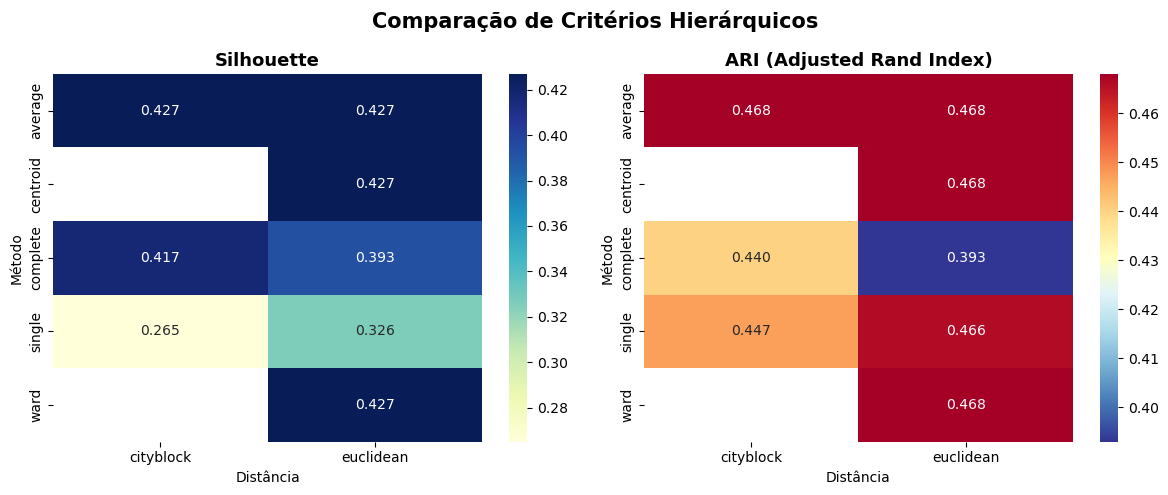


📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):


Silhouette    ARI
Método                     
average        0.427  0.468
centroid       0.427  0.468
ward           0.427  0.468
complete       0.405  0.416
single         0.296  0.456

In [108]:

# ============================================
# TABELA FINAL DE RESULTADOS
# ============================================
df_resultados = pd.DataFrame(resultados_hierarquico)
df_resultados = df_resultados.sort_values(by="Silhouette", ascending=False).reset_index(drop=True)
display(df_resultados)

# ============================================
# HEATMAPS COMPARATIVOS
# ============================================
df_resultados["Método"] = df_resultados["Método"].astype(str)
df_resultados["Distância"] = df_resultados["Distância"].astype(str)

pivot_silhouette = df_resultados.pivot(index="Método", columns="Distância", values="Silhouette")
pivot_ari = df_resultados.pivot(index="Método", columns="Distância", values="ARI")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pivot_silhouette, annot=True, fmt=".3f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Silhouette", fontsize=13, fontweight="bold")

sns.heatmap(pivot_ari, annot=True, fmt=".3f", cmap="RdYlBu_r", ax=axes[1])
axes[1].set_title("ARI (Adjusted Rand Index)", fontsize=13, fontweight="bold")

for ax in axes:
    ax.set_xlabel("Distância")
    ax.set_ylabel("Método")

plt.suptitle("Comparação de Critérios Hierárquicos", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

# ============================================
# RESUMO MÉDIO POR MÉTODO (independente da distância)
# ============================================
resumo_metodo = (
    df_resultados.groupby("Método")[["Silhouette", "ARI"]]
    .mean()
    .sort_values(by="Silhouette", ascending=False)
    .round(3)
)
print("\n📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):")
display(resumo_metodo)


### Exemplo Ideal -> Parte 1 (o que está para trás é para descartar)

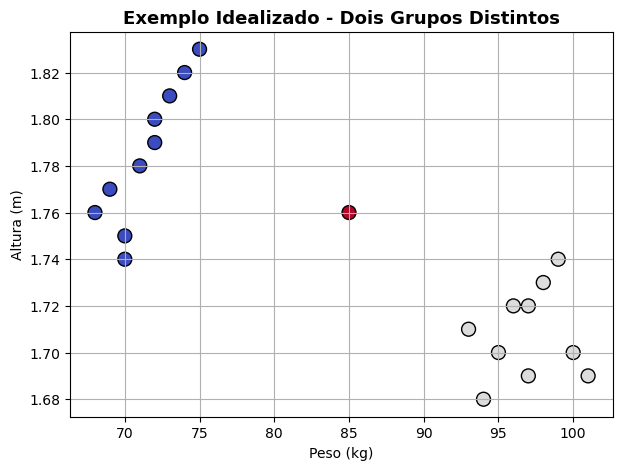

In [54]:
# ============================================================
# CRIAÇÃO DE UM EXEMPLO IDEALIZADO DE 2 GRUPOS
# ============================================================

dados_exemplo = pd.DataFrame({
    "Individuo": [f"Ind_{i}" for i in range(1, 22)],
    "Altura": [
        # Grupo A - saudável (altura/peso ~ 0.025)
        1.80, 1.75, 1.78, 1.82, 1.77,
        1.76, 1.81, 1.74, 1.79, 1.83,
        # Grupo B - mais pesado (altura/peso ~ 0.018–0.020)
        1.70, 1.68, 1.72, 1.69, 1.71,
        1.73, 1.70, 1.74, 1.69, 1.72,
        #Individuo desconectado
        1.76
    ],
    "Peso": [
        # Grupo A (peso equilibrado)
        72, 70, 71, 74, 69,
        68, 73, 70, 72, 75,
        # Grupo B (peso elevado)
        95, 94, 96, 97, 93,
        98, 100, 99, 101, 97,
        #Individuo desconectado 
        85
    ]
})

# Calcular o rácio Altura/Peso
dados_exemplo["Racio_Altura_Peso"] = dados_exemplo["Altura"] / dados_exemplo["Peso"]

# Adicionar etiquetas reais (só para validação)
dados_exemplo["Grupo_Real"] = [0]*10 + [1]*10 + [2]

dados_exemplo

plt.figure(figsize=(7,5))
plt.scatter(dados_exemplo["Peso"], dados_exemplo["Altura"], 
            c=dados_exemplo["Grupo_Real"], cmap="coolwarm", s=100, edgecolor="k")

plt.title("Exemplo Idealizado - Dois Grupos Distintos", fontsize=13, fontweight="bold")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (m)")
plt.grid(True)
plt.show()


In [25]:
# =====================================================
# 1️⃣ SCATTER PLOT
# =====================================================
def plot_scatter(df, x, y, hue="Grupo_Real", title=None, palette="Set2"):
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df, x=x, y=y, hue=hue,
        palette=palette, s=100, edgecolor="k", alpha=0.9
    )
    plt.title(title or f"Scatter Plot: {y} vs {x}", fontsize=13, fontweight="bold")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


# =====================================================
# 2️⃣ HISTOGRAMAS COM KDE
# =====================================================
def plot_hist(df, var, hue="Grupo_Real", bins=15, palette="Set2", title=None):
    plt.figure(figsize=(7, 4))
    sns.histplot(
        data=df, x=var, hue=hue,
        bins=bins, kde=True, palette=palette, alpha=0.7
    )
    plt.title(title or f"Distribuição de {var}", fontsize=13, fontweight="bold")
    plt.xlabel(var)
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.show()


# =====================================================
# 3️⃣ BOXPLOTS
# =====================================================
def plot_box(df, var, group="Grupo_Real", palette="Set2", title=None):
    plt.figure(figsize=(6, 5))
    sns.boxplot(
        data=df, x=group, y=var, palette=palette
    )
    plt.title(title or f"Boxplot de {var}", fontsize=13, fontweight="bold")
    plt.xlabel("Grupo")
    plt.ylabel(var)
    plt.grid(True, axis='y')
    plt.show()


# =====================================================
# 4️⃣ DENSIDADE BIVARIADA (KDE)
# =====================================================
def plot_kde2d(df, x, y, cmap="coolwarm", title=None):
    plt.figure(figsize=(7, 5))
    sns.kdeplot(
        data=df, x=x, y=y,
        fill=True, cmap=cmap, thresh=0.05, alpha=0.6
    )
    plt.title(title or f"Mapa de Densidade: {y} vs {x}", fontsize=13, fontweight="bold")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()


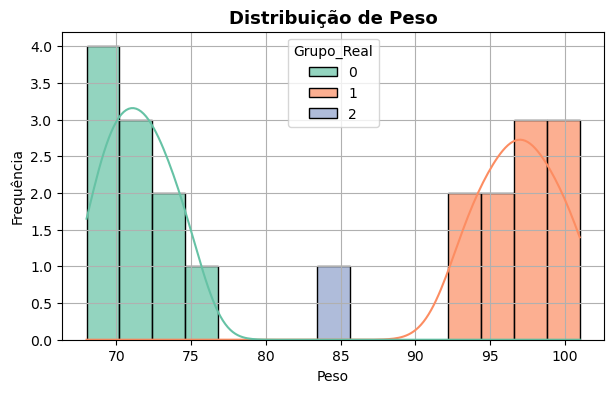

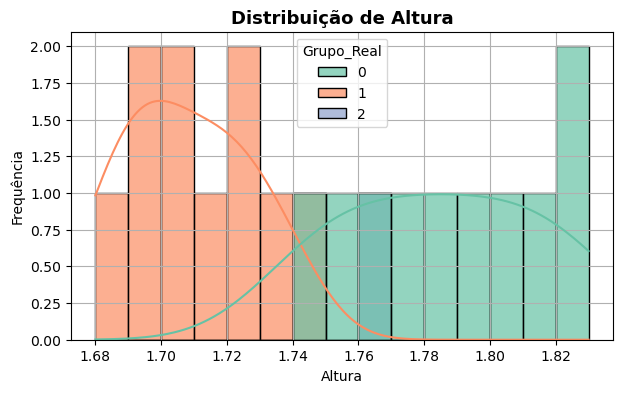

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\2494685813.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


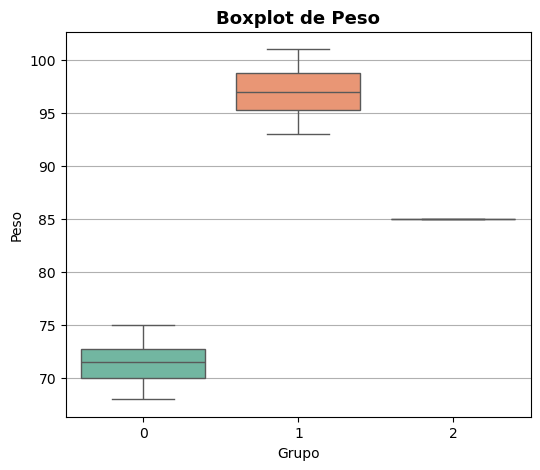

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\2494685813.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


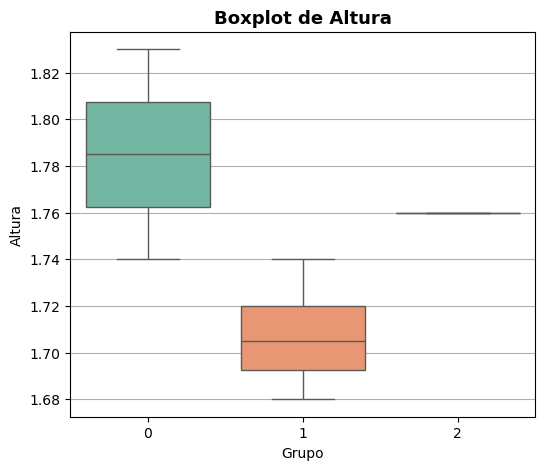

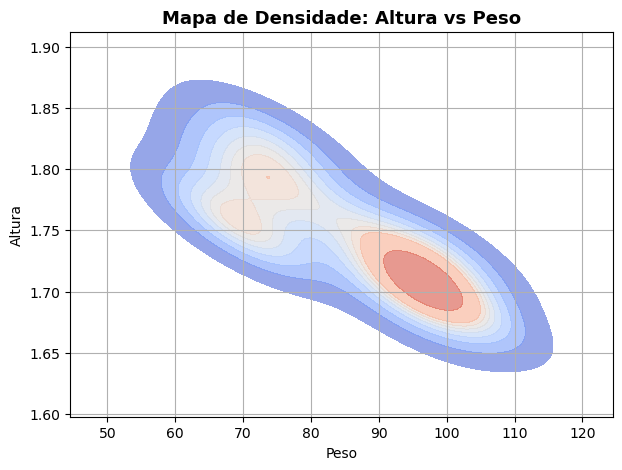

In [31]:
# ===============================
# 2️⃣ HISTOGRAMAS INDIVIDUAIS
# ===============================
plot_hist(dados_exemplo, "Peso")
plot_hist(dados_exemplo, "Altura")

# ===============================
# 3️⃣ BOXPLOTS - Outliers e Dispersão
# ===============================
plot_box(dados_exemplo, "Peso")
plot_box(dados_exemplo, "Altura")

# ===============================
# 4️⃣ KDE PLOT - Densidade Bivariada
# ===============================
plot_kde2d(dados_exemplo, "Peso", "Altura")


🔹 Clustering com SINGLE linkage e EUCLIDEAN distance 🔹


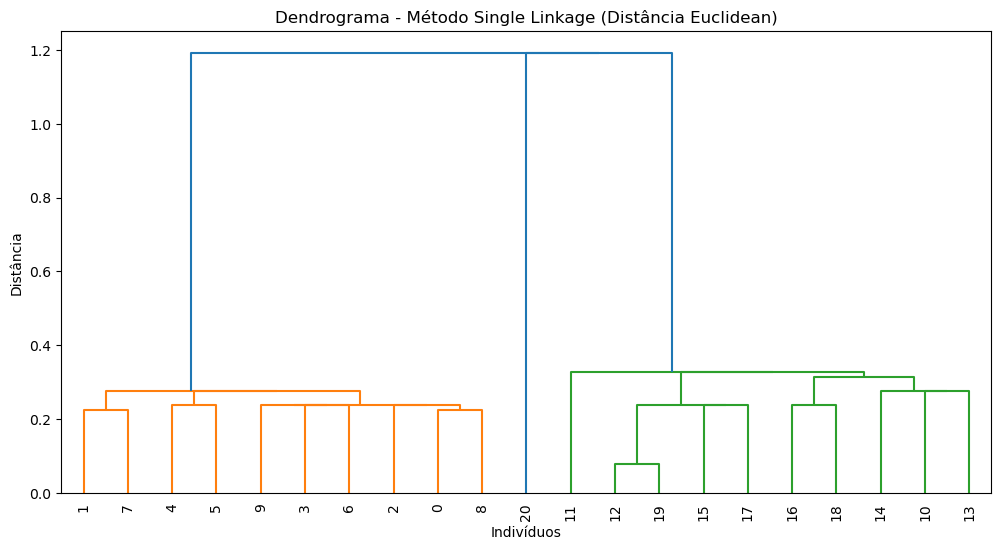

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    71.400000  1.785000
2                    95.909091  1.712727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


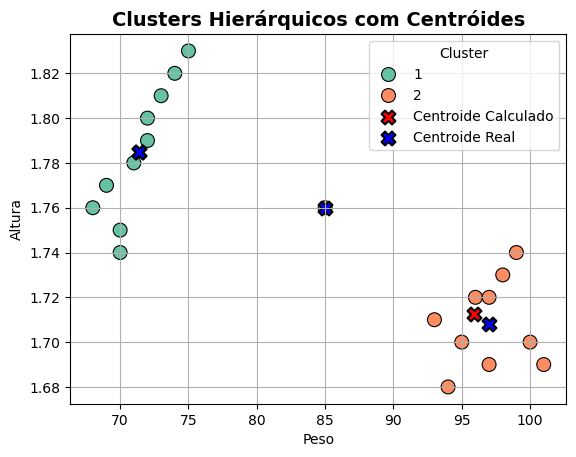


🔹 Clustering com SINGLE linkage e CITYBLOCK distance 🔹


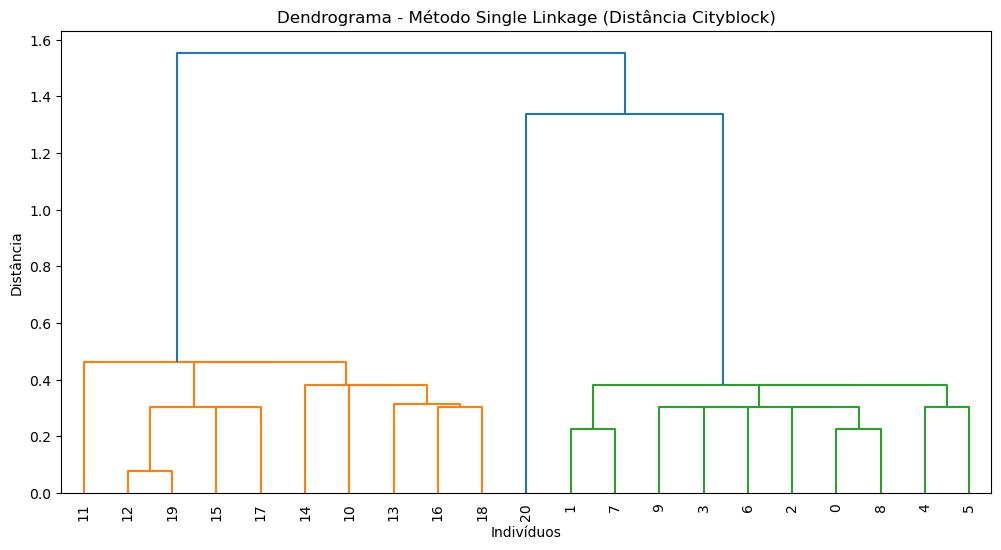

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    97.000000  1.708000
2                    72.636364  1.782727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


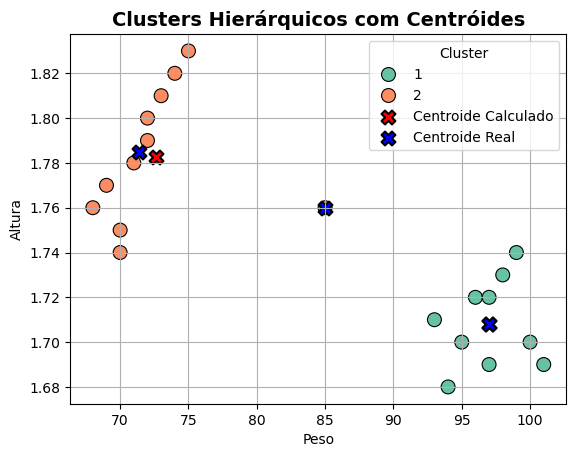


🔹 Clustering com COMPLETE linkage e EUCLIDEAN distance 🔹


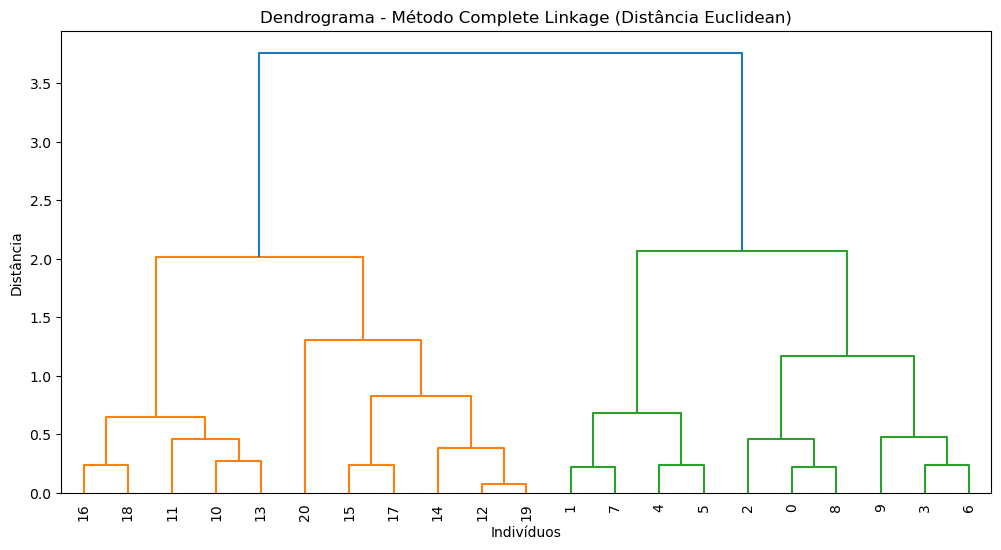

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    95.909091  1.712727
2                    71.400000  1.785000

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


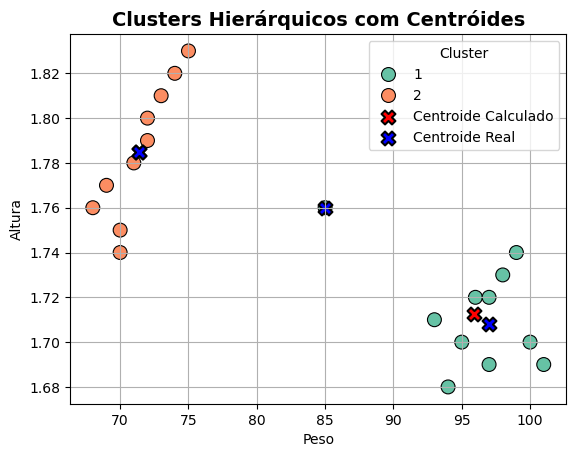


🔹 Clustering com COMPLETE linkage e CITYBLOCK distance 🔹


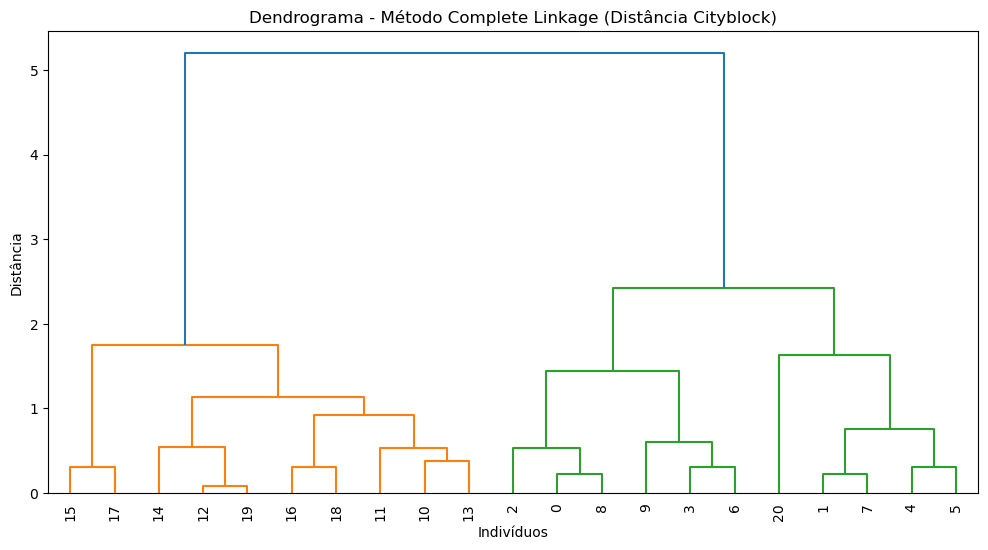

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    97.000000  1.708000
2                    72.636364  1.782727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


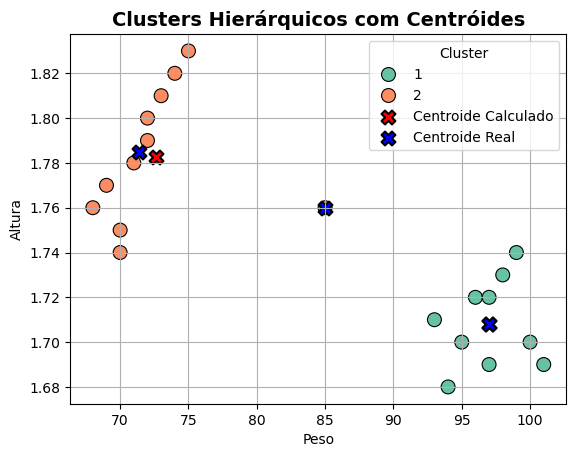


🔹 Clustering com AVERAGE linkage e EUCLIDEAN distance 🔹


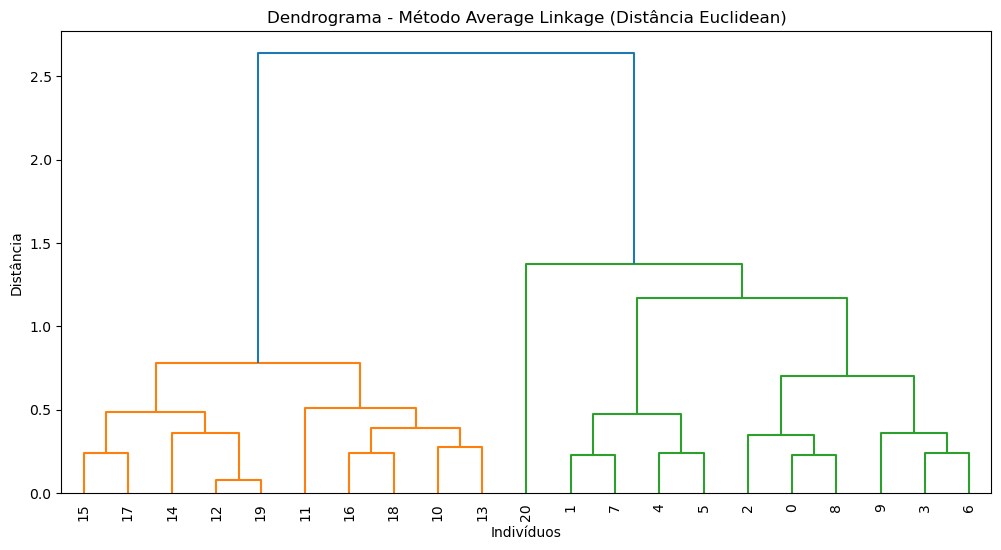

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    97.000000  1.708000
2                    72.636364  1.782727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


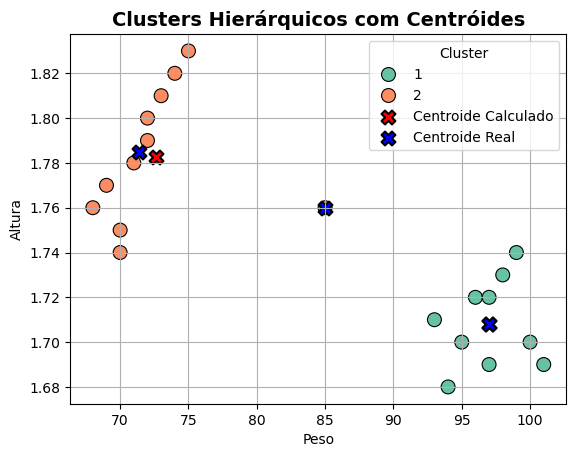


🔹 Clustering com AVERAGE linkage e CITYBLOCK distance 🔹


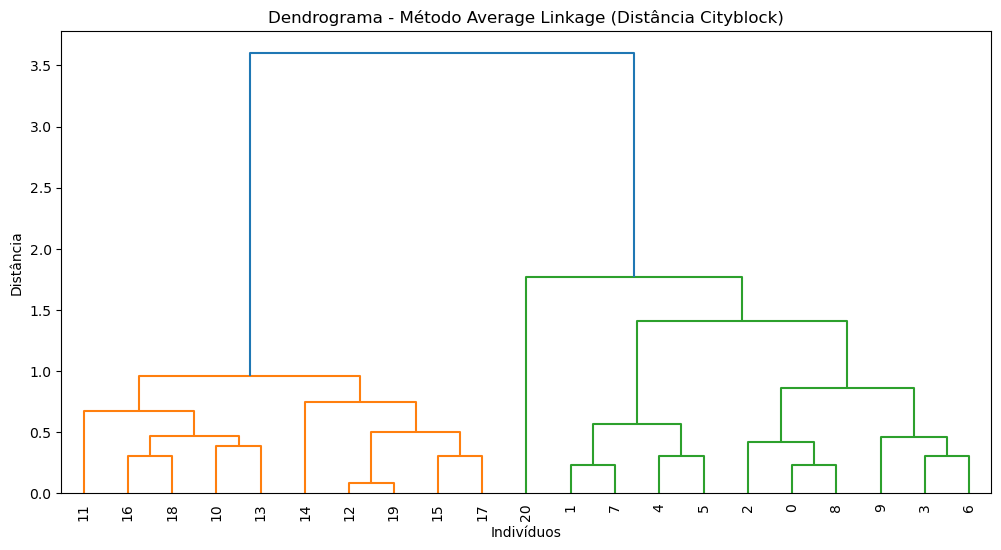

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    97.000000  1.708000
2                    72.636364  1.782727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


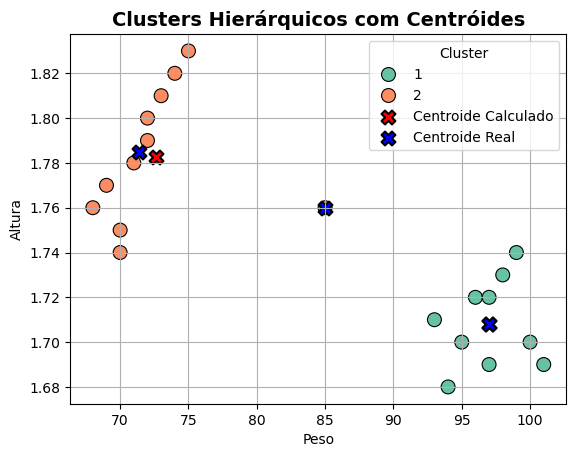


🔹 Clustering com CENTROID linkage e EUCLIDEAN distance 🔹


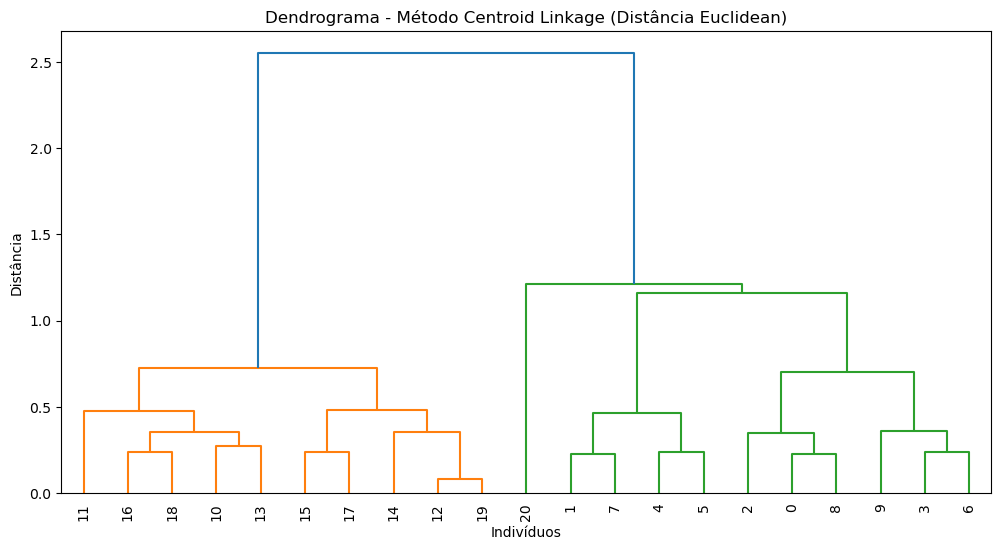

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    97.000000  1.708000
2                    72.636364  1.782727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


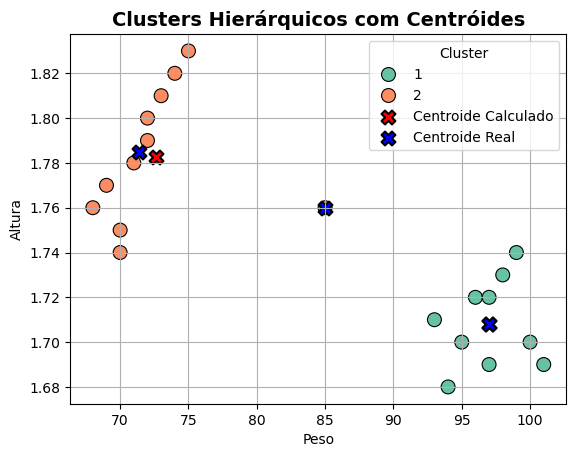


🔹 Clustering com WARD linkage e EUCLIDEAN distance 🔹


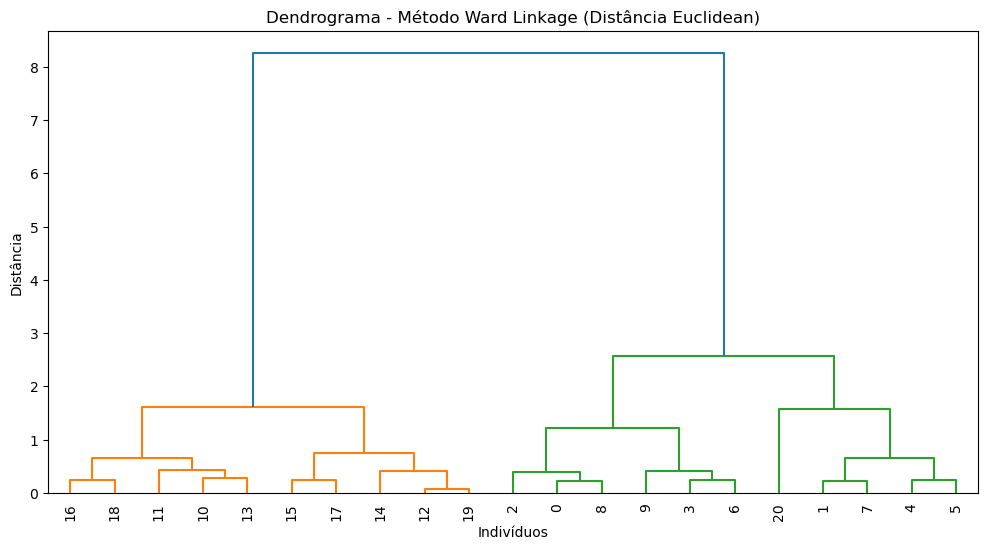

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    97.000000  1.708000
2                    72.636364  1.782727

Centroides dos grupos reais:
             Peso  Altura
Grupo_Real              
0           71.4   1.785
1           97.0   1.708
2           85.0   1.760


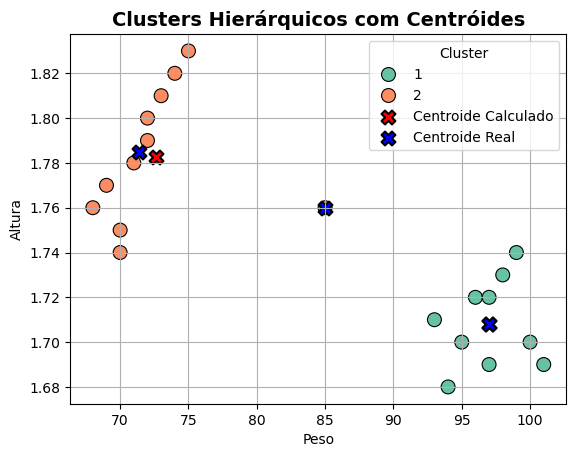

In [57]:
if __name__ == "__main__":

    listingMethods = ["single", "complete", "average", "centroid", "ward"]
    listingDistances = ["euclidean", "cityblock"]


    X_scaled = StandardScaler().fit_transform(dados_exemplo[["Altura","Peso"]])
    labels_reais = [0]*10 + [1]*10 + [2]

    resultados_hierarquico = []
    i = 0

    for method in listingMethods:
        for distance in listingDistances:

            # ⚠️ Ward e Centroid apenas aceitam Euclidiana
            if method in ["ward", "centroid"] and distance != "euclidean":
                continue

            print(f"\n🔹 Clustering com {method.upper()} linkage e {distance.upper()} distance 🔹")

            Z = linkageAndDistance(X_scaled, method, distance)


            # Avaliar número ótimo via Silhouette
            sil_scores = []
            k_values = range(2, 10)
            for k in k_values:
                clusters = fcluster(Z, t=k, criterion='maxclust')
                sil_scores.append(silhouette_score(X_scaled, clusters))

            k_otimo = k_values[np.argmax(sil_scores)]
            sil_max = max(sil_scores)
            clusters_final = fcluster(Z, t=k_otimo, criterion='maxclust')

            # ARI
            ari = adjusted_rand_score(labels_reais, clusters_final)

            resultados_hierarquico.append({
                "Método": method,
                "Distância": distance,
                "Melhor k": k_otimo,
                "Silhouette": round(sil_max, 3),
                "ARI": round(ari, 3)
            })

            # Atribuir clusters e visualizar
            dados_exemplo["Cluster_Hierarquico"] = clusters_final
            dados_exemplo["Grupo_Real"] = labels_reais
            visualizeClusters(dados_exemplo, "Peso", "Altura")

            i += 1

Método  Distância  Melhor k  Silhouette    ARI
0    single  cityblock         2       0.687  0.904
1  complete  cityblock         2       0.687  0.904
2   average  euclidean         2       0.687  0.904
3   average  cityblock         2       0.687  0.904
4  centroid  euclidean         2       0.687  0.904
5      ward  euclidean         2       0.687  0.904
6    single  euclidean         2       0.667  0.904
7  complete  euclidean         2       0.667  0.904

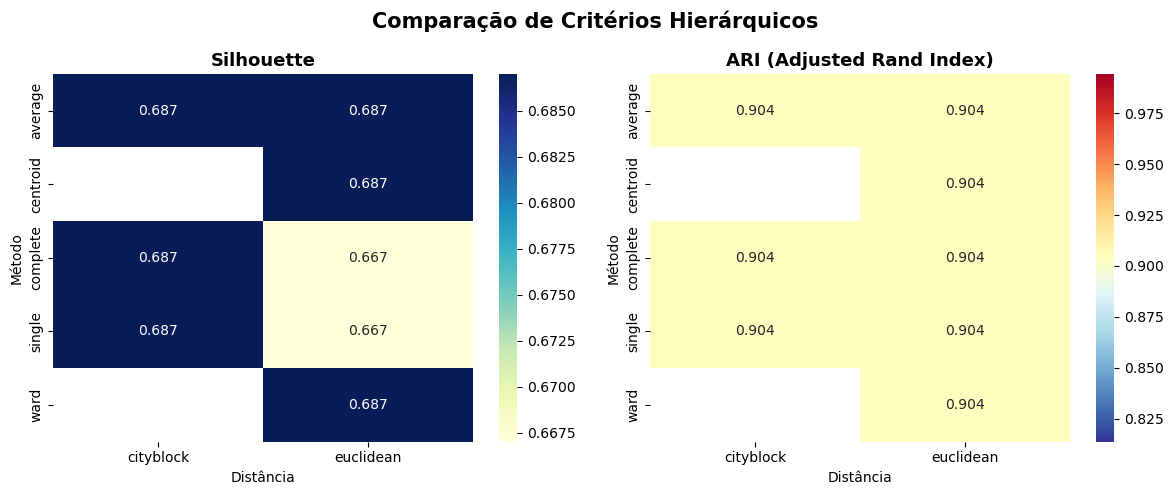


📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):


Silhouette    ARI
Método                     
average        0.687  0.904
centroid       0.687  0.904
ward           0.687  0.904
complete       0.677  0.904
single         0.677  0.904

In [22]:
# ============================================
# TABELA FINAL DE RESULTADOS
# ============================================
df_resultados = pd.DataFrame(resultados_hierarquico)
df_resultados = df_resultados.sort_values(by="Silhouette", ascending=False).reset_index(drop=True)
display(df_resultados)

# ============================================
# HEATMAPS COMPARATIVOS
# ============================================
df_resultados["Método"] = df_resultados["Método"].astype(str)
df_resultados["Distância"] = df_resultados["Distância"].astype(str)

pivot_silhouette = df_resultados.pivot(index="Método", columns="Distância", values="Silhouette")
pivot_ari = df_resultados.pivot(index="Método", columns="Distância", values="ARI")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pivot_silhouette, annot=True, fmt=".3f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Silhouette", fontsize=13, fontweight="bold")

sns.heatmap(pivot_ari, annot=True, fmt=".3f", cmap="RdYlBu_r", ax=axes[1])
axes[1].set_title("ARI (Adjusted Rand Index)", fontsize=13, fontweight="bold")

for ax in axes:
    ax.set_xlabel("Distância")
    ax.set_ylabel("Método")

plt.suptitle("Comparação de Critérios Hierárquicos", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

# ============================================
# RESUMO MÉDIO POR MÉTODO (independente da distância)
# ============================================
resumo_metodo = (
    df_resultados.groupby("Método")[["Silhouette", "ARI"]]
    .mean()
    .sort_values(by="Silhouette", ascending=False)
    .round(3)
)
print("\n📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):")
display(resumo_metodo)


### Exemplo com mais "Entropia"

In [65]:
# ===============================
# GERAR DADOS NORMAIS POR GRUPO
# ===============================

np.random.seed(42)

# Grupo 1 - Saudável
peso_saudavel = np.random.normal(loc=70, scale=4, size=20)     # média 70kg ± 4
altura_saudavel = np.random.normal(loc=1.75, scale=0.03, size=20)

# Grupo 2 - Sobrepeso
peso_sobrepeso = np.random.normal(loc=85, scale=5, size=20)     # média 85kg ± 5
altura_sobrepeso = np.random.normal(loc=1.72, scale=0.03, size=20)

# Grupo 3 - Obesos
peso_obeso = np.random.normal(loc=105, scale=6, size=20)        # média 105kg ± 6
altura_obeso = np.random.normal(loc=1.70, scale=0.03, size=20)

# Criar DataFrame
dados_normais = pd.DataFrame({
    "Peso": np.concatenate([peso_saudavel, peso_sobrepeso, peso_obeso]),
    "Altura": np.concatenate([altura_saudavel, altura_sobrepeso, altura_obeso]),
    "Grupo_Real": [0]*20 + [1]*20 + [2]*20
})

# Calcular rácio Altura/Peso
dados_normais["Racio_Altura_Peso"] = dados_normais["Altura"] / dados_normais["Peso"]

# Visualizar primeiras linhas
dados_normais.head()
dados_normais.describe()


Peso     Altura  Grupo_Real  Racio_Altura_Peso
count   60.000000  60.000000   60.000000          60.000000
mean    86.346041   1.720802    1.000000           0.020588
std     15.196247   0.034863    0.823387           0.003868
min     62.346879   1.641408    0.000000           0.014839
25%     72.124394   1.699143    0.000000           0.016783
50%     85.139300   1.718054    1.000000           0.020024
75%    101.915148   1.745892    2.000000           0.024129
max    113.867364   1.805568    2.000000           0.028125

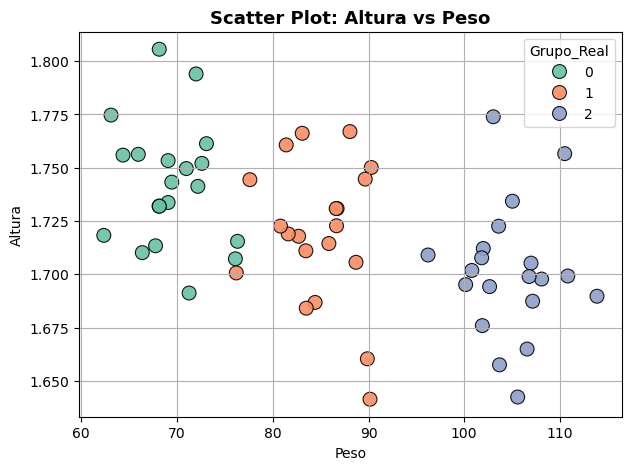

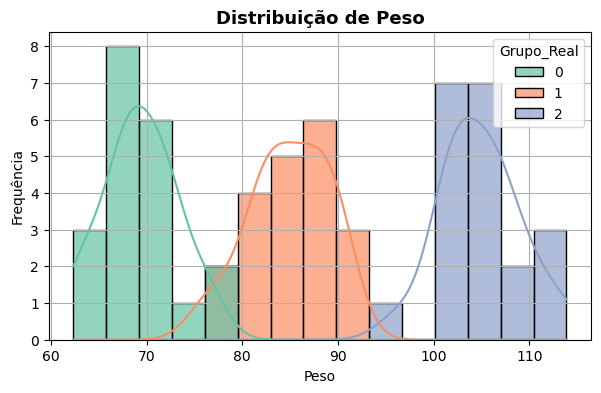

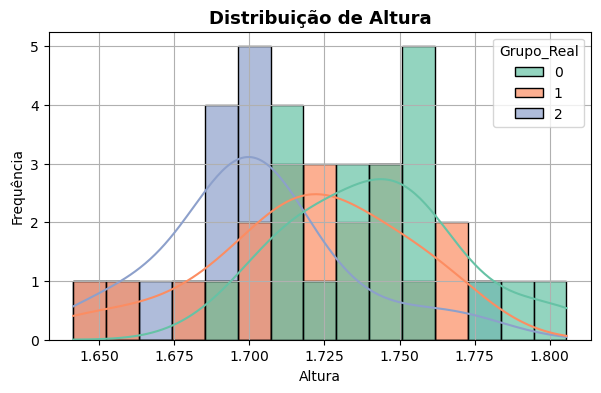

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\2494685813.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


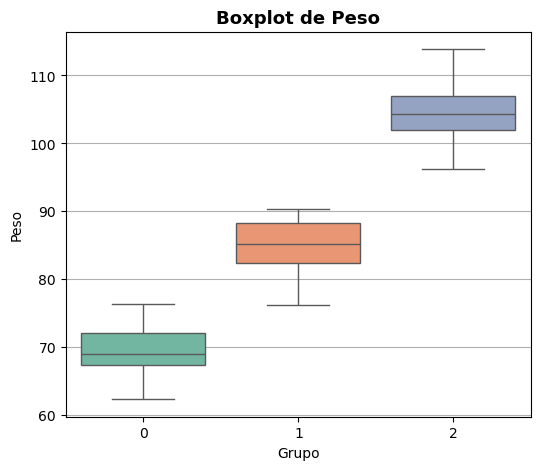

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14160\2494685813.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


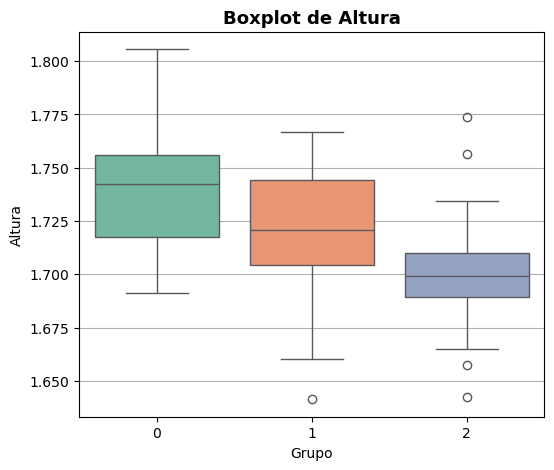

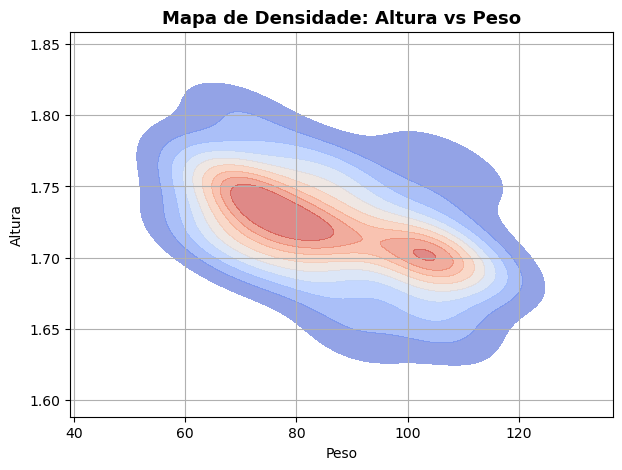

In [34]:
# ===============================
#  1 HISTOGRAMAS INDIVIDUAIS
# ===============================
plot_scatter(dados_normais, "Peso", "Altura", hue="Grupo_Real", title="Scatter Plot: Altura vs Peso")


# ===============================
# 2 HISTOGRAMAS INDIVIDUAIS
# ===============================
plot_hist(dados_normais, "Peso")
plot_hist(dados_normais, "Altura")

# ===============================
# 3️⃣ BOXPLOTS - Outliers e Dispersão
# ===============================
plot_box(dados_normais, "Peso")
plot_box(dados_normais, "Altura")

# ===============================
# 4️⃣ KDE PLOT - Densidade Bivariada
# ===============================
plot_kde2d(dados_normais, "Peso", "Altura")


🔹 Clustering com SINGLE linkage e EUCLIDEAN distance 🔹


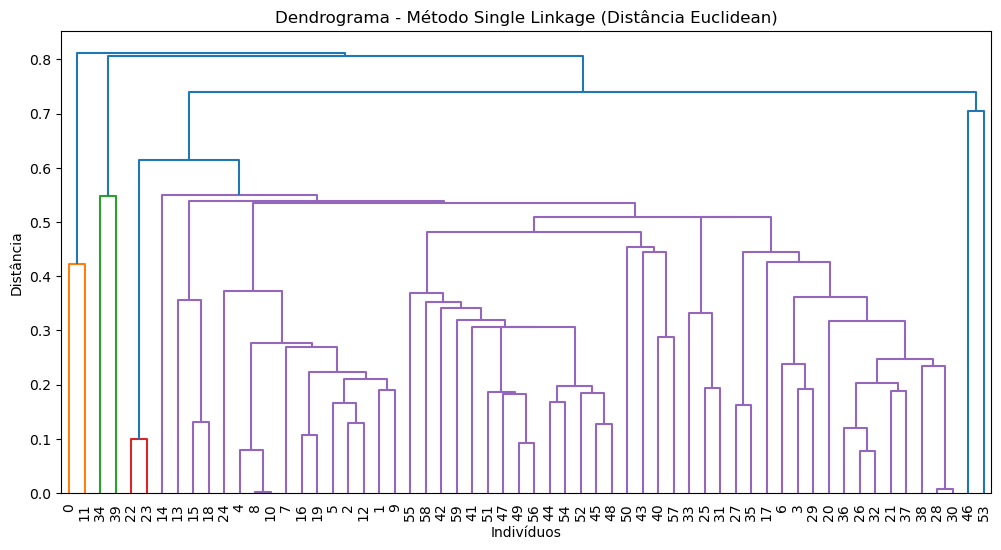

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     70.061969  1.799769
2                     90.154998  1.641408
3                     89.877726  1.660373
4                     83.958120  1.685462
5                     65.488544  1.713933
6                     87.908274  1.719352
7                     63.100329  1.774676
8                    110.492413  1.756586
9                    103.034027  1.773897

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


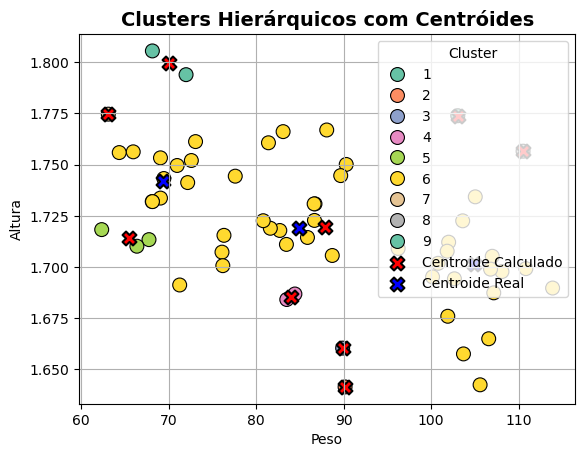


🔹 Clustering com SINGLE linkage e CITYBLOCK distance 🔹


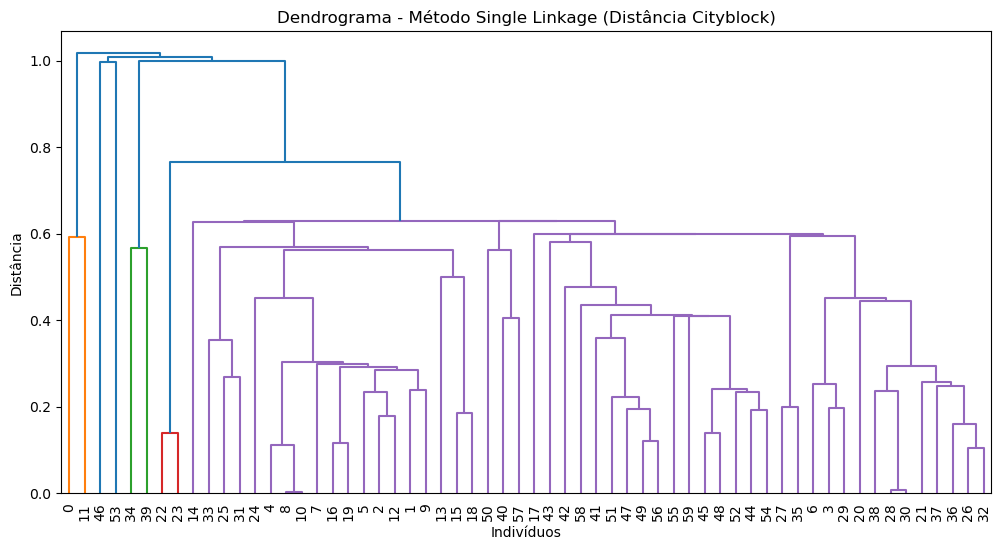

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     70.061969  1.799769
2                    110.492413  1.756586
3                    103.034027  1.773897
4                     90.016362  1.650890
5                     83.958120  1.685462
6                     71.191966  1.745531
7                     94.742901  1.705464

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


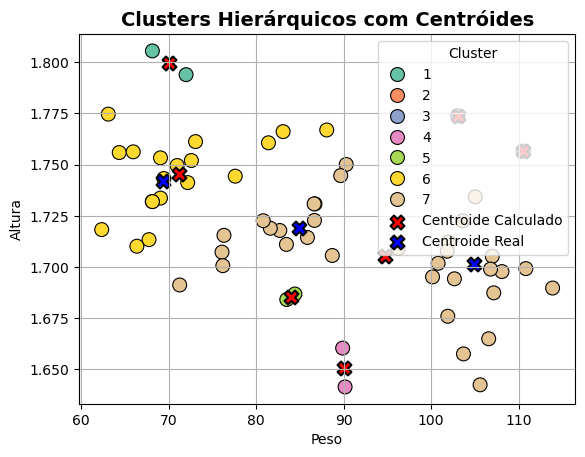


🔹 Clustering com COMPLETE linkage e EUCLIDEAN distance 🔹


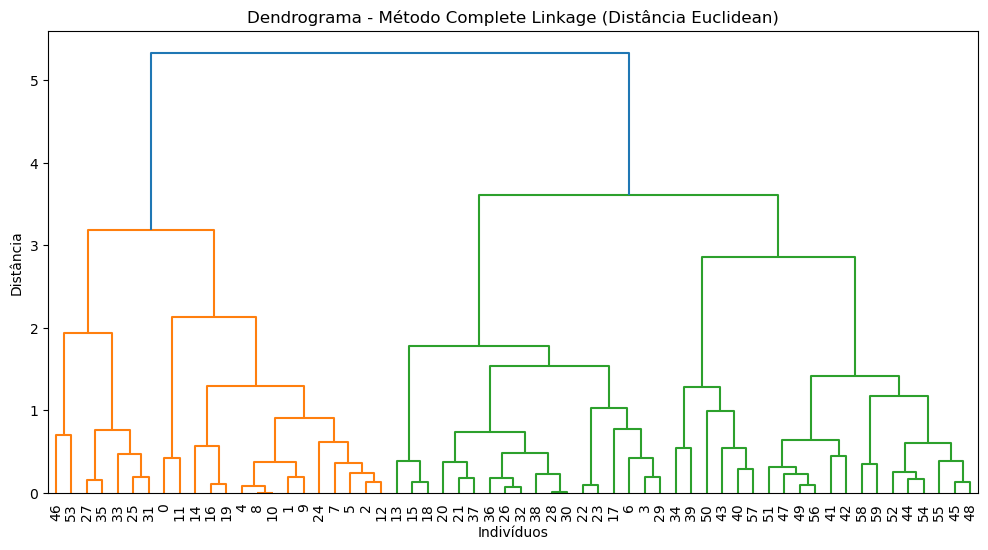

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     92.286029  1.759859
2                     69.584794  1.755270
3                     79.297038  1.711234
4                    103.182082  1.689891

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


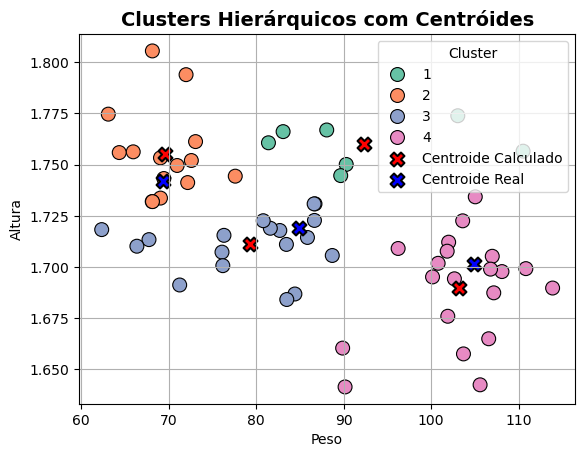


🔹 Clustering com COMPLETE linkage e CITYBLOCK distance 🔹


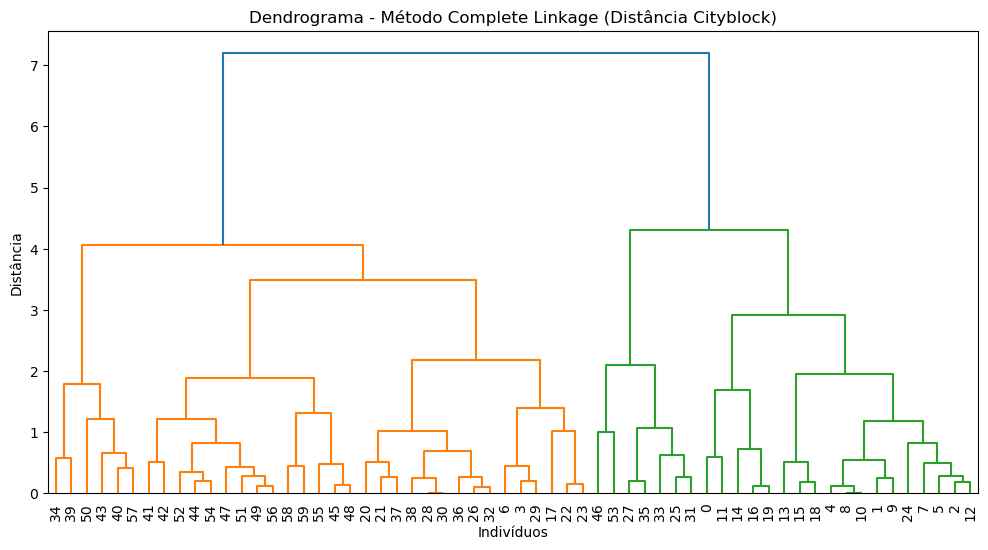

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     99.625645  1.657105
2                    104.706270  1.703943
3                     82.058737  1.710694
4                     92.286029  1.759859
5                     68.902086  1.748381

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


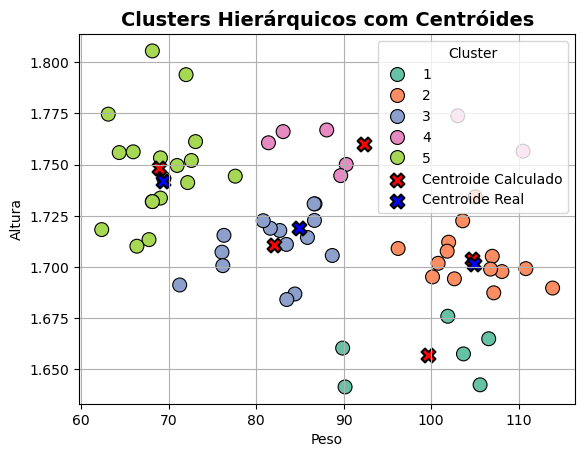


🔹 Clustering com AVERAGE linkage e EUCLIDEAN distance 🔹


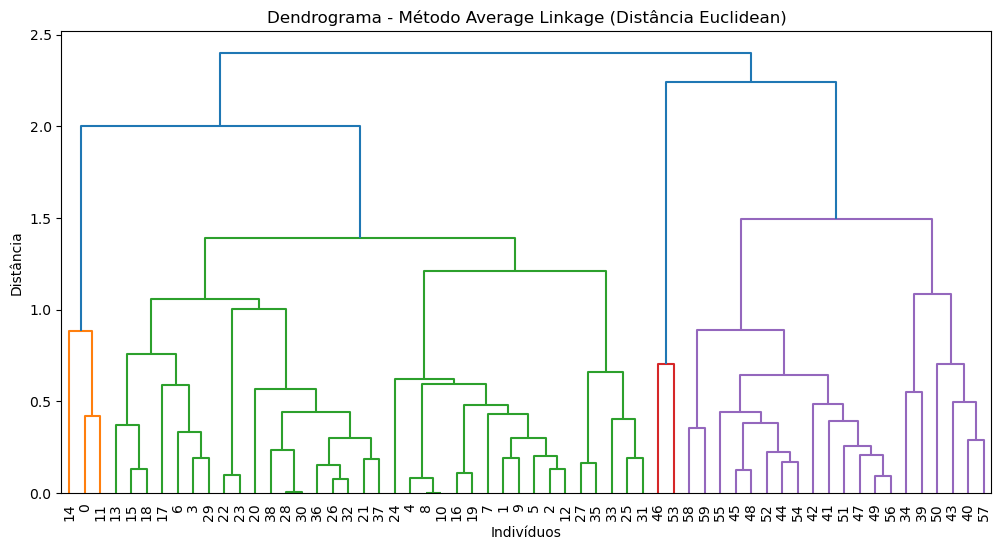

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                     76.410378  1.734731
2                    103.507640  1.696741

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


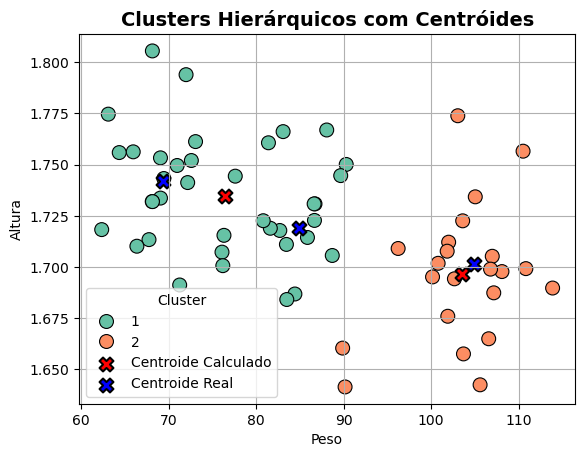


🔹 Clustering com AVERAGE linkage e CITYBLOCK distance 🔹


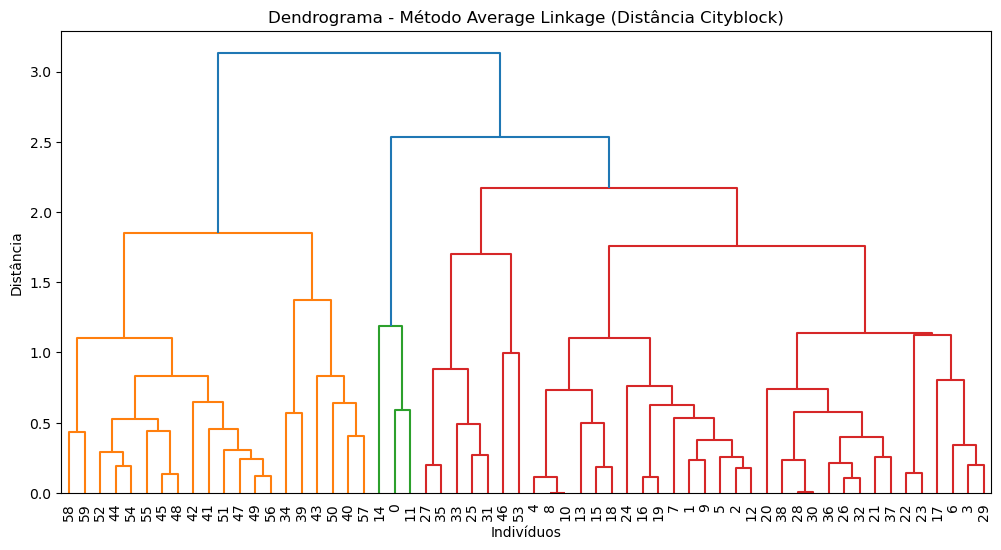

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                    104.706270  1.703943
2                     90.016362  1.650890
3                    104.430286  1.660212
4                     67.741422  1.791405
5                     86.495152  1.757706
6                    106.763220  1.765241
7                     69.134219  1.739776
8                     82.058737  1.710694

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


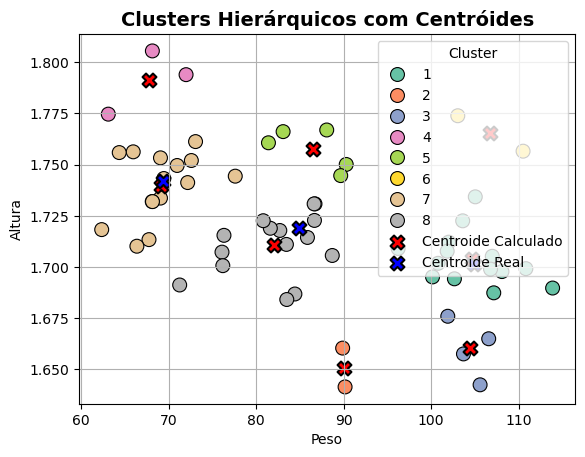


🔹 Clustering com CENTROID linkage e EUCLIDEAN distance 🔹


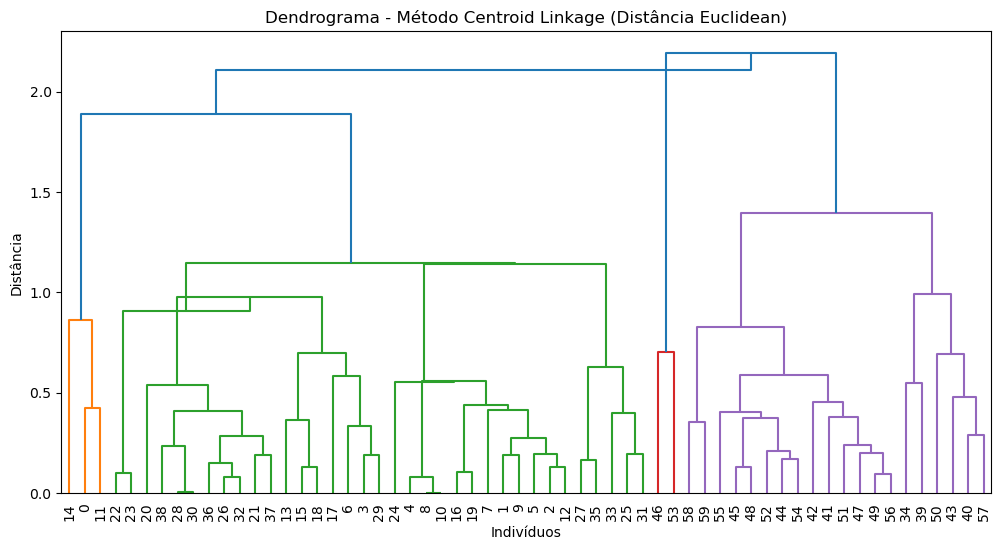

Centroides dos clusters hierárquicos:
                           Peso    Altura
Cluster_Hierarquico                     
1                    86.346041  1.720802

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


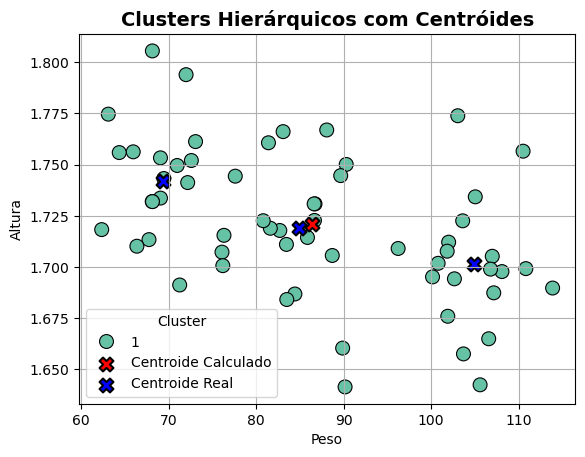


🔹 Clustering com WARD linkage e EUCLIDEAN distance 🔹


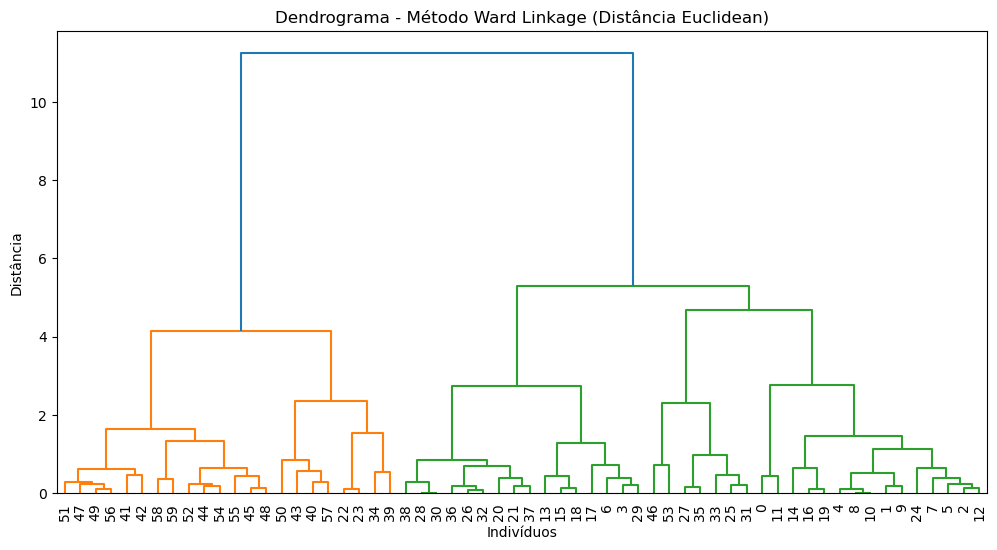

Centroides dos clusters hierárquicos:
                            Peso    Altura
Cluster_Hierarquico                      
1                    104.706270  1.703943
2                    104.430286  1.660212
3                     86.987241  1.668176
4                     84.790450  1.719434
5                     70.902342  1.708055
6                    106.763220  1.765241
7                     86.495152  1.757706
8                     70.061969  1.799769
9                     69.511383  1.748424

Centroides dos grupos reais:
                   Peso    Altura
Grupo_Real                      
0            69.314806  1.742021
1            84.866548  1.719058
2           104.856768  1.701327


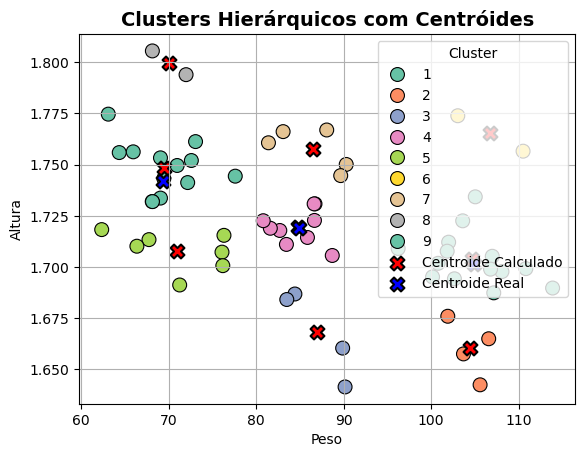

In [71]:
if __name__ == "__main__":

    listingMethods = ["single", "complete", "average", "centroid", "ward"]
    listingDistances = ["euclidean", "cityblock"]


    X_scaled = StandardScaler().fit_transform(dados_normais[["Altura","Peso"]])
    labels_reais = [0]*20 + [1]*20 + [2]*20

    resultados_hierarquico = []
    i = 0

    for method in listingMethods:
        for distance in listingDistances:

            # ⚠️ Ward e Centroid apenas aceitam Euclidiana
            if method in ["ward", "centroid"] and distance != "euclidean":
                continue

            print(f"\n🔹 Clustering com {method.upper()} linkage e {distance.upper()} distance 🔹")

            Z = linkageAndDistance(X_scaled, method, distance)


            # Avaliar número ótimo via Silhouette
            sil_scores = []
            ari_scores = []
            k_values = range(2, 10)
            for k in k_values:
                clusters = fcluster(Z, t=k, criterion='maxclust')
                if len(set(clusters)) < 2:
                    sil_scores.append(-1)  # Silhouette não definido para 1 cluster
                else:
                    sil_scores.append(silhouette_score(X_scaled, clusters))
                    ari_scores.append(adjusted_rand_score(labels_reais, clusters))

            k_otimo = k_values[np.argmax(ari_scores)]
            sil_max = max(sil_scores)
            clusters_final = fcluster(Z, t=k_otimo, criterion='maxclust')

            # ARI
            ari = adjusted_rand_score(labels_reais, clusters_final)

            resultados_hierarquico.append({
                "Método": method,
                "Distância": distance,
                "Melhor k": k_otimo,
                "Silhouette": round(sil_max, 3),
                "ARI": round(ari, 3)
            })

            # Atribuir clusters e visualizar
            dados_normais["Cluster_Hierarquico"] = clusters_final
            dados_normais["Grupo_Real"] = labels_reais
            visualizeClusters(dados_normais, "Peso", "Altura")

            i += 1

## Problema

Em termos simples:

Pessoas de 80–90 kg podem pertencer tanto ao grupo “sobrepeso” como ao “obeso”;

A altura não é suficientemente discriminatória;

O rácio altura/peso é monotónico (diminui à medida que o peso sobe), e isso não cria fronteiras não lineares que os algoritmos consigam identificar facilmente.

## Solução

acrescentar variáveis fisiológicas e comportamentais pode criar dimensões que reforçam a separação entre grupos.

When using only height and weight, the clustering algorithm struggles to define clear boundaries between groups due to the natural overlap of normally distributed variables.
To enhance separability, additional physiological and behavioral variables were introduced, such as blood pressure, exercise frequency, and caloric intake.
This multivariate structure significantly improves the clustering performance, as it captures the multidimensional nature of human health indicators.

## Matriz Variancia e Covariancia

A matriz de variância–covariância é uma ferramenta essencial quando queremos compreender a estrutura interna dos dados antes (ou durante) o clustering.
Ela mostra como as variáveis variam entre si, e é um dos pilares da análise multivariada, ao lado da correlação, PCA e análise discriminante.

A matriz de variância–covariância (Σ) resume, para um conjunto de variáveis numéricas, duas coisas:

Variância (diagonal) → mede quanto cada variável varia por si só;

Covariância (fora da diagonal) → mede quanto duas variáveis variam em conjunto (positiva = crescem juntas; negativa = inversamente relacionadas).

Matematicamente:
For a dataset with *n* observations and *p* variables, the covariance between variables \( X_i \) and \( X_j \) is given by:

$$
\text{Cov}(X_i, X_j) = \frac{1}{n - 1} \sum_{k=1}^{n} (x_{ki} - \bar{X_i})(x_{kj} - \bar{X_j})
$$

Thus, the variance–covariance matrix is:

$$
\Sigma = \frac{1}{n - 1}(X - \bar{X})^T (X - \bar{X})
$$



In [4]:
np.random.seed(42)

n = 20
dados_completo = pd.DataFrame({
    # Peso e altura como antes
    "Peso": np.concatenate([
        np.random.normal(70, 4, n),
        np.random.normal(85, 5, n),
        np.random.normal(105, 6, n)
    ]),
    "Altura": np.concatenate([
        np.random.normal(1.75, 0.03, n),
        np.random.normal(1.72, 0.03, n),
        np.random.normal(1.70, 0.03, n)
    ]),
    # Novas variáveis
    "Pressao_Arterial": np.concatenate([
        np.random.normal(120, 10, n),
        np.random.normal(130, 12, n),
        np.random.normal(145, 15, n)
    ]),
    "Freq_Exercicio": np.concatenate([
        np.random.randint(4,7,n),
        np.random.randint(2,4,n),
        np.random.randint(0,3,n)
    ]),
    "Ingestao_Calorica": np.concatenate([
        np.random.normal(2200, 200, n),
        np.random.normal(2600, 250, n),
        np.random.normal(3000, 300, n)
    ]),
    "Grupo_Real": [0]*n + [1]*n + [2]*n
})

dados_completo["IMC"] = dados_completo["Peso"] / (dados_completo["Altura"]**2)
dados_completo.head()
dados_completo.describe()

Peso     Altura  Pressao_Arterial  Freq_Exercicio  \
count   60.000000  60.000000         60.000000       60.000000   
mean    85.941596   1.723223        133.186638        2.783333   
std     15.382831   0.034553         17.800459        1.637398   
min     62.346879   1.642437        104.493366        0.000000   
25%     72.124394   1.699143        119.709069        2.000000   
50%     83.706325   1.718482        132.896479        2.500000   
75%    101.262893   1.748111        142.389286        4.000000   
max    111.342733   1.796939        185.802537        6.000000   

       Ingestao_Calorica  Grupo_Real        IMC  
count          60.000000   60.000000  60.000000  
mean         2630.791200    1.000000  29.080159  
std           486.561839    0.823387   5.873584  
min          1823.937482    0.000000  19.308472  
25%          2229.520426    0.000000  23.799665  
50%          2567.109078    1.000000  28.159927  
75%          3030.267485    2.000000  34.558932  
max          3956.110001    2.000000  39.830167

## Covariance Matrix

In [5]:
X = dados_completo[["Peso", "Altura", "Pressao_Arterial", "Freq_Exercicio", "IMC", "Ingestao_Calorica"]]
cov_matrix = X.cov()
cov_matrix


Peso    Altura  Pressao_Arterial  Freq_Exercicio  \
Peso                236.631503 -0.272929        199.321811      -20.564140   
Altura               -0.272929  0.001194         -0.167693        0.029084   
Pressao_Arterial    199.321811 -0.167693        316.856323      -17.285632   
Freq_Exercicio      -20.564140  0.029084        -17.285632        2.681073   
IMC                  89.030533 -0.131421         72.918360       -7.897722   
Ingestao_Calorica  6242.637618 -7.935286       4941.903153     -599.249306   

                           IMC  Ingestao_Calorica  
Peso                 89.030533        6242.637618  
Altura               -0.131421          -7.935286  
Pressao_Arterial     72.918360        4941.903153  
Freq_Exercicio       -7.897722        -599.249306  
IMC                  34.498984        2369.749404  
Ingestao_Calorica  2369.749404      236742.423410

In [6]:
corr_matrix = X.corr()
corr_matrix

Peso    Altura  Pressao_Arterial  Freq_Exercicio  \
Peso               1.000000 -0.513481          0.727926       -0.816432   
Altura            -0.513481  1.000000         -0.272644        0.514059   
Pressao_Arterial   0.727926 -0.272644          1.000000       -0.593061   
Freq_Exercicio    -0.816432  0.514059         -0.593061        1.000000   
IMC                0.985370 -0.647552          0.697433       -0.821191   
Ingestao_Calorica  0.834053 -0.471994          0.570591       -0.752168   

                        IMC  Ingestao_Calorica  
Peso               0.985370           0.834053  
Altura            -0.647552          -0.471994  
Pressao_Arterial   0.697433           0.570591  
Freq_Exercicio    -0.821191          -0.752168  
IMC                1.000000           0.829204  
Ingestao_Calorica  0.829204           1.000000

## 🧠 Como interpretar

Covariância alta e positiva → variáveis sobem juntas (ex.: Peso e IMC)

Covariância negativa → uma aumenta enquanto a outra diminui (ex.: Peso e Freq_Exercicio uma pessoa com MUITO peso pratica POUCO exercicio)

Correlação próxima de 1 → relação linear direta forte

Correlação próxima de -1 → relação linear inversa forte

Correlação próxima de 0 → variáveis independentes

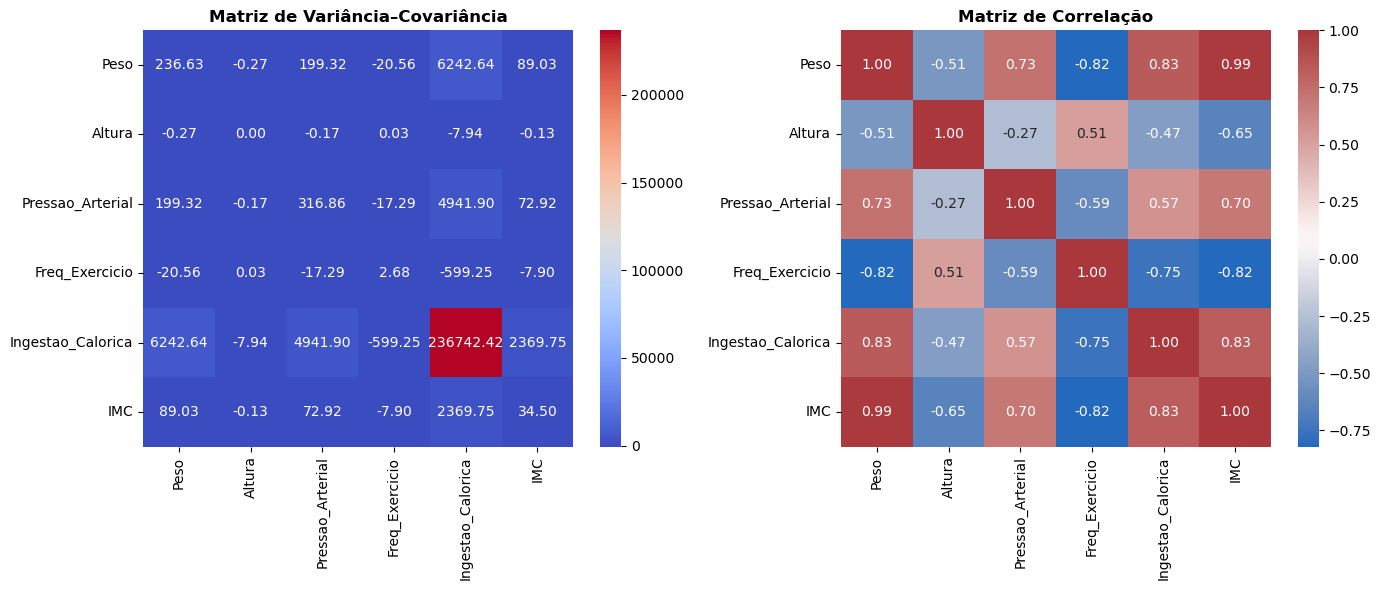


🔹 Top 5 Positive Correlations:
Peso               IMC                  0.985370
                   Ingestao_Calorica    0.834053
Ingestao_Calorica  IMC                  0.829204
Peso               Pressao_Arterial     0.727926
Pressao_Arterial   IMC                  0.697433
dtype: float64

🔸 Top 5 Negative Correlations:
Pressao_Arterial  Freq_Exercicio      -0.593061
Altura            IMC                 -0.647552
Freq_Exercicio    Ingestao_Calorica   -0.752168
Peso              Freq_Exercicio      -0.816432
Freq_Exercicio    IMC                 -0.821191
dtype: float64

📊 Summary:
Strong positive correlations found between: Peso & IMC, Peso & Ingestao_Calorica, Ingestao_Calorica & IMC, Peso & Pressao_Arterial.
Strong negative correlations found between: Peso & Altura, Pressao_Arterial & Freq_Exercicio, Altura & IMC, Freq_Exercicio & Ingestao_Calorica, Peso & Freq_Exercicio, Freq_Exercicio & IMC.


In [7]:
def analyze_cov_corr(df, vars_num):
    """
    Analisa e visualiza a matriz de variância-covariância e correlação.
    Também imprime as relações mais fortes (positivas e negativas).
    
    Parâmetros:
    df        -> DataFrame com os dados
    vars_num  -> lista das variáveis numéricas a analisar
    """
    # Calcular matrizes
    cov_matrix = df[vars_num].cov()
    corr_matrix = df[vars_num].corr()

    # ===============================
    # PLOT DOS HEATMAPS
    # ===============================
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
    axes[0].set_title("Matriz de Variância–Covariância", fontweight="bold")

    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", ax=axes[1])
    axes[1].set_title("Matriz de Correlação", fontweight="bold")

    plt.tight_layout()
    plt.show()

    # ===============================
    # RELAÇÕES MAIS FORTES
    # ===============================
    corr_unstack = corr_matrix.unstack().drop_duplicates()
    corr_unstack = corr_unstack[(corr_unstack != 1)]  # remover diagonal

    # Ordenar
    corr_sorted = corr_unstack.sort_values(ascending=False)

    # Top 5 correlações positivas e negativas
    print("\n🔹 Top 5 Positive Correlations:")
    print(corr_sorted.head(5))
    print("\n🔸 Top 5 Negative Correlations:")
    print(corr_sorted.tail(5))

    # Interpretação textual automática
    strong_pos = corr_sorted[corr_sorted > 0.7]
    strong_neg = corr_sorted[corr_sorted < -0.5]

    print("\n📊 Summary:")
    if len(strong_pos) > 0:
        print(f"Strong positive correlations found between: {', '.join([f'{a} & {b}' for a,b in strong_pos.index])}.")
    if len(strong_neg) > 0:
        print(f"Strong negative correlations found between: {', '.join([f'{a} & {b}' for a,b in strong_neg.index])}.")
    if len(strong_pos) == 0 and len(strong_neg) == 0:
        print("No strong correlations found above threshold ±0.7.")


# ===============================
# EXECUTAR A FUNÇÃO NO TEU DATASET
# ===============================
vars_numericas = ["Peso", "Altura", "Pressao_Arterial", "Freq_Exercicio", "Ingestao_Calorica", "IMC"]
analyze_cov_corr(dados_completo, vars_numericas)


### Plotting

Uso o pair plot, pois dá uma visão geral da relação entre as várias variáveis

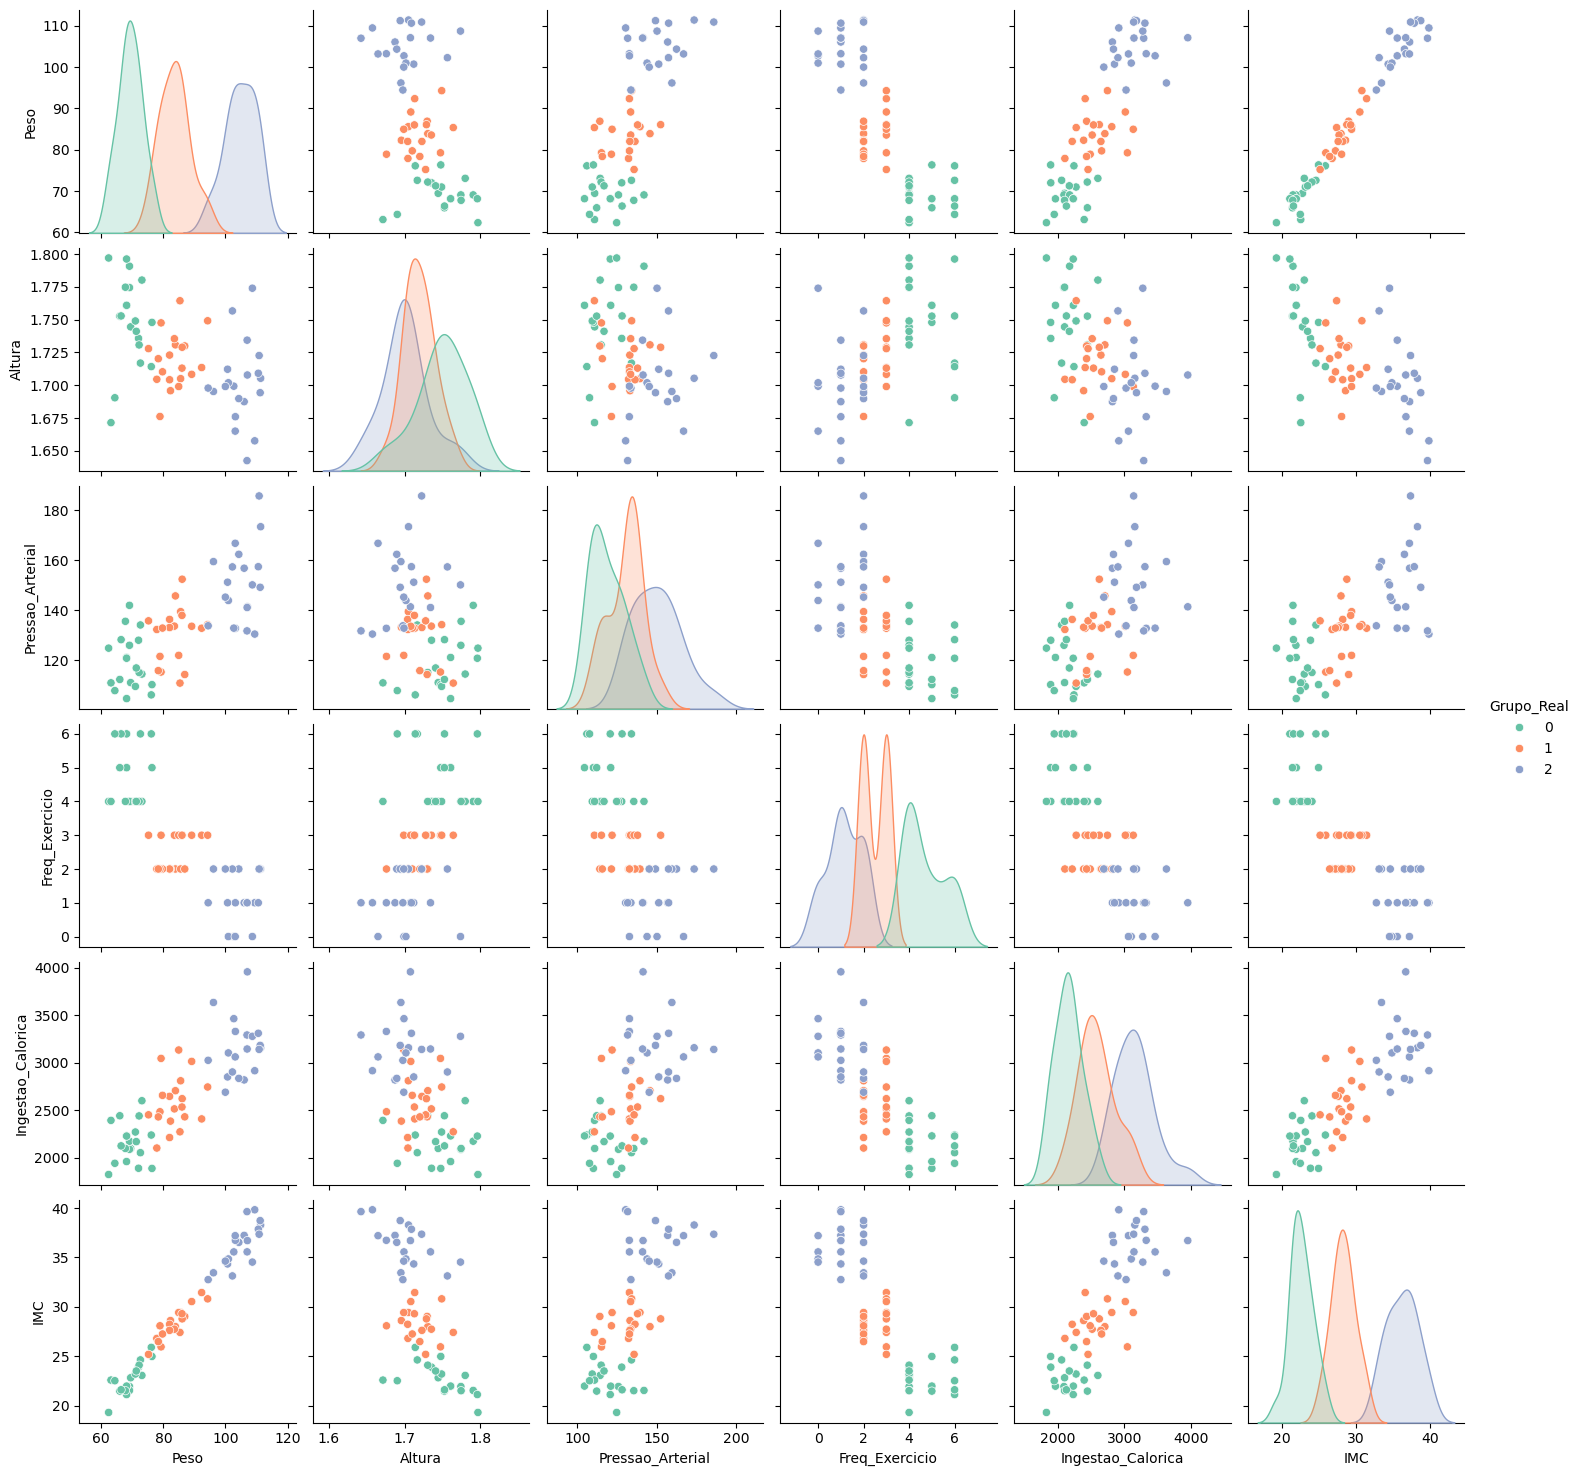

In [48]:
sns.pairplot(dados_completo, hue="Grupo_Real", palette="Set2")

The pairplot visually confirms that the variables Weight, BMI, and Caloric Intake are strongly and positively associated, forming well-separated clusters among the three groups.
Blood Pressure shows a moderate positive relationship with these indicators, while Exercise Frequency displays an inverse correlation pattern, consistent with physiological expectations.
Height exhibits minimal variance and little discriminative power.

These observations are quantitatively confirmed by the variance–covariance (and correlation) matrices, which show high positive covariances between Weight, BMI, and Caloric Intake, and strong negative covariances with Exercise Frequency.
This demonstrates that clustering in this dataset is driven primarily by variables related to body mass and lifestyle, whereas height contributes negligibly to the group separation.

In [20]:
dados_completo.columns

Index(['Peso', 'Altura', 'Pressao_Arterial', 'Freq_Exercicio',
       'Ingestao_Calorica', 'Grupo_Real', 'IMC', 'Cluster_Hierarquico'],
      dtype='object')

## To Do

- Cluster Analysis for (Freq_Ex; IMC); (Freq_Ex; Peso); (Peso; PressaoArt); (Peso; IMC)


🔹 Clustering com SINGLE linkage e EUCLIDEAN distance 🔹


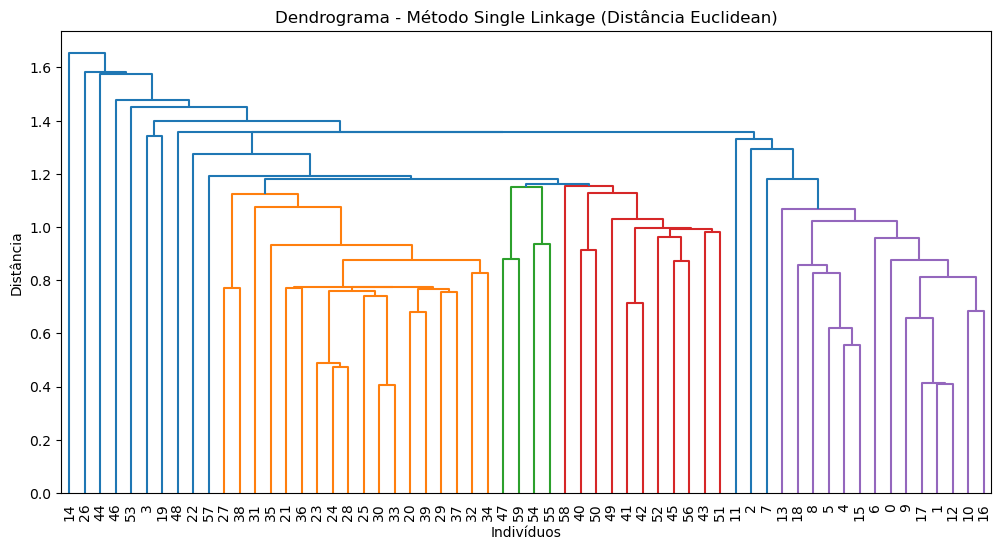

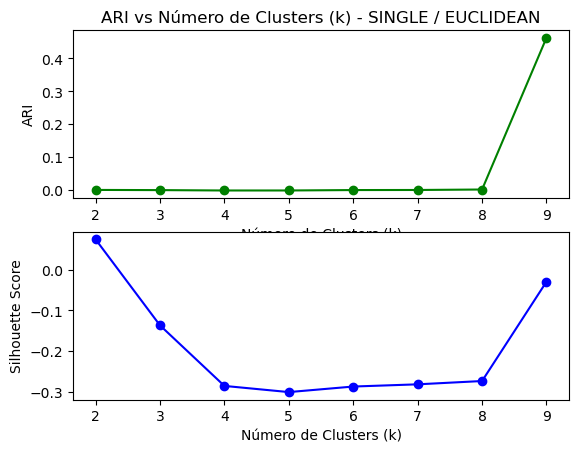

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                          6.000000  24.209355
2                          1.857143  32.211130
3                          4.588235  22.507706
4                          1.000000  36.711111
5                          0.000000  34.534484
6                          2.000000  33.133395
7                          2.000000  33.452741
8                          3.000000  25.951146
9                          4.000000  22.587432

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


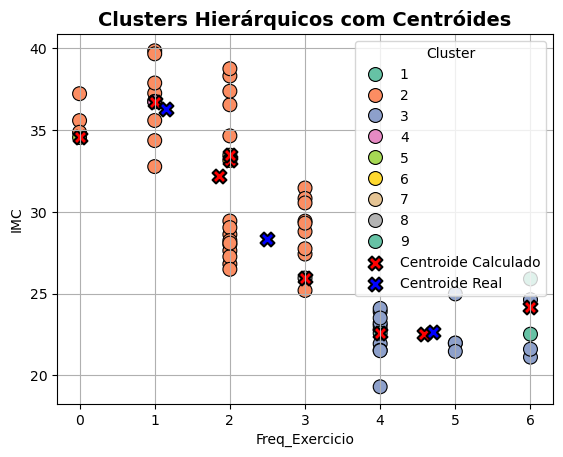

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                          6.000000   70.221452
2                          1.857143   93.624509
3                          4.588235   69.573699
4                          1.000000  107.061710
5                          0.000000  108.670058
6                          2.000000  102.236167
7                          2.000000   96.128868
8                          3.000000   79.245032
9                          4.000000   63.100329

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


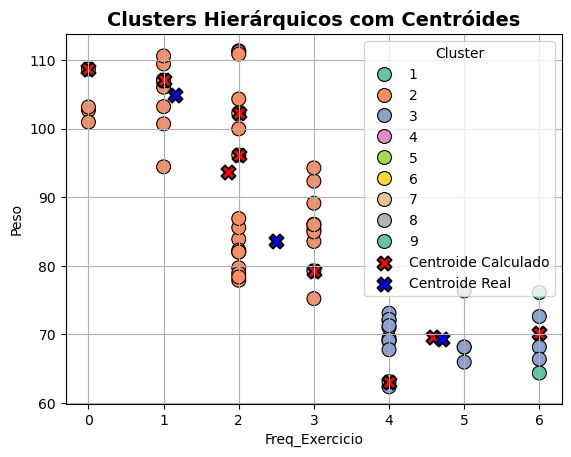

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                     70.221452        106.836423
2                     93.624509        139.727454
3                     69.573699        120.757893
4                    107.061710        141.319178
5                    108.670058        150.117280
6                    102.236167        157.330902
7                     96.128868        159.450642
8                     79.245032        115.156591
9                     63.100329        110.805758

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


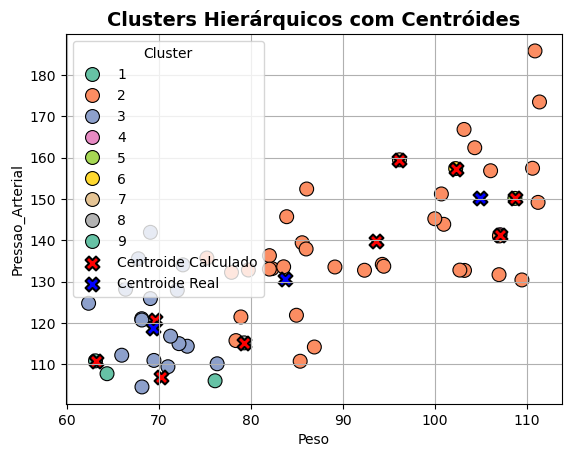

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                     70.221452  24.209355
2                     93.624509  32.211130
3                     69.573699  22.507706
4                    107.061710  36.711111
5                    108.670058  34.534484
6                    102.236167  33.133395
7                     96.128868  33.452741
8                     79.245032  25.951146
9                     63.100329  22.587432

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


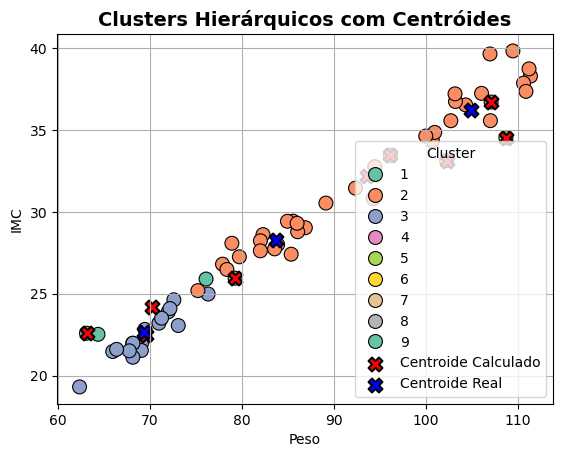


🔹 Clustering com SINGLE linkage e CITYBLOCK distance 🔹


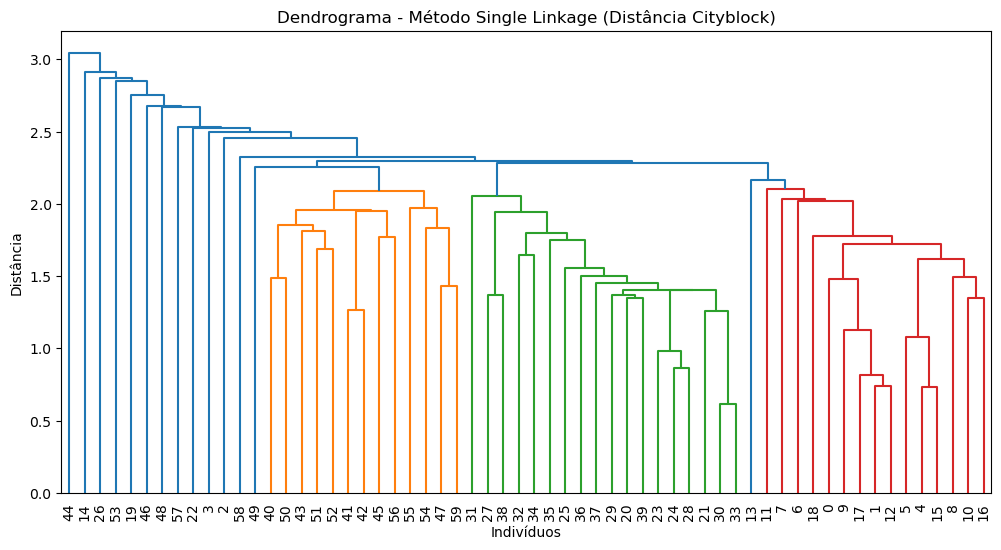

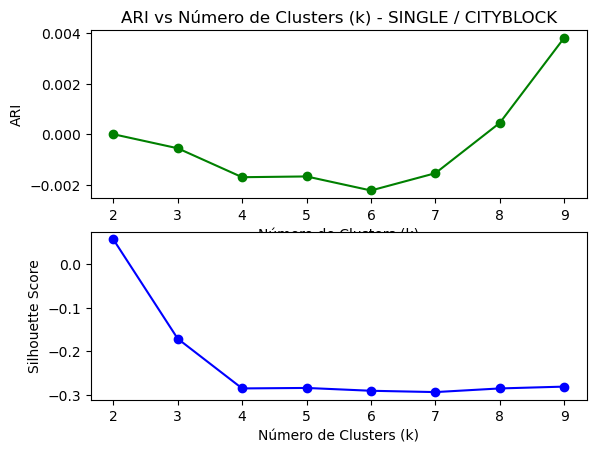

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                          2.865385  28.821327
2                          0.000000  37.209174
3                          1.000000  36.711111
4                          2.000000  33.133395
5                          6.000000  22.521058
6                          0.000000  34.534484
7                          3.000000  25.951146
8                          4.000000  22.587432
9                          2.000000  33.452741

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


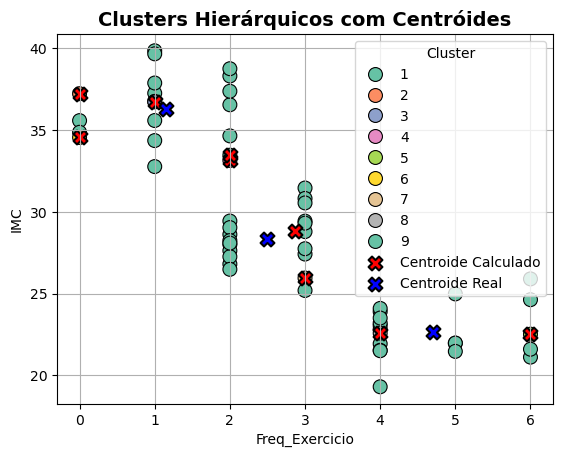

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                          2.865385   85.241502
2                          0.000000  103.144726
3                          1.000000  107.061710
4                          2.000000  102.236167
5                          6.000000   64.350785
6                          0.000000  108.670058
7                          3.000000   79.245032
8                          4.000000   63.100329
9                          2.000000   96.128868

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


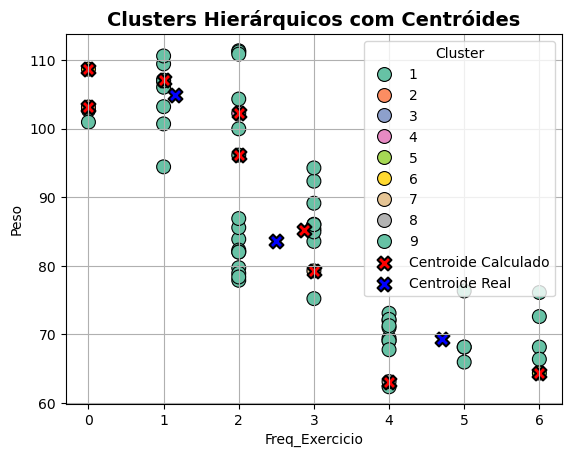

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                     85.241502        132.356222
2                    103.144726        166.803011
3                    107.061710        141.319178
4                    102.236167        157.330902
5                     64.350785        107.691357
6                    108.670058        150.117280
7                     79.245032        115.156591
8                     63.100329        110.805758
9                     96.128868        159.450642

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


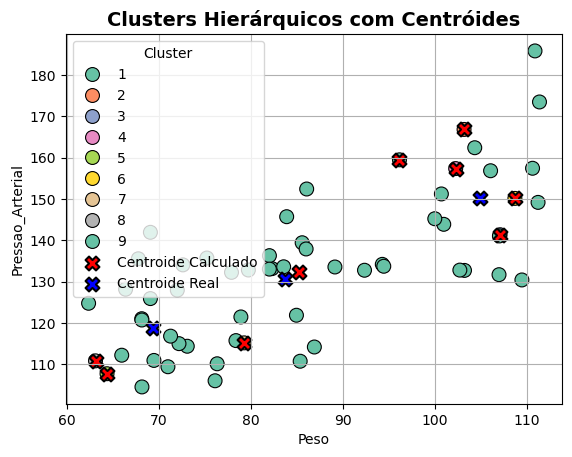

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                     85.241502  28.821327
2                    103.144726  37.209174
3                    107.061710  36.711111
4                    102.236167  33.133395
5                     64.350785  22.521058
6                    108.670058  34.534484
7                     79.245032  25.951146
8                     63.100329  22.587432
9                     96.128868  33.452741

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


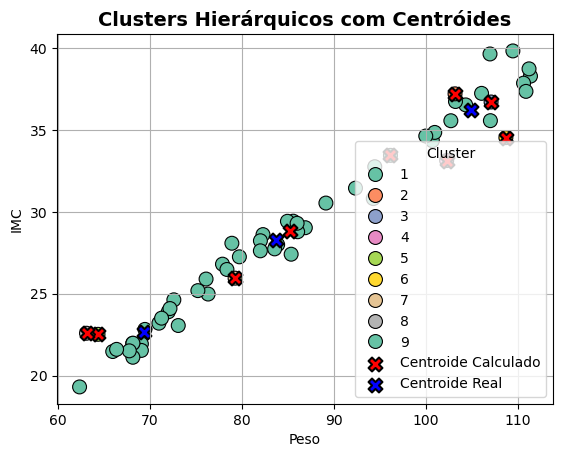


🔹 Clustering com COMPLETE linkage e EUCLIDEAN distance 🔹


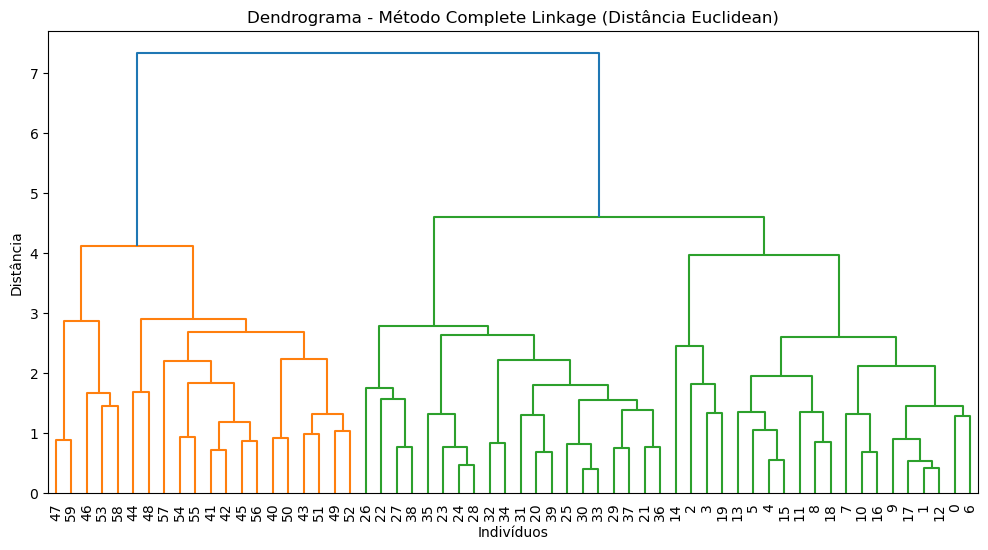

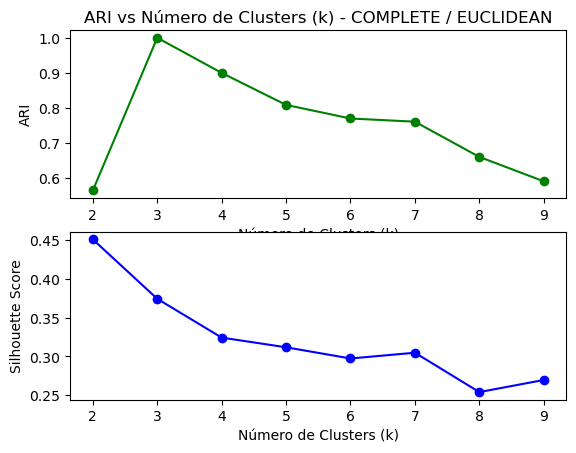

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                              1.15  36.249970
2                              2.50  28.308651
3                              4.70  22.681857

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


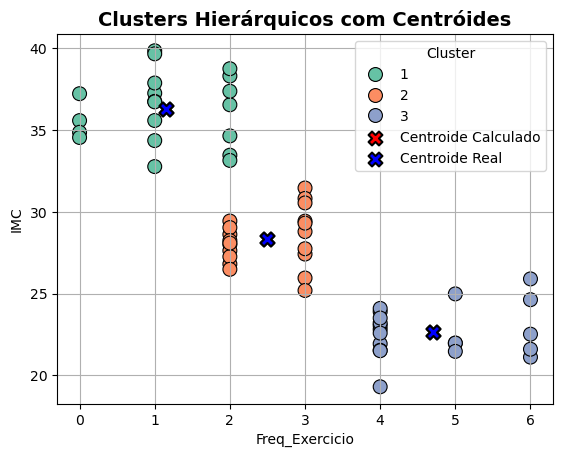

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                              1.15  104.839858
2                              2.50   83.670124
3                              4.70   69.314806

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


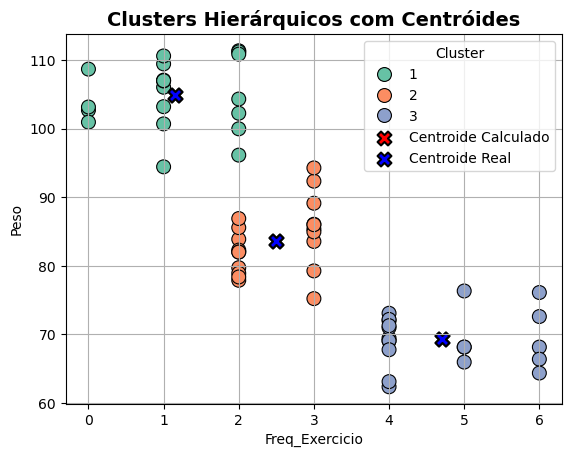

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                    104.839858        150.123138
2                     83.670124        130.568636
3                     69.314806        118.868139

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


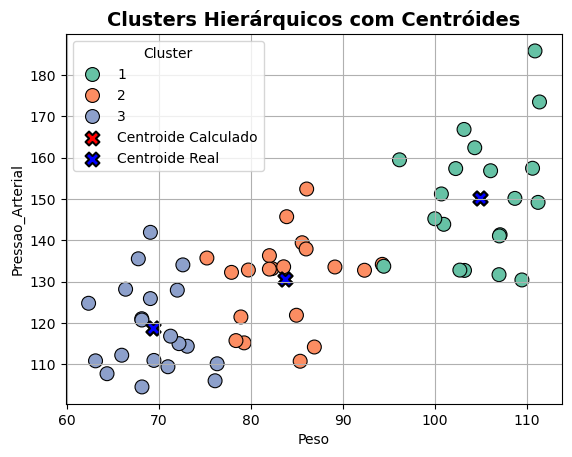

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                    104.839858  36.249970
2                     83.670124  28.308651
3                     69.314806  22.681857

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


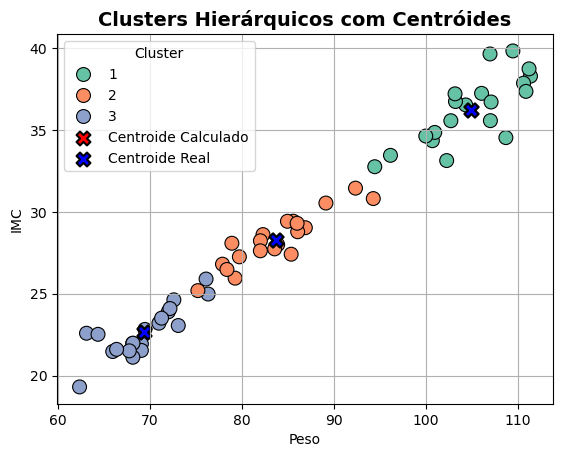


🔹 Clustering com COMPLETE linkage e CITYBLOCK distance 🔹


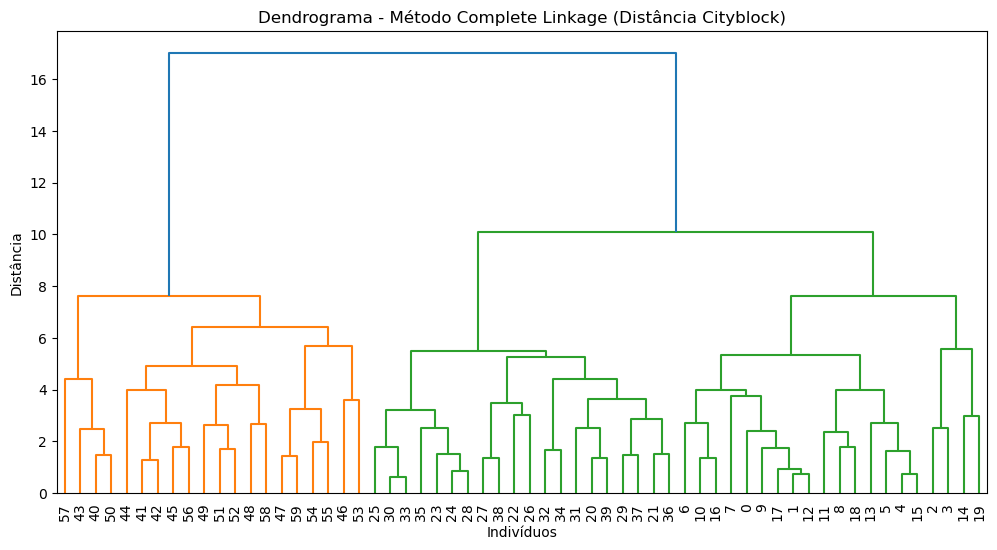

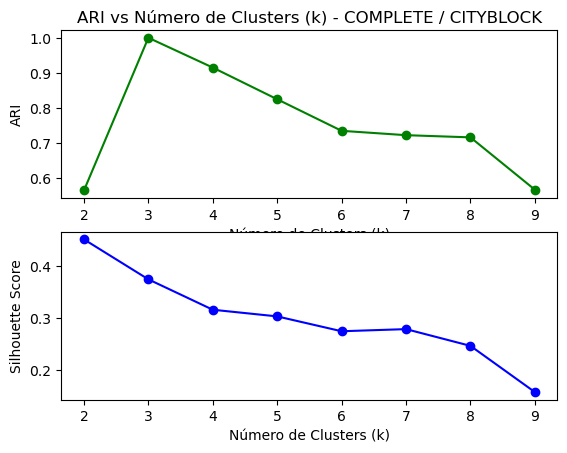

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                              1.15  36.249970
2                              2.50  28.308651
3                              4.70  22.681857

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


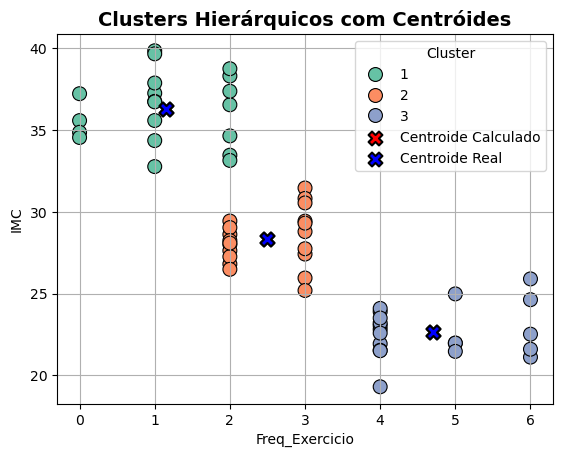

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                              1.15  104.839858
2                              2.50   83.670124
3                              4.70   69.314806

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


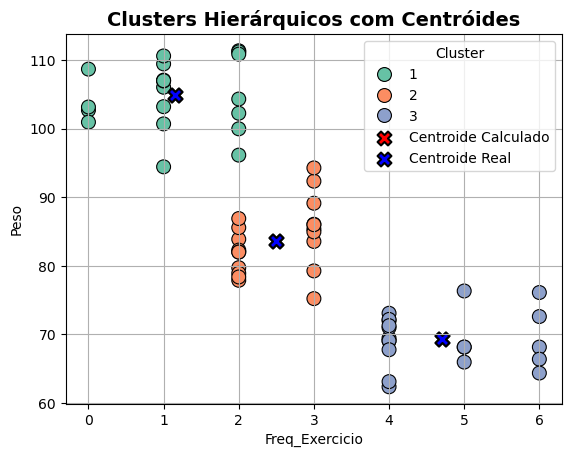

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                    104.839858        150.123138
2                     83.670124        130.568636
3                     69.314806        118.868139

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


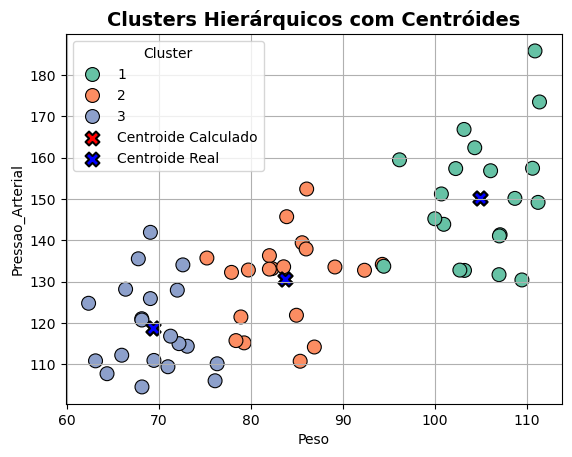

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                    104.839858  36.249970
2                     83.670124  28.308651
3                     69.314806  22.681857

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


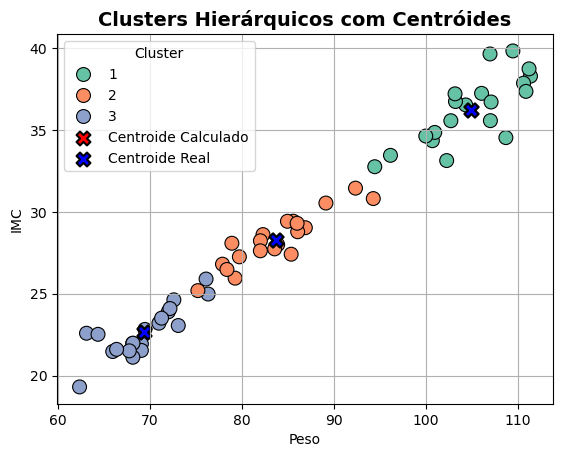


🔹 Clustering com AVERAGE linkage e EUCLIDEAN distance 🔹


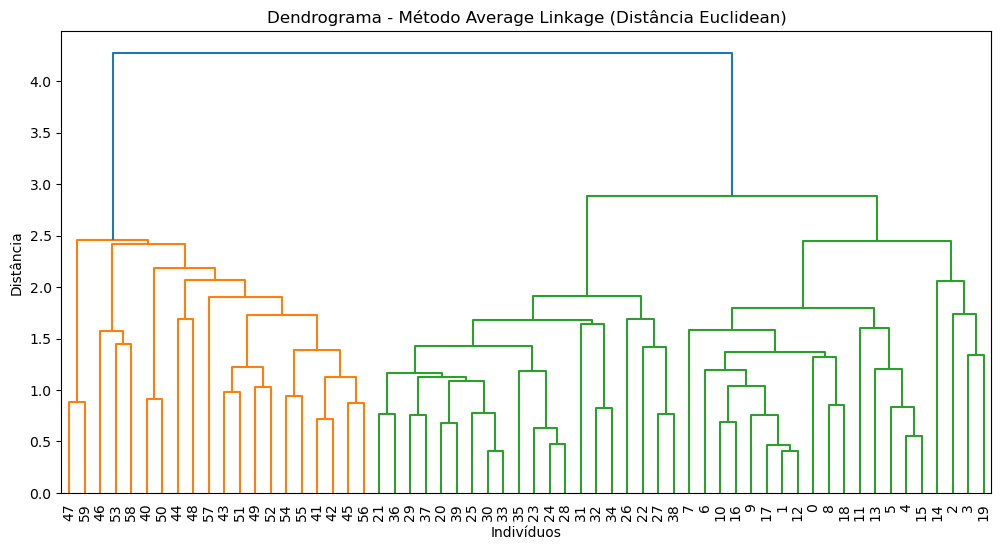

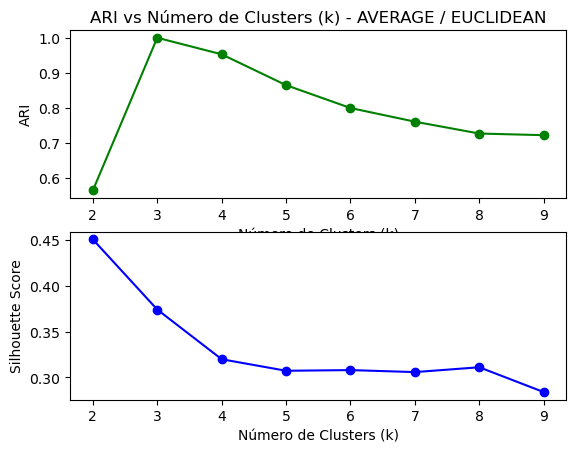

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                              1.15  36.249970
2                              2.50  28.308651
3                              4.70  22.681857

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


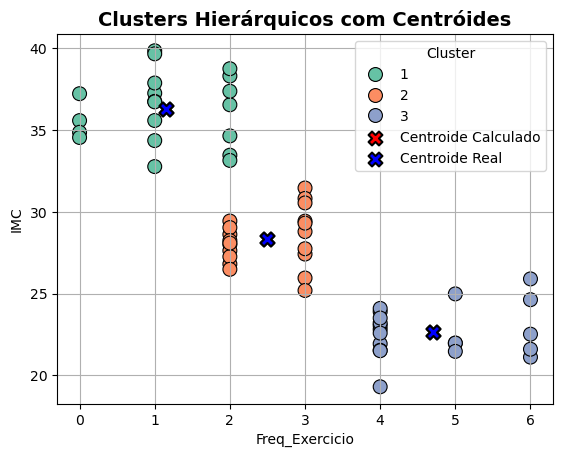

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                              1.15  104.839858
2                              2.50   83.670124
3                              4.70   69.314806

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


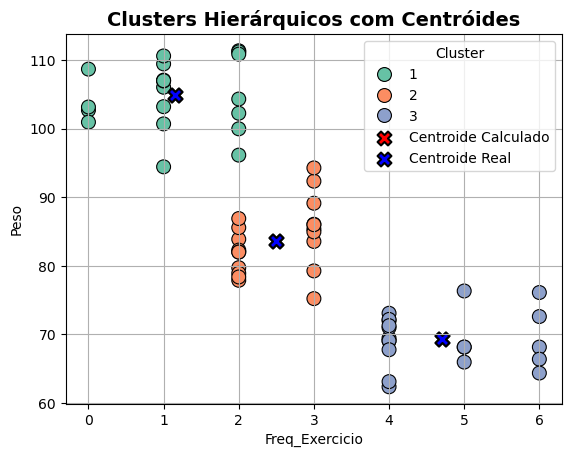

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                    104.839858        150.123138
2                     83.670124        130.568636
3                     69.314806        118.868139

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


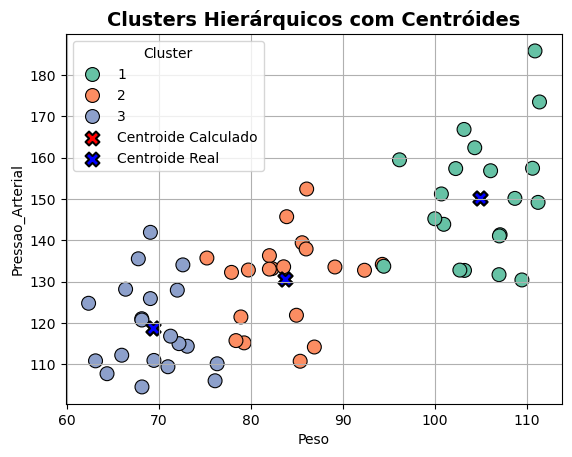

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                    104.839858  36.249970
2                     83.670124  28.308651
3                     69.314806  22.681857

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


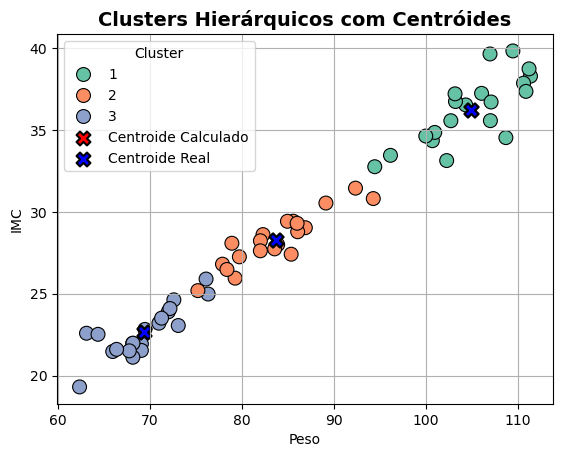


🔹 Clustering com AVERAGE linkage e CITYBLOCK distance 🔹


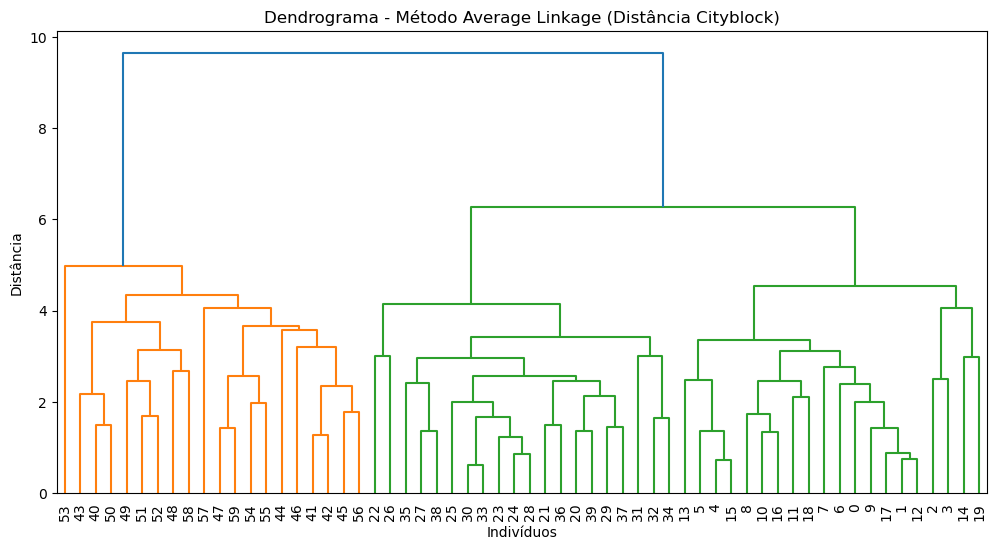

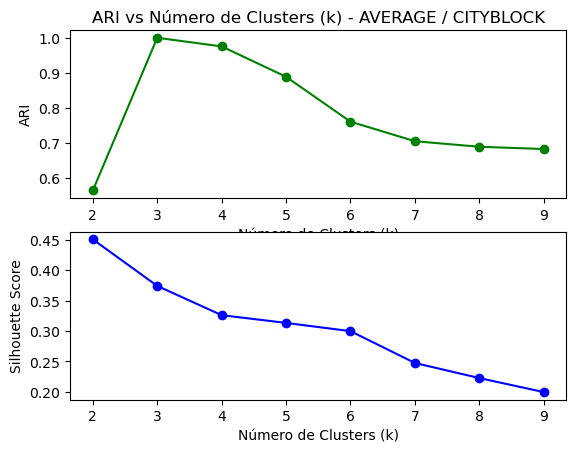

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                              1.15  36.249970
2                              2.50  28.308651
3                              4.70  22.681857

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


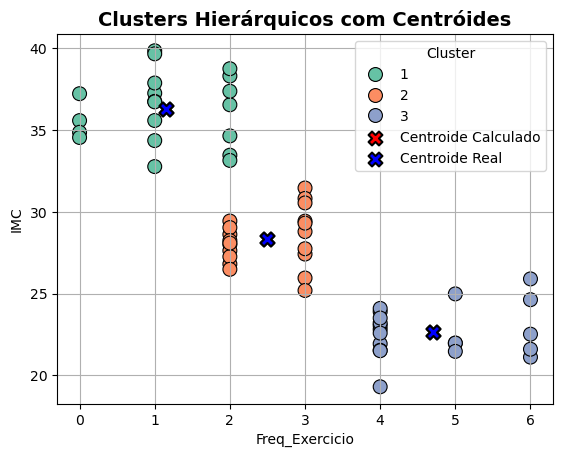

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                              1.15  104.839858
2                              2.50   83.670124
3                              4.70   69.314806

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


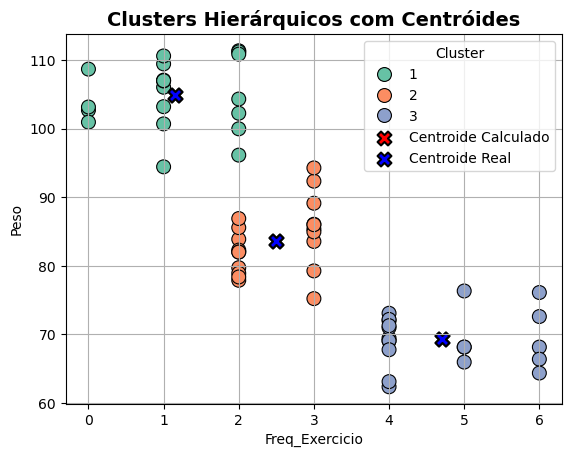

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                    104.839858        150.123138
2                     83.670124        130.568636
3                     69.314806        118.868139

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


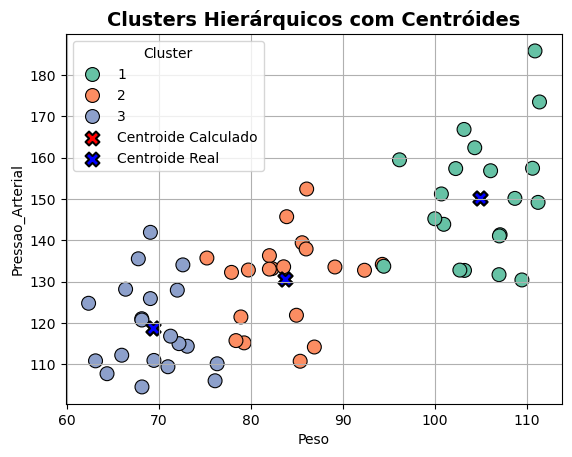

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                    104.839858  36.249970
2                     83.670124  28.308651
3                     69.314806  22.681857

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


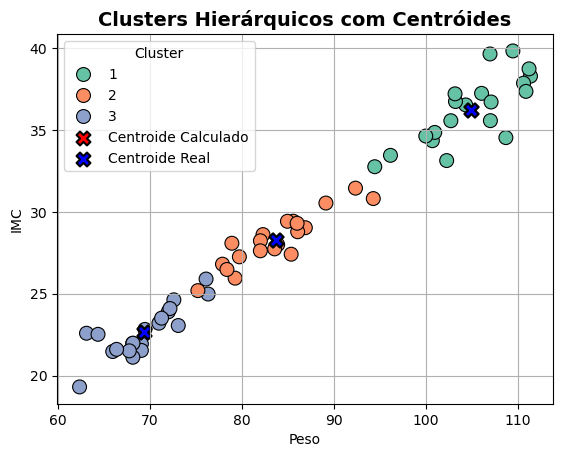


🔹 Clustering com CENTROID linkage e EUCLIDEAN distance 🔹


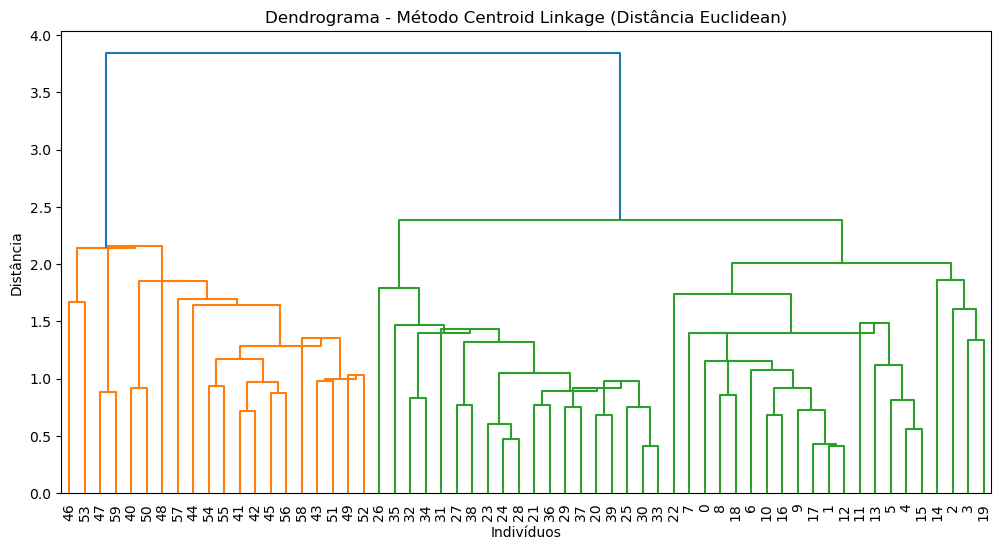

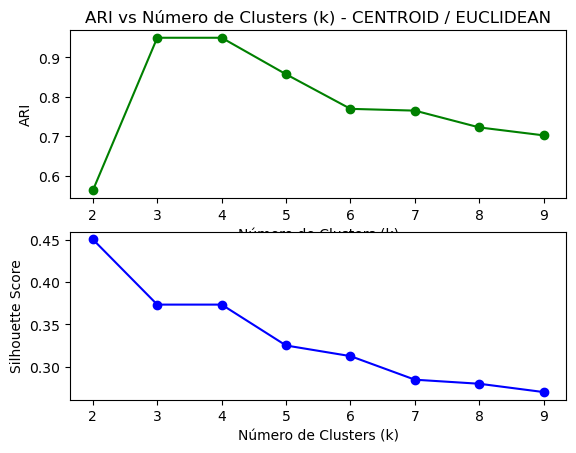

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                          1.150000  36.249970
2                          2.473684  28.355720
3                          4.619048  22.907213

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


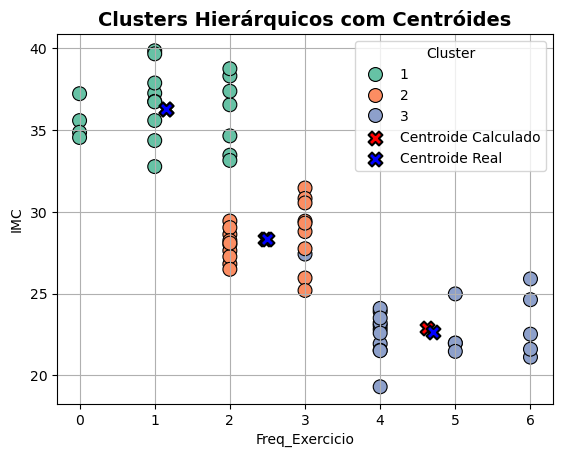

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                          1.150000  104.839858
2                          2.473684   83.582360
3                          4.619048   70.077798

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


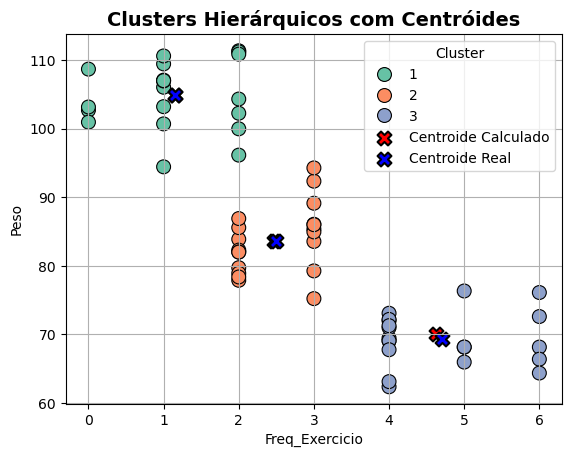

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                    104.839858        150.123138
2                     83.582360        131.613817
3                     70.077798        118.479666

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


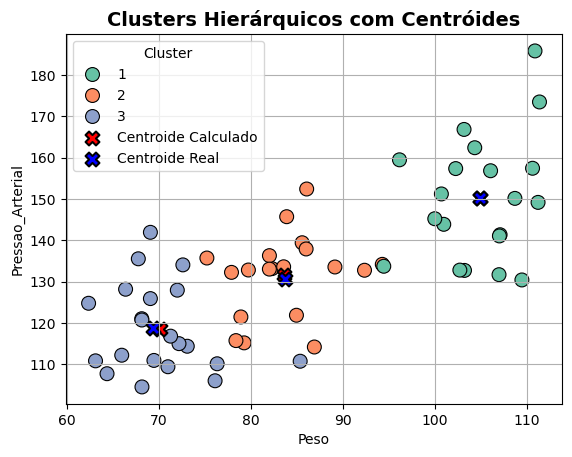

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                    104.839858  36.249970
2                     83.582360  28.355720
3                     70.077798  22.907213

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


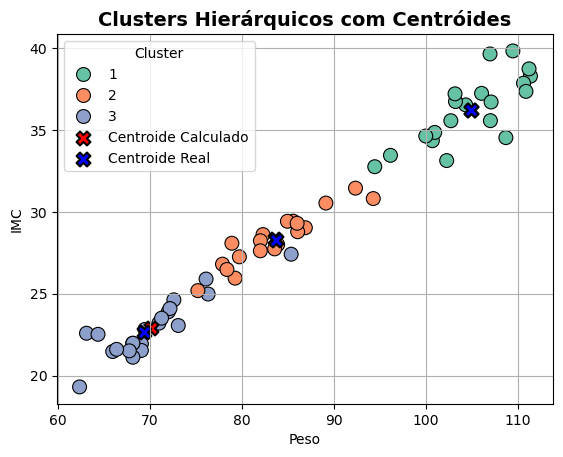


🔹 Clustering com WARD linkage e EUCLIDEAN distance 🔹


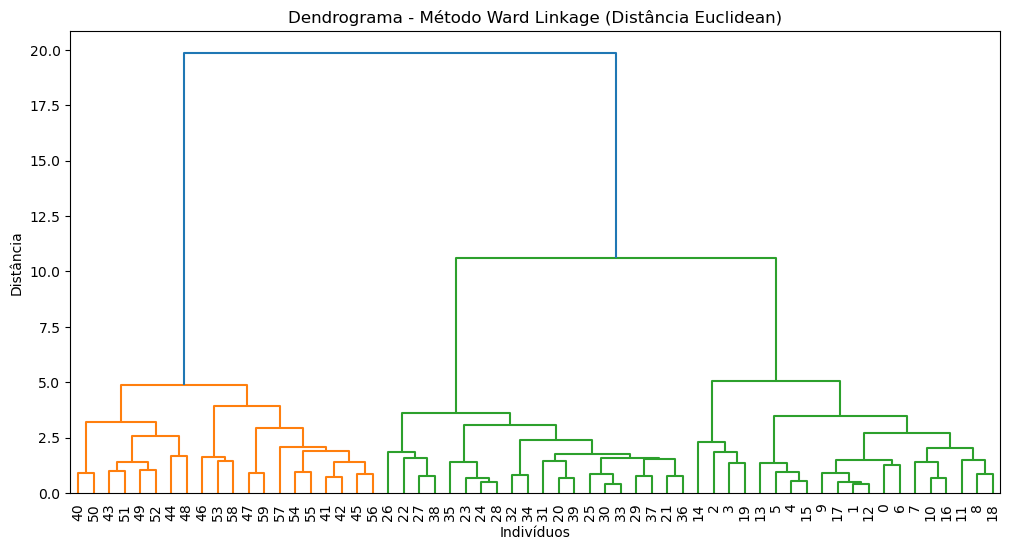

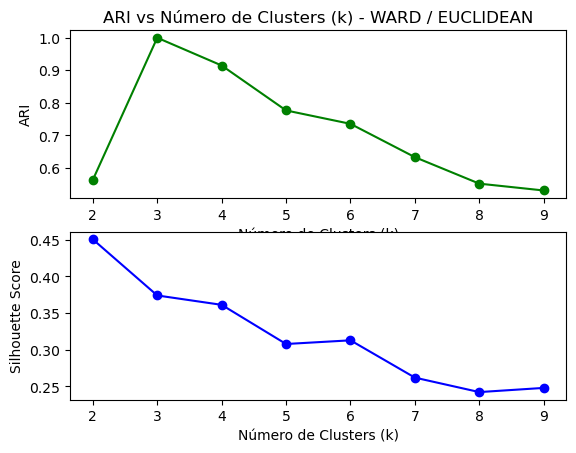

('Freq_Exercicio', 'IMC')
Visualizando clusters para Freq_Exercicio vs IMC
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        IMC
Cluster_Hierarquico                           
1                              1.15  36.249970
2                              2.50  28.308651
3                              4.70  22.681857

Centroides dos grupos reais:
             Freq_Exercicio        IMC
Grupo_Real                           
0                     4.70  22.681857
1                     2.50  28.308651
2                     1.15  36.249970


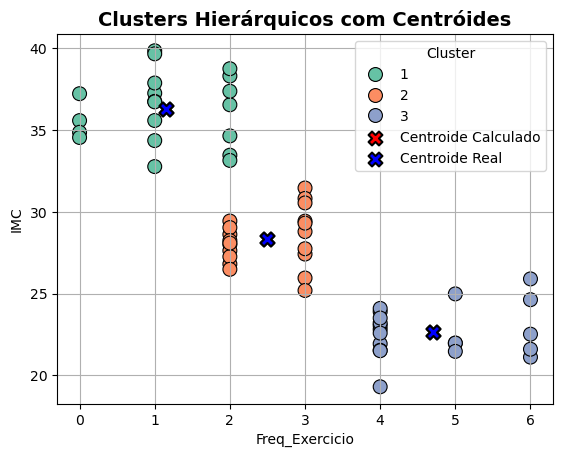

('Freq_Exercicio', 'Peso')
Visualizando clusters para Freq_Exercicio vs Peso
Centroides dos clusters hierárquicos:
                      Freq_Exercicio        Peso
Cluster_Hierarquico                            
1                              1.15  104.839858
2                              2.50   83.670124
3                              4.70   69.314806

Centroides dos grupos reais:
             Freq_Exercicio        Peso
Grupo_Real                            
0                     4.70   69.314806
1                     2.50   83.670124
2                     1.15  104.839858


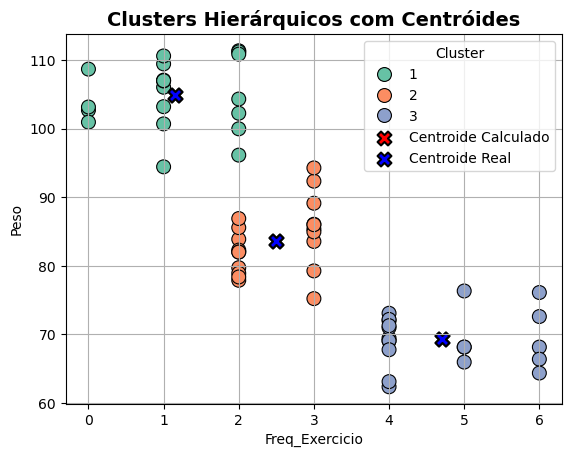

('Peso', 'Pressao_Arterial')
Visualizando clusters para Peso vs Pressao_Arterial
Centroides dos clusters hierárquicos:
                            Peso  Pressao_Arterial
Cluster_Hierarquico                              
1                    104.839858        150.123138
2                     83.670124        130.568636
3                     69.314806        118.868139

Centroides dos grupos reais:
                   Peso  Pressao_Arterial
Grupo_Real                              
0            69.314806        118.868139
1            83.670124        130.568636
2           104.839858        150.123138


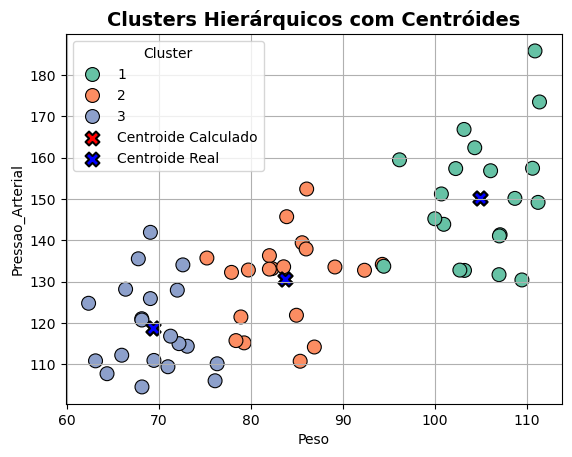

('Peso', 'IMC')
Visualizando clusters para Peso vs IMC
Centroides dos clusters hierárquicos:
                            Peso        IMC
Cluster_Hierarquico                       
1                    104.839858  36.249970
2                     83.670124  28.308651
3                     69.314806  22.681857

Centroides dos grupos reais:
                   Peso        IMC
Grupo_Real                       
0            69.314806  22.681857
1            83.670124  28.308651
2           104.839858  36.249970


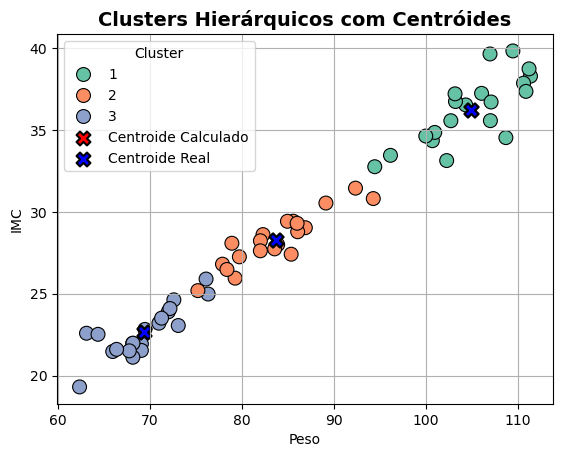

In [62]:
if __name__ == "__main__":

    listingMethods = ["single", "complete", "average", "centroid", "ward"]
    listingDistances = ["euclidean", "cityblock"]


    X_scaled = StandardScaler().fit_transform(dados_completo[["Altura","Peso", "Pressao_Arterial", "Freq_Exercicio", "IMC", "Ingestao_Calorica"]])
    labels_reais = [0]*20 + [1]*20 + [2]*20

    resultados_hierarquico = []
    i = 0
    groups = (('Freq_Exercicio', 'IMC'), ('Freq_Exercicio', 'Peso'), ('Peso','Pressao_Arterial'), ('Peso', 'IMC'))

    for method in listingMethods:
        for distance in listingDistances:

            # ⚠️ Ward e Centroid apenas aceitam Euclidiana
            if method in ["ward", "centroid"] and distance != "euclidean":
                continue

            print(f"\n🔹 Clustering com {method.upper()} linkage e {distance.upper()} distance 🔹")

            Z = linkageAndDistance(X_scaled, method, distance)


            # Avaliar número ótimo via Silhouette
            sil_scores = []
            ari_scores = []
            k_values = range(2, 10)
            for k in k_values:
                clusters = fcluster(Z, t=k, criterion='maxclust')
                if len(set(clusters)) < 2:
                    sil_scores.append(-1)  # Silhouette não definido para 1 cluster
                else:
                    sil_scores.append(silhouette_score(X_scaled, clusters))
                    ari_scores.append(adjusted_rand_score(labels_reais, clusters))
            plt.subplot(2,1,1)
            plt.plot(k_values, ari_scores, 'go-')
            plt.title(f"ARI vs Número de Clusters (k) - {method.upper()} / {distance.upper()}")
            plt.xlabel("Número de Clusters (k)")
            plt.ylabel("ARI")
            plt.subplot(2,1,2)
            plt.plot(k_values, sil_scores, 'bo-')
            plt.xlabel("Número de Clusters (k)")
            plt.ylabel("Silhouette Score")
            plt.show()

            k_otimo = k_values[np.argmax(ari_scores)]
            #sil_max = max(sil_scores)
            clusters_final = fcluster(Z, t=k_otimo, criterion='maxclust')

            # ARI
            ari = adjusted_rand_score(labels_reais, clusters_final)

            resultados_hierarquico.append({
                "Método": method,
                "Distância": distance,
                "Melhor k": k_otimo,
                "Silhouette": round(sil_max, 3),
                "ARI": round(ari, 3)
            })

            # Atribuir clusters e visualizar
            dados_completo["Cluster_Hierarquico"] = clusters_final
            dados_completo["Grupo_Real"] = labels_reais

            for group in groups:
                print(group)
                var1, var2 = group
                print(f"Visualizando clusters para {var1} vs {var2}")
                visualizeClusters(dados_completo, var1, var2)

            i += 1

“Although the Silhouette Score suggested an optimal number of clusters slightly different from the real group count (k=3), this discrepancy can be explained by the intrinsic overlap and variance differences among the simulated groups.
Since the data generation process included correlated variables (e.g., Weight and BMI), the geometric compactness favored by the Silhouette criterion does not necessarily align with the true semantic group structure.
Therefore, the Adjusted Rand Index (ARI) was used as a complementary external validation metric, confirming that three clusters best represent the underlying population.

In [34]:
resultados_hierarquico

[{'Método': 'single',
  'Distância': 'euclidean',
  'Melhor k': 9,
  'Silhouette': 0.451,
  'ARI': 0.463},
 {'Método': 'single',
  'Distância': 'cityblock',
  'Melhor k': 9,
  'Silhouette': 0.451,
  'ARI': 0.004},
 {'Método': 'complete',
  'Distância': 'euclidean',
  'Melhor k': 3,
  'Silhouette': 0.451,
  'ARI': 1.0},
 {'Método': 'complete',
  'Distância': 'cityblock',
  'Melhor k': 3,
  'Silhouette': 0.451,
  'ARI': 1.0},
 {'Método': 'average',
  'Distância': 'euclidean',
  'Melhor k': 3,
  'Silhouette': 0.451,
  'ARI': 1.0},
 {'Método': 'average',
  'Distância': 'cityblock',
  'Melhor k': 3,
  'Silhouette': 0.451,
  'ARI': 1.0},
 {'Método': 'centroid',
  'Distância': 'euclidean',
  'Melhor k': 3,
  'Silhouette': 0.451,
  'ARI': 0.95},
 {'Método': 'ward',
  'Distância': 'euclidean',
  'Melhor k': 3,
  'Silhouette': 0.451,
  'ARI': 1.0}]

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d_clusters(df, x, y, z, cluster_col="Cluster_Hierarquico", real_col="Grupo_Real"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    # Paleta de cores (clusters)
    num_clusters = len(df[cluster_col].unique())
    palette = sns.color_palette("Set2", num_clusters)

    # Plot 3D
    for cluster_id in sorted(df[cluster_col].unique()):
        cluster_data = df[df[cluster_col] == cluster_id]
        ax.scatter(
            cluster_data[x], cluster_data[y], cluster_data[z],
            label=f"Cluster {cluster_id}",
            s=70, edgecolor="k"
        )

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.set_title(f"3D Cluster Visualization - {x}, {y}, {z}", fontsize=12, fontweight="bold")
    ax.legend()
    plt.tight_layout()
    plt.show()


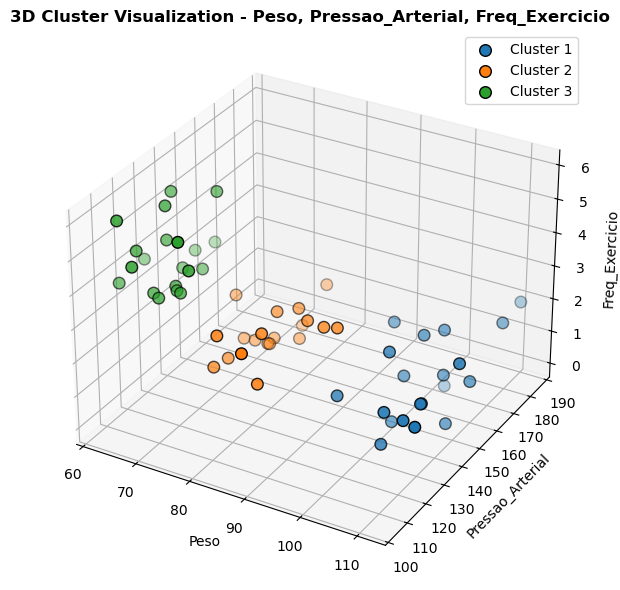

In [58]:
plot_3d_clusters(dados_completo, "Peso", "Pressao_Arterial", "Freq_Exercicio")


Método  Distância  Melhor k  Silhouette    ARI
0    single  euclidean         9       0.687  0.463
1    single  cityblock         9       0.687  0.004
2  complete  euclidean         3       0.687  1.000
3  complete  cityblock         3       0.687  1.000
4   average  euclidean         3       0.687  1.000
5   average  cityblock         3       0.687  1.000
6  centroid  euclidean         3       0.687  0.950
7      ward  euclidean         3       0.687  1.000

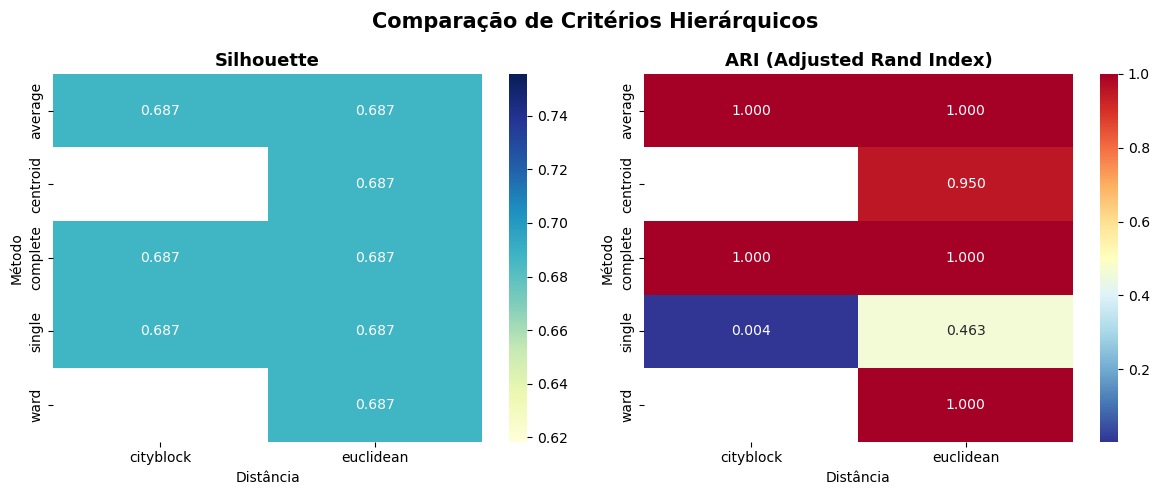


📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):


Silhouette    ARI
Método                     
average        0.687  1.000
centroid       0.687  0.950
complete       0.687  1.000
single         0.687  0.234
ward           0.687  1.000

In [63]:
# ============================================
# TABELA FINAL DE RESULTADOS
# ============================================
dados_completo = pd.DataFrame(resultados_hierarquico)
dados_completo = dados_completo.sort_values(by="Silhouette", ascending=False).reset_index(drop=True)
display(dados_completo)

# ============================================
# HEATMAPS COMPARATIVOS
# ============================================
dados_completo["Método"] = dados_completo["Método"].astype(str)
dados_completo["Distância"] = dados_completo["Distância"].astype(str)

pivot_silhouette = dados_completo.pivot(index="Método", columns="Distância", values="Silhouette")
pivot_ari = dados_completo.pivot(index="Método", columns="Distância", values="ARI")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(pivot_silhouette, annot=True, fmt=".3f", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Silhouette", fontsize=13, fontweight="bold")

sns.heatmap(pivot_ari, annot=True, fmt=".3f", cmap="RdYlBu_r", ax=axes[1])
axes[1].set_title("ARI (Adjusted Rand Index)", fontsize=13, fontweight="bold")

for ax in axes:
    ax.set_xlabel("Distância")
    ax.set_ylabel("Método")

plt.suptitle("Comparação de Critérios Hierárquicos", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

# ============================================
# RESUMO MÉDIO POR MÉTODO (independente da distância)
# ============================================
resumo_metodo = (
    dados_completo.groupby("Método")[["Silhouette", "ARI"]]
    .mean()
    .sort_values(by="Silhouette", ascending=False)
    .round(3)
)
print("\n📊 MÉDIA DAS MÉTRICAS POR MÉTODO (independente da distância):")
display(resumo_metodo)